# SBILIFE


## Daily Returns


### CAPM Model

In [ ]:
install.packages('quantmod')
require (quantmod) #includes necessary packages for analysis

#Getting the data of Nifty 50 and SBI Equity

NSE <- getSymbols.yahoo ("^NSEI", from ="2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE)
NSE

SBILIFE <- getSymbols.yahoo ("SBILIFE.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE)
SBILIFE

head (NSE, 5)
tail (NSE, 5)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: quantmod

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Warning message:
“^NSEI contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-02  11697.35  11725.65 11557.40   11669.15      568400      11669.15
2020-11-03  11734.45  11836.20 11723.30   11813.50      674300      11813.50
2020-11-04  11783.35  11929.65 11756.40   11908.50      667300      11908.50
2020-11-05  12062.40  12131.10 12027.60   12120.30      632500      12120.30
2020-11-06  12156.65  12280.40 12131.85   12263.55      576800      12263.55
2020-11-09  12399.40  12474.05 12367.35   12461.05      553400      12461.05
2020-11-10  12556.40  12643.90 12475.25   12631.10      847500      12631.10
2020-11-11  12680.60  12769.75 12571.10   12749.15      880500      12749.15
2020-11-12  12702.15  12741.15 12624.85   12690.80      622000      12690.80
2020-11-13  12659.70  12735.95 12607.70   12719.95      513900      12719.95
       ...                                                                  
2023-10-11  19767.00  19839.20 19756.95   19811.35      213700      19811.35

           SBILIFE.NS.Open SBILIFE.NS.High SBILIFE.NS.Low SBILIFE.NS.Close
2020-11-02          771.00          778.50         762.20           766.05
2020-11-03          773.55          797.80         769.15           788.90
2020-11-04          796.75          796.75         783.80           791.00
2020-11-05          797.00          806.80         793.00           805.00
2020-11-06          805.45          808.90         795.00           801.25
2020-11-09          808.00          817.85         801.70           808.15
2020-11-10          816.20          832.90         811.35           829.40
2020-11-11          833.00          847.00         831.60           839.55
2020-11-12          840.00          844.40         825.10           837.75
2020-11-13          837.75          838.95         824.10           831.85
       ...                                                                
2023-10-11         1310.00         1310.95        1291.15          1309.35
2023-10-12         1311.9

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-02  11697.35  11725.65 11557.40   11669.15      568400      11669.15
2020-11-03  11734.45  11836.20 11723.30   11813.50      674300      11813.50
2020-11-04  11783.35  11929.65 11756.40   11908.50      667300      11908.50
2020-11-05  12062.40  12131.10 12027.60   12120.30      632500      12120.30
2020-11-06  12156.65  12280.40 12131.85   12263.55      576800      12263.55

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2023-10-18  19820.45  19840.95 19659.95   19671.10      198900      19671.10
2023-10-19  19545.20  19681.80 19512.35   19624.70      230300      19624.70
2023-10-20  19542.15  19593.80 19518.70   19542.65      198300      19542.65
2023-10-23  19521.60  19556.85 19257.85   19281.75      176000      19281.75
2023-10-25  19286.45  19347.30 19074.15   19122.15      225300      19122.15

In [ ]:
close <- cbind(NSE$NSEI.Close, SBILIFE$SBILIFE.NS.Close)
head(close, 5)

Returns <- as.xts(tail(data.frame(close),-1)/head(data.frame(close),-1)-1)
head(Returns, 5)

           NSEI.Close SBILIFE.NS.Close
2020-11-01   12263.55           801.25
2020-11-08   12719.95           840.45
2020-11-15   12859.05           845.45
2020-11-22   12968.95           846.05
2020-11-29   13258.55           863.00

            NSEI.Close SBILIFE.NS.Close
2020-11-08 0.037216010     0.0489235722
2020-11-15 0.010935547     0.0059491938
2020-11-22 0.008546541     0.0007096523
2020-11-29 0.022330228     0.0200342917
2020-12-06 0.019255485    -0.0154113416

In [ ]:
regression <- lm(SBILIFE.NS.Close ~ NSEI.Close, data.frame(Returns[]))
summary(regression)


Call:
lm(formula = SBILIFE.NS.Close ~ NSEI.Close, data = data.frame(Returns[]))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.088538 -0.006904 -0.001282  0.006682  0.075601 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0002473  0.0004785   0.517    0.605    
NSEI.Close  0.7818056  0.0509945  15.331   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01295 on 734 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.2426,	Adjusted R-squared:  0.2415 
F-statistic:   235 on 1 and 734 DF,  p-value: < 2.2e-16


#### Beta for SBILIFE based on daily returns=0.7818

### ARIMA Model


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



           SBILIFE.NS.Open SBILIFE.NS.High SBILIFE.NS.Low SBILIFE.NS.Close
2020-11-02          771.00          778.50         762.20           766.05
2020-11-03          773.55          797.80         769.15           788.90
2020-11-04          796.75          796.75         783.80           791.00
2020-11-05          797.00          806.80         793.00           805.00
2020-11-06          805.45          808.90         795.00           801.25
           SBILIFE.NS.Volume SBILIFE.NS.Adjusted
2020-11-02            891886            760.6773
2020-11-03           1542962            783.3671
2020-11-04            923658            785.4524
2020-11-05           1373458            799.3542
2020-11-06           1722728            795.6305

                Returns
2020-11-03  0.029828388
2020-11-04  0.002661903
2020-11-05  0.017699115
2020-11-06 -0.004658385
2020-11-09  0.008611575
2020-11-10  0.026294623

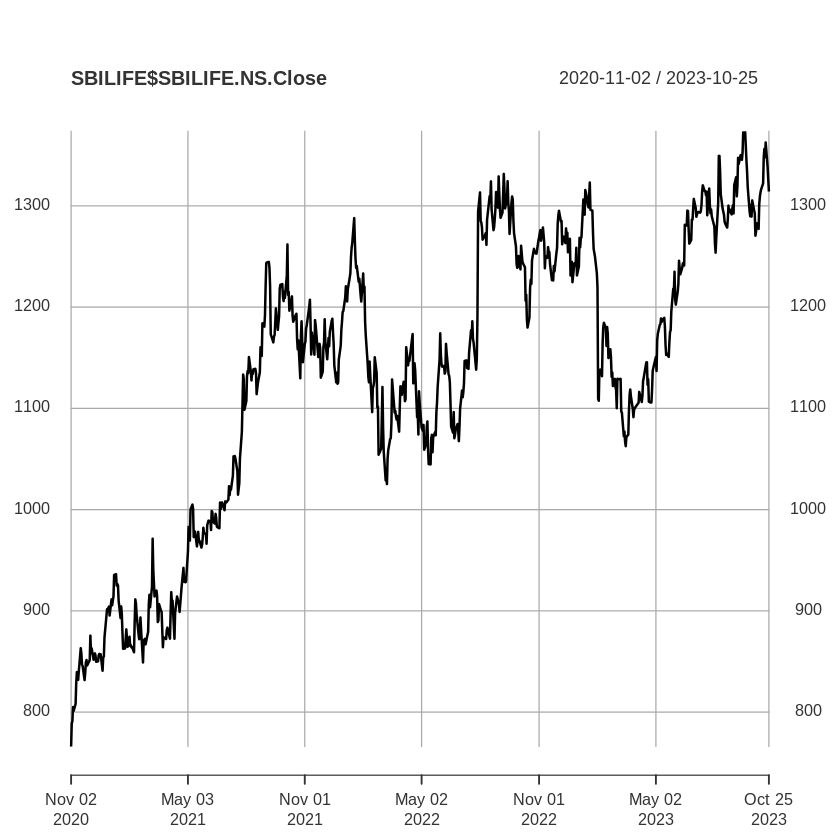

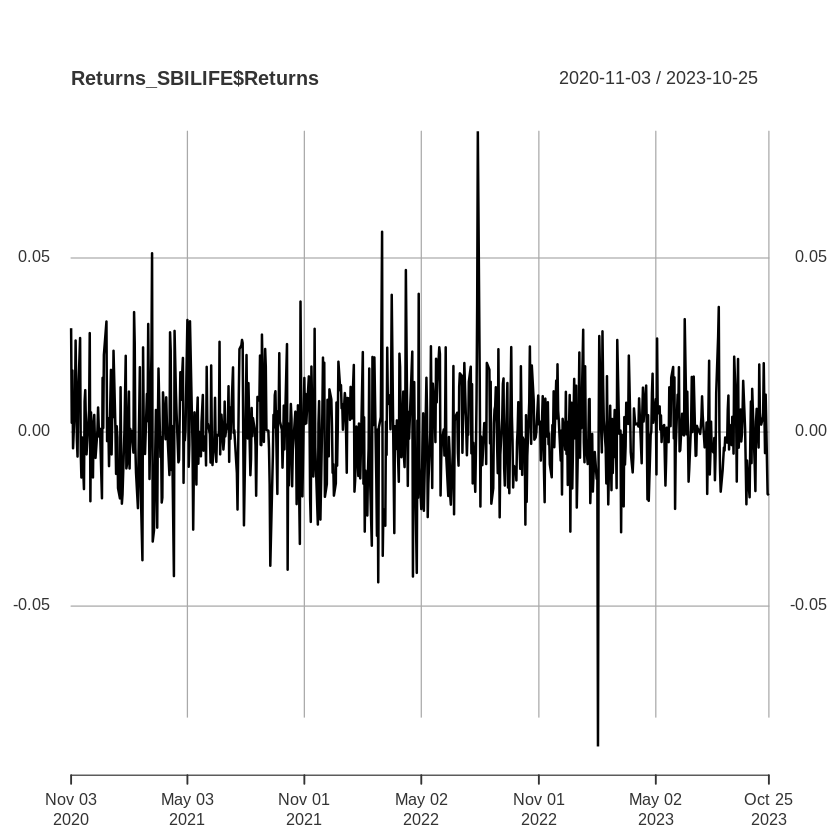

In [ ]:
install.packages("tseries")
install.packages("ggplot2")
library(tseries)
library(ggplot2)

SBILIFE <- getSymbols.yahoo ("SBILIFE.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE)
head(SBILIFE,5)

Returns_SBILIFE <- as.xts(tail(data.frame(SBILIFE$SBILIFE.NS.Close), -1)/head(data.frame(SBILIFE$SBILIFE.NS.Close), -1) -1, frequency = 365)
colnames(Returns_SBILIFE) <- "Returns"
head(Returns_SBILIFE)

plot(SBILIFE$SBILIFE.NS.Close)
plot(Returns_SBILIFE$Returns)


Warning message in adf.test(Returns_SBILIFE$Returns, alternative = "stationary"):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Returns_SBILIFE$Returns
Dickey-Fuller = -8.8375, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


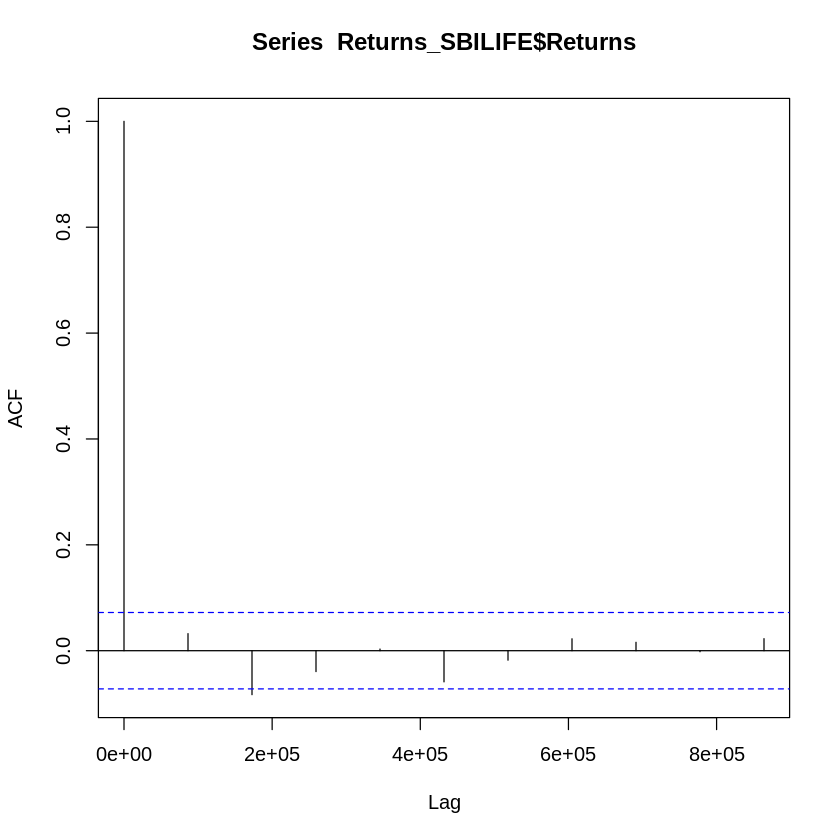

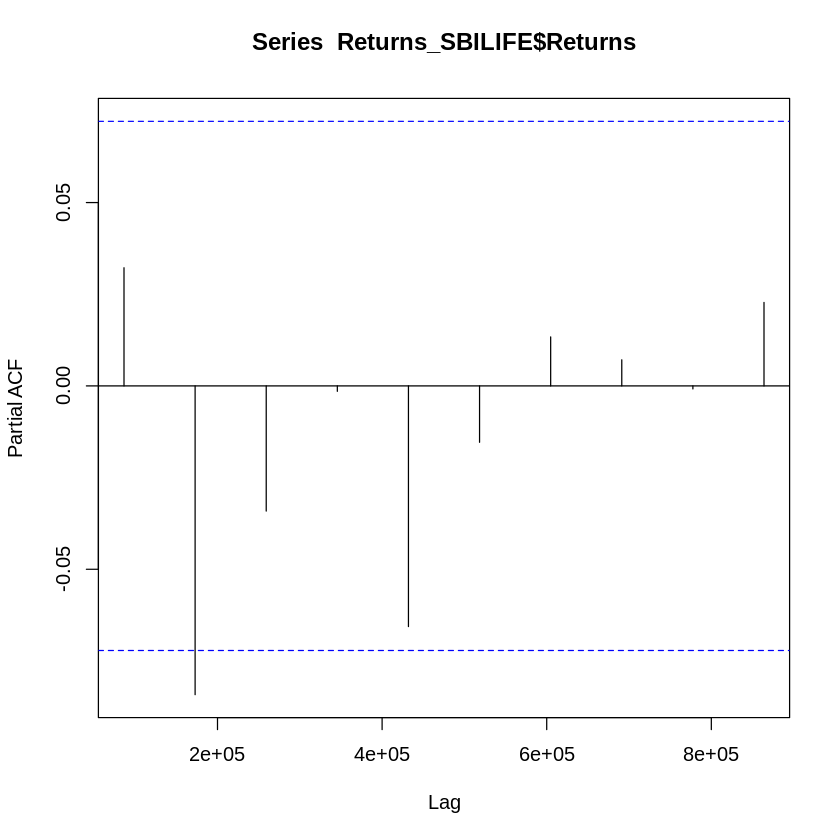

In [ ]:
adf.test(Returns_SBILIFE$Returns, alternative = "stationary")

plot(acf(Returns_SBILIFE$Returns, lag.max = 10))
plot(pacf(Returns_SBILIFE$Returns, lag.max = 10))


Call:
arima(x = Returns_SBILIFE$Returns, order = c(1, 0, 1))

Coefficients:
          ar1     ma1  intercept
      -0.3865  0.4372      8e-04
s.e.   0.3003  0.2924      6e-04

sigma^2 estimated as 0.0002205:  log likelihood = 2059.7,  aic = -4111.39

$pred
Time Series:
Start = 63763201 
End = 64540801 
Frequency = 1.15740740740741e-05 
 [1] 0.0004182411 0.0010106712 0.0007816952 0.0008701951 0.0008359896
 [6] 0.0008492102 0.0008441004 0.0008460753 0.0008453120 0.0008456070

$se
Time Series:
Start = 63763201 
End = 64540801 
Frequency = 1.15740740740741e-05 
 [1] 0.01484850 0.01486754 0.01487038 0.01487081 0.01487087 0.01487088
 [7] 0.01487088 0.01487088 0.01487088 0.01487088

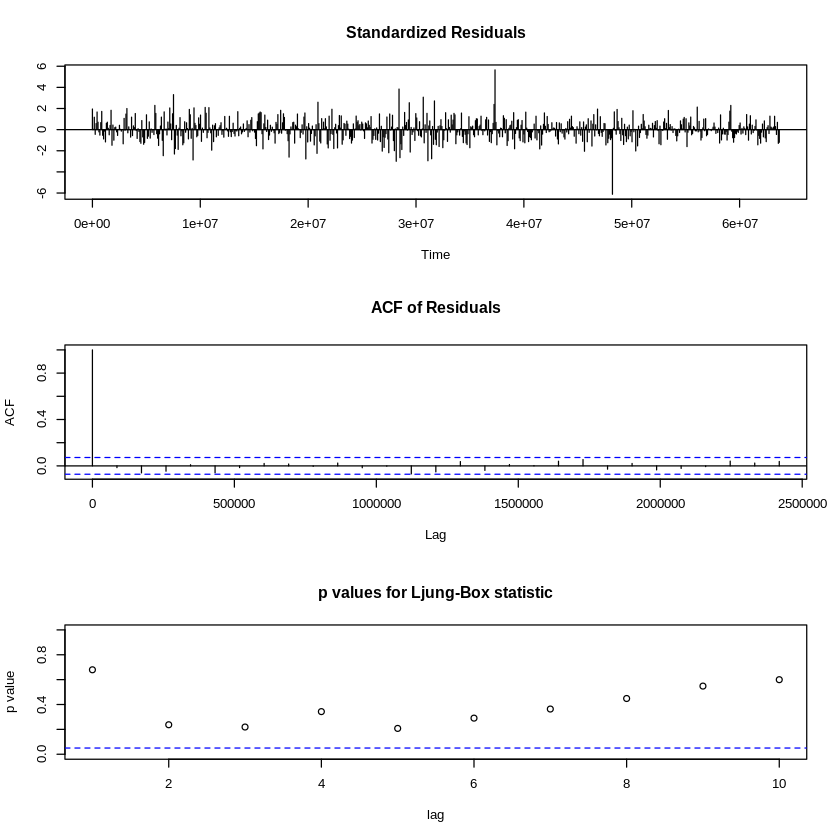

In [ ]:
arima_final <- arima(Returns_SBILIFE$Returns, order = c(1,0,1))
arima_final
predicted <- predict(arima_final, n.ahead = 10)
predicted

tsdiag(arima_final)

### GARCH AND EGARCH Model



In [ ]:
library(quantmod)

SBILIFE <- getSymbols.yahoo("SBILIFE.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE)
head(SBILIFE)

rSBILIFE <- dailyReturn(SBILIFE)
head(rSBILIFE)

           SBILIFE.NS.Open SBILIFE.NS.High SBILIFE.NS.Low SBILIFE.NS.Close
2020-11-02          771.00          778.50         762.20           766.05
2020-11-03          773.55          797.80         769.15           788.90
2020-11-04          796.75          796.75         783.80           791.00
2020-11-05          797.00          806.80         793.00           805.00
2020-11-06          805.45          808.90         795.00           801.25
2020-11-09          808.00          817.85         801.70           808.15
           SBILIFE.NS.Volume SBILIFE.NS.Adjusted
2020-11-02            891886            760.6774
2020-11-03           1542962            783.3671
2020-11-04            923658            785.4524
2020-11-05           1373458            799.3542
2020-11-06           1722728            795.6304
2020-11-09           1255422            802.4821

           daily.returns
2020-11-02  -0.006420249
2020-11-03   0.029828388
2020-11-04   0.002661903
2020-11-05   0.017699115
2020-11-06  -0.004658385
2020-11-09   0.008611575

In [ ]:
install.packages("rmgarch")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘gmp’, ‘ks’, ‘numDeriv’, ‘chron’, ‘SkewHyperbolic’, ‘nloptr’, ‘truncnorm’, ‘Rmpfr’, ‘mvtnorm’, ‘rugarch’, ‘Rsolnp’, ‘Bessel’, ‘ff’, ‘shape’, ‘pcaPP’, ‘spd’, ‘Rcpp’, ‘corpcor’, ‘RcppArmadillo’


Warning message in install.packages("rmgarch"):
“installation of package ‘gmp’ had non-zero exit status”
Warning message in install.packages("rmgarch"):
“installation of package ‘GeneralizedHyperbolic’ had non-zero exit status”
Warning message in install.packages("rmgarch"):
“installation of package ‘Rmpfr’ had non-zero exit status”
Warning message in install.packages("rmgarch"):
“installation of package ‘SkewHyperbolic’ had non-zero exit status”
Warning message in install.packages("rmgarch"):
“installation of package ‘Bessel’ had non-zero exit status”
Warning messag

In [ ]:
install.packages("rugarch")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘GeneralizedHyperbolic’, ‘SkewHyperbolic’




In [ ]:
library(rugarch)

ug_spec = ugarchspec()
ug_spec

eg_spec = ugarchspec(variance.model = list(model="eGARCH"))
eg_spec

ugfit = ugarchfit(spec = ug_spec, data = rSBILIFE)
ugfit

ugforecast = ugarchforecast(ugfit, n.ahead=10)
ugforecast


Loading required package: parallel


Attaching package: ‘rugarch’


The following object is masked from ‘package:stats’:

    sigma





*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: eGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001214    0.000543  2.23447 0.025452
ar1    -0.386801    0.500598 -0.77268 0.439713
ma1     0.433261    0.488082  0.88768 0.374713
omega   0.000022    0.000018  1.17807 0.238770
alpha1  0.086156    0.046623  1.84793 0.064612
beta1   0.818991    0.119050  6.87938 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001214    0.000529  2.29365 0.021810
ar1    -0.386801    0.385383 -1.00368 0.315533
ma1     0.433261    0.378388  1.14502 0.252202
omega   0.000022    0.000048  0.44917 0.653310
alpha1  0.086156    0.118971  0.72418 0.468956
beta1   0.818991    0.319674  2.56196 0.010408

LogLike


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 10
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2023-10-25]:
        Series   Sigma
T+1  0.0008051 0.01430
T+2  0.0013727 0.01438
T+3  0.0011532 0.01445
T+4  0.0012381 0.01452
T+5  0.0012052 0.01458
T+6  0.0012179 0.01463
T+7  0.0012130 0.01468
T+8  0.0012149 0.01472
T+9  0.0012142 0.01476
T+10 0.0012145 0.01479



## Weekly Returns

### CAPM Model

In [ ]:
NSE <- getSymbols.yahoo ("^NSEI", from ="2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "weekly")
NSE

SBILIFE <- getSymbols.yahoo ("SBILIFE.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "weekly")
SBILIFE

head (NSE, 5)
tail (NSE, 5)

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-01  11697.35  12280.40 11557.40   12263.55     3119300      12263.55
2020-11-08  12399.40  12769.75 12367.35   12719.95     3417300      12719.95
2020-11-15  12932.50  12963.00 12730.25   12859.05     2871800      12859.05
2020-11-22  12960.30  13145.85 12790.40   12968.95     3596200      12968.95
2020-11-29  13062.20  13280.05 12962.80   13258.55     2655500      13258.55
2020-12-06  13264.85  13579.35 13241.95   13513.85     2978600      13513.85
2020-12-13  13571.45  13773.25 13447.05   13760.55     2453600      13760.55
2020-12-20  13741.90  13777.50 13131.45   13749.25     2313600      13749.25
2020-12-27  13815.15  14049.85 13811.55   14018.50     2034400      14018.50
2021-01-03  14104.35  14367.30 13953.75   14347.25     2792500      14347.25
       ...                                                                  
2023-08-20  19320.65  19584.45 19229.70   19265.80     1431300      19265.80

           SBILIFE.NS.Open SBILIFE.NS.High SBILIFE.NS.Low SBILIFE.NS.Close
2020-11-01          771.00          808.90         762.20           801.25
2020-11-08          808.00          847.00         801.70           840.45
2020-11-15          831.85          868.70         831.85           845.45
2020-11-22          847.20          864.65         830.00           846.05
2020-11-29          846.05          881.00         840.20           863.00
2020-12-06          863.50          866.00         845.40           849.70
2020-12-13          855.00          865.90         842.05           857.15
2020-12-20          858.00          879.70         825.20           873.90
2020-12-27          882.90          911.00         877.50           895.40
2021-01-03          900.00          954.50         894.50           935.50
       ...                                                                
2023-08-20         1282.95         1313.20        1274.30          1296.40
2023-08-27         1300.0

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-01  11697.35  12280.40 11557.40   12263.55     3119300      12263.55
2020-11-08  12399.40  12769.75 12367.35   12719.95     3417300      12719.95
2020-11-15  12932.50  12963.00 12730.25   12859.05     2871800      12859.05
2020-11-22  12960.30  13145.85 12790.40   12968.95     3596200      12968.95
2020-11-29  13062.20  13280.05 12962.80   13258.55     2655500      13258.55

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2023-09-24  19678.20  19766.65 19492.10   19638.30     1193200      19638.30
2023-10-01  19622.40  19675.75 19333.60   19653.50      892800      19653.50
2023-10-08  19539.45  19843.30 19480.50   19751.05     1068300      19751.05
2023-10-15  19737.25  19849.75 19512.35   19542.65      994300      19542.65
2023-10-22  19521.60  19556.85 18837.85   18857.25      701700      18857.25

In [ ]:
close <- cbind(NSE$NSEI.Close, SBILIFE$SBILIFE.NS.Close)
head(close, 5)

Returns <- as.xts(tail(data.frame(close),-1)/head(data.frame(close),-1)-1)
head(Returns, 5)

           NSEI.Close SBILIFE.NS.Close
2020-11-01   12263.55           801.25
2020-11-08   12719.95           840.45
2020-11-15   12859.05           845.45
2020-11-22   12968.95           846.05
2020-11-29   13258.55           863.00

            NSEI.Close SBILIFE.NS.Close
2020-11-08 0.037216010     0.0489235722
2020-11-15 0.010935547     0.0059491938
2020-11-22 0.008546541     0.0007096523
2020-11-29 0.022330228     0.0200342917
2020-12-06 0.019255485    -0.0154113416

In [ ]:
regression <- lm(SBILIFE.NS.Close ~ NSEI.Close, data.frame(Returns[]))
summary(regression)


Call:
lm(formula = SBILIFE.NS.Close ~ NSEI.Close, data = data.frame(Returns[]))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.101491 -0.015237 -0.000009  0.018085  0.090582 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.001413   0.002087   0.677    0.499    
NSEI.Close  0.728729   0.100576   7.246 1.98e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02571 on 153 degrees of freedom
Multiple R-squared:  0.2555,	Adjusted R-squared:  0.2506 
F-statistic:  52.5 on 1 and 153 DF,  p-value: 1.979e-11


#### Beta of SBILIFE based on weekly returns=0.7287

### ARIMA Model

           SBILIFE.NS.Open SBILIFE.NS.High SBILIFE.NS.Low SBILIFE.NS.Close
2020-11-01          771.00          808.90         762.20           801.25
2020-11-08          808.00          847.00         801.70           840.45
2020-11-15          831.85          868.70         831.85           845.45
2020-11-22          847.20          864.65         830.00           846.05
2020-11-29          846.05          881.00         840.20           863.00
           SBILIFE.NS.Volume SBILIFE.NS.Adjusted
2020-11-01           6454692            795.6304
2020-11-08           6584552            834.5556
2020-11-15           5546606            839.5205
2020-11-22           9052739            840.1163
2020-11-29           8583500            856.9474

                 Returns
2020-11-08  0.0489235722
2020-11-15  0.0059491938
2020-11-22  0.0007096523
2020-11-29  0.0200342917
2020-12-06 -0.0154113416
2020-12-13  0.0087678146

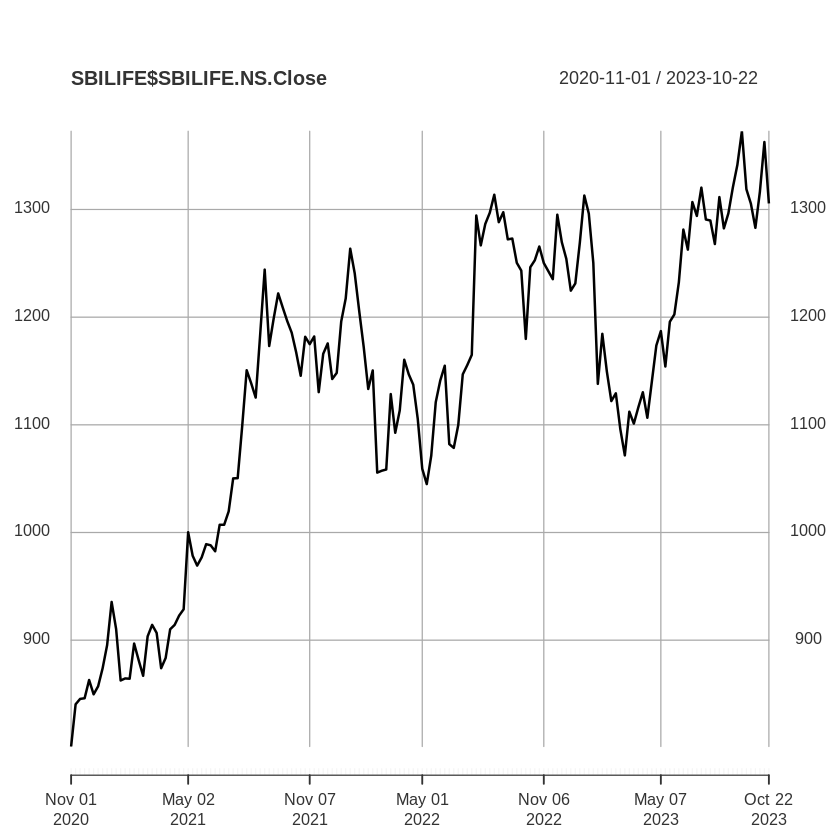

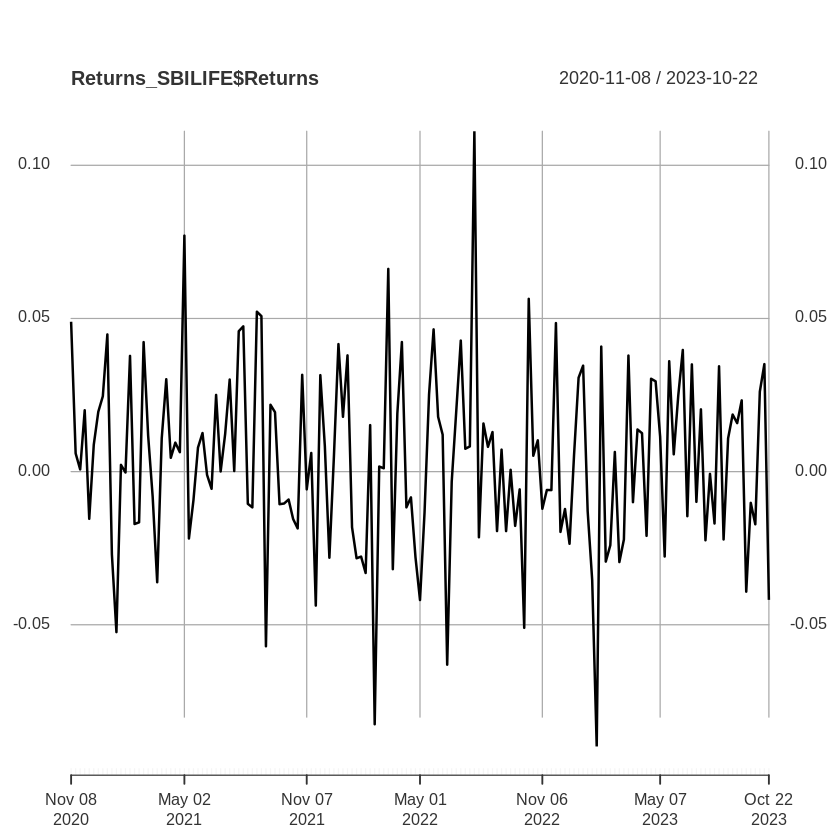

In [ ]:
library(tseries)
library(ggplot2)
SBILIFE <- getSymbols.yahoo ("SBILIFE.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "weekly")
head(SBILIFE,5)

Returns_SBILIFE <- as.xts(tail(data.frame(SBILIFE$SBILIFE.NS.Close), -1)/head(data.frame(SBILIFE$SBILIFE.NS.Close), -1) -1, frequency = 52)
colnames(Returns_SBILIFE) <- "Returns"
head(Returns_SBILIFE)

plot(SBILIFE$SBILIFE.NS.Close)
plot(Returns_SBILIFE$Returns)

Warning message in adf.test(Returns_SBILIFE$Returns, alternative = "stationary"):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Returns_SBILIFE$Returns
Dickey-Fuller = -5.1405, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


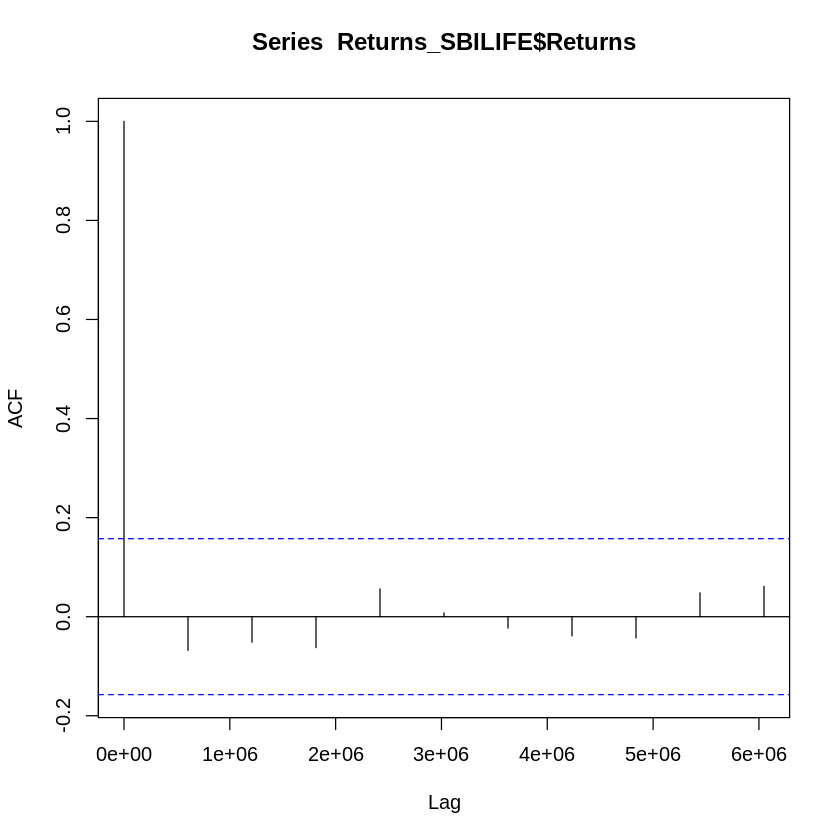

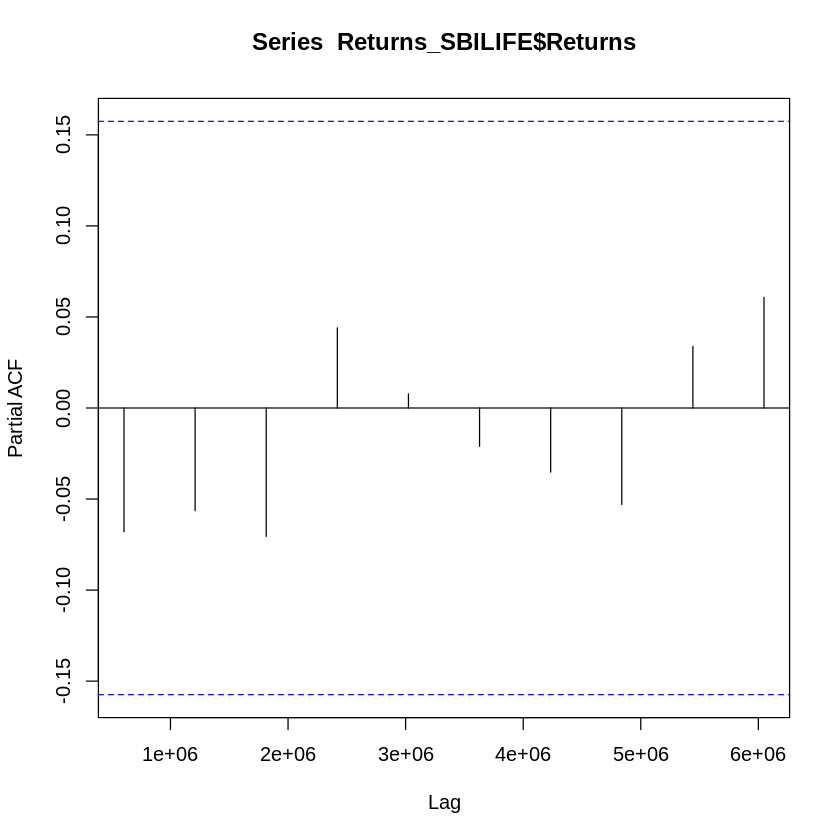

In [ ]:
adf.test(Returns_SBILIFE$Returns, alternative = "stationary")

plot(acf(Returns_SBILIFE$Returns, lag.max = 10))
plot(pacf(Returns_SBILIFE$Returns, lag.max = 10))


Call:
arima(x = Returns_SBILIFE$Returns, order = c(0, 0, 0))

Coefficients:
      intercept
          8e-04
s.e.      5e-04

sigma^2 estimated as 0.0002211:  log likelihood = 2058.59,  aic = -4113.19

$pred
Time Series:
Start = 63763201 
End = 64540801 
Frequency = 1.15740740740741e-05 
 [1] 0.0008420743 0.0008420743 0.0008420743 0.0008420743 0.0008420743
 [6] 0.0008420743 0.0008420743 0.0008420743 0.0008420743 0.0008420743

$se
Time Series:
Start = 63763201 
End = 64540801 
Frequency = 1.15740740740741e-05 
 [1] 0.01487072 0.01487072 0.01487072 0.01487072 0.01487072 0.01487072
 [7] 0.01487072 0.01487072 0.01487072 0.01487072

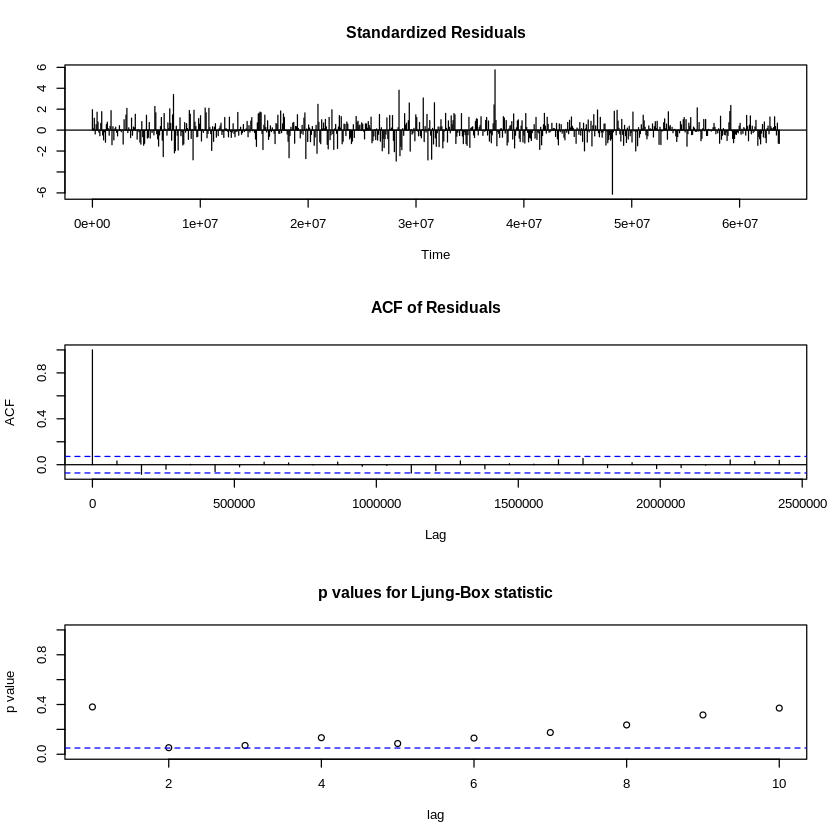

In [ ]:
arima_final <- arima(Returns_SBILIFE$Returns, order = c(0,0,0))
arima_final

predicted <- predict(arima_final, n.ahead = 10)
predicted

tsdiag(arima_final)

### GARCH and EGARCH Model


In [ ]:
library(quantmod)

SBILIFE <- getSymbols.yahoo("SBILIFE.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity="weekly")
head(SBILIFE)

rSBILIFE <- dailyReturn(SBILIFE)
head(rSBILIFE)

           SBILIFE.NS.Open SBILIFE.NS.High SBILIFE.NS.Low SBILIFE.NS.Close
2020-11-01          771.00          808.90         762.20           801.25
2020-11-08          808.00          847.00         801.70           840.45
2020-11-15          831.85          868.70         831.85           845.45
2020-11-22          847.20          864.65         830.00           846.05
2020-11-29          846.05          881.00         840.20           863.00
2020-12-06          863.50          866.00         845.40           849.70
           SBILIFE.NS.Volume SBILIFE.NS.Adjusted
2020-11-01           6454692            795.6304
2020-11-08           6584552            834.5556
2020-11-15           5546606            839.5205
2020-11-22           9052739            840.1163
2020-11-29           8583500            856.9474
2020-12-06          10680968            843.7407

           daily.returns
2020-11-01  0.0392347601
2020-11-08  0.0489235722
2020-11-15  0.0059491938
2020-11-22  0.0007096523
2020-11-29  0.0200342917
2020-12-06 -0.0154113416

In [ ]:
library(rugarch)

ug_spec = ugarchspec()
ug_spec

eg_spec = ugarchspec(variance.model = list(model="eGARCH"))
eg_spec

ugfit = ugarchfit(spec = ug_spec, data = rSBILIFE)
ugfit

ugforecast = ugarchforecast(ugfit, n.ahead=10)
ugforecast


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: eGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.003791    0.001979   1.91543 0.055437
ar1     0.596704    0.687948   0.86737 0.385740
ma1    -0.664905    0.641617  -1.03630 0.300064
omega   0.000001    0.000003   0.28766 0.773606
alpha1  0.000000    0.001617   0.00000 1.000000
beta1   0.998998    0.001596 625.77900 0.000000

Robust Standard Errors:
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.003791    0.001968    1.92647 0.054046
ar1     0.596704    0.680879    0.87637 0.380827
ma1    -0.664905    0.643109   -1.03389 0.301186
omega   0.000001    0.000008    0.11976 0.904673
alpha1  0.000000    0.000342    0.00000 1.000000
beta1   0.998998    0.000248 4034.29


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 10
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2023-10-22]:
       Series   Sigma
T+1  0.005608 0.02971
T+2  0.004875 0.02971
T+3  0.004438 0.02971
T+4  0.004177 0.02971
T+5  0.004021 0.02972
T+6  0.003928 0.02972
T+7  0.003873 0.02972
T+8  0.003840 0.02972
T+9  0.003820 0.02972
T+10 0.003808 0.02972



## Monthly Returns

### CAPM Model


In [ ]:
NSE <- getSymbols.yahoo ("^NSEI", from ="2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "monthly")
NSE

SBILIFE <- getSymbols.yahoo ("SBILIFE.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "monthly")
SBILIFE

head (NSE, 5)
tail (NSE, 5)

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-30  13062.20  14024.85 12962.80   13981.75    12077600      13981.75
2020-12-31  13996.10  14753.55 13596.75   13634.60    13119900      13634.60
2021-01-31  13758.60  15431.75 13661.75   14529.15    14313900      14529.15
2021-02-28  14702.50  15336.30 14264.40   14690.70     9886800      14690.70
2021-03-31  14798.40  15044.35 14151.40   14631.10     9344700      14631.10
2021-04-30  14481.05  15606.35 14416.25   15582.80     9859900      15582.80
2021-05-31  15629.65  15915.65 15450.90   15721.50     8079100      15721.50
2021-06-30  15755.05  15962.25 15513.45   15763.05     5756800      15763.05
2021-07-31  15874.90  17153.50 15834.65   17132.20     6349900      17132.20
2021-08-31  17185.60  17947.65 17055.05   17618.15     6955600      17618.15
2021-09-30  17531.90  18604.45 17452.90   17671.65     7651200      17671.65
2021-10-31  17783.15  18210.15 16782.40   16983.20     5853100      16983.20

           SBILIFE.NS.Open SBILIFE.NS.High SBILIFE.NS.Low SBILIFE.NS.Close
2020-11-30          849.90          911.00         825.20           904.25
2020-12-31          903.00          954.50         838.00           864.45
2021-01-31          875.00          921.90         845.10           866.90
2021-02-28          860.00          983.75         852.20           880.85
2021-03-31          881.60          946.90         864.80           928.70
2021-04-30          921.95         1044.70         916.05           975.65
2021-05-31          978.40         1019.70         956.75          1008.15
2021-06-30         1009.00         1148.00         996.05          1098.60
2021-07-31         1111.05         1199.00        1094.80          1192.05
2021-08-31         1189.00         1253.65        1153.35          1215.10
2021-09-30         1204.00         1273.90        1126.30          1145.55
2021-10-31         1148.00         1212.00        1103.75          1160.55
2021-11-30         1160.8

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-30   13062.2  14024.85 12962.80   13981.75    12077600      13981.75
2020-12-31   13996.1  14753.55 13596.75   13634.60    13119900      13634.60
2021-01-31   13758.6  15431.75 13661.75   14529.15    14313900      14529.15
2021-02-28   14702.5  15336.30 14264.40   14690.70     9886800      14690.70
2021-03-31   14798.4  15044.35 14151.40   14631.10     9344700      14631.10

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2023-05-31  18579.40  19201.70 18464.55   19189.05     5144400      19189.05
2023-06-30  19246.50  19991.85 19234.40   19753.80     5802500      19753.80
2023-07-31  19784.00  19795.60 19223.65   19253.80     6027500      19253.80
2023-08-31  19258.15  20222.45 19255.70   19638.30     5666500      19638.30
2023-09-30  19622.40  19849.75 18837.85   19079.60     4248400      19079.60

In [ ]:
close <- cbind(NSE$NSEI.Close, SBILIFE$SBILIFE.NS.Close)
head(close, 5)

Returns <- as.xts(tail(data.frame(close),-1)/head(data.frame(close),-1)-1)
head(Returns, 5)

           NSEI.Close SBILIFE.NS.Close
2020-11-30   13981.75           904.25
2020-12-31   13634.60           864.45
2021-01-31   14529.15           866.90
2021-02-28   14690.70           880.85
2021-03-31   14631.10           928.70

             NSEI.Close SBILIFE.NS.Close
2020-12-31 -0.024828823     -0.044014363
2021-01-31  0.065608878      0.002834186
2021-02-28  0.011119012      0.016091765
2021-03-31 -0.004057028      0.054322572
2021-04-30  0.065046389      0.050554551

In [ ]:
regression <- lm(SBILIFE.NS.Close ~ NSEI.Close, data.frame(Returns[]))
summary(regression)


Call:
lm(formula = SBILIFE.NS.Close ~ NSEI.Close, data = data.frame(Returns[]))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.113382 -0.026017 -0.007247  0.025833  0.105863 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.004255   0.008725   0.488 0.629091    
NSEI.Close  0.992019   0.228922   4.333 0.000136 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04915 on 32 degrees of freedom
Multiple R-squared:  0.3698,	Adjusted R-squared:  0.3501 
F-statistic: 18.78 on 1 and 32 DF,  p-value: 0.0001361


#### Beta for SBILIFE based on monthly returns=0.992

### ARIMA Model

           SBILIFE.NS.Open SBILIFE.NS.High SBILIFE.NS.Low SBILIFE.NS.Close
2020-11-30           849.9          911.00          825.2           904.25
2020-12-31           903.0          954.50          838.0           864.45
2021-01-31           875.0          921.90          845.1           866.90
2021-02-28           860.0          983.75          852.2           880.85
2021-03-31           881.6          946.90          864.8           928.70
           SBILIFE.NS.Volume SBILIFE.NS.Adjusted
2020-11-30          45048348            897.9081
2020-12-31          35228937            858.3872
2021-01-31          42852555            860.8201
2021-02-28          82164621            874.6722
2021-03-31          35122993            922.1866

                Returns
2020-12-31 -0.044014363
2021-01-31  0.002834186
2021-02-28  0.016091765
2021-03-31  0.054322572
2021-04-30  0.050554551
2021-05-31  0.033311125

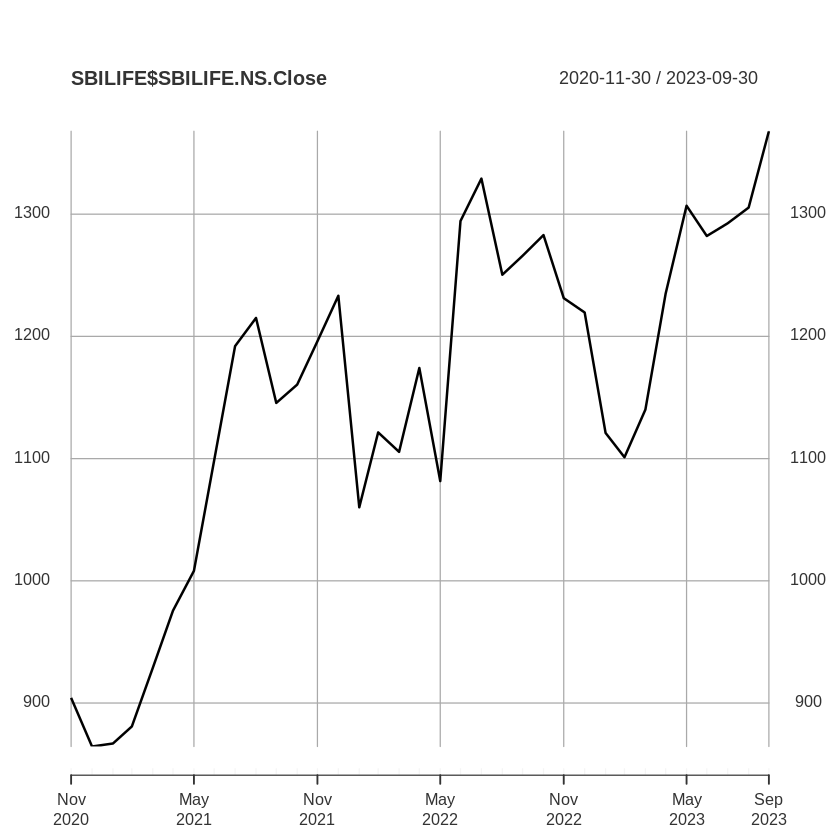

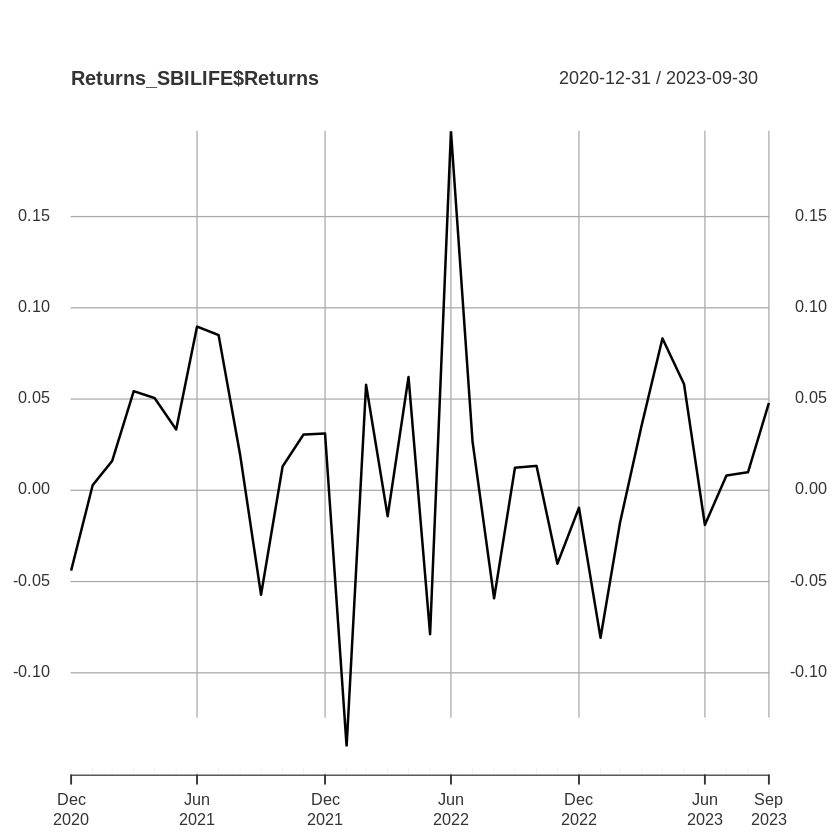

In [ ]:
library(tseries)
library(ggplot2)
SBILIFE <- getSymbols.yahoo ("SBILIFE.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "monthly")
head(SBILIFE,5)

Returns_SBILIFE <- as.xts(tail(data.frame(SBILIFE$SBILIFE.NS.Close), -1)/head(data.frame(SBILIFE$SBILIFE.NS.Close), -1) -1, frequency = 12)
colnames(Returns_SBILIFE) <- "Returns"
head(Returns_SBILIFE)

plot(SBILIFE$SBILIFE.NS.Close)
plot(Returns_SBILIFE$Returns)


	Augmented Dickey-Fuller Test

data:  Returns_SBILIFE$Returns
Dickey-Fuller = -2.3708, Lag order = 3, p-value = 0.4293
alternative hypothesis: stationary


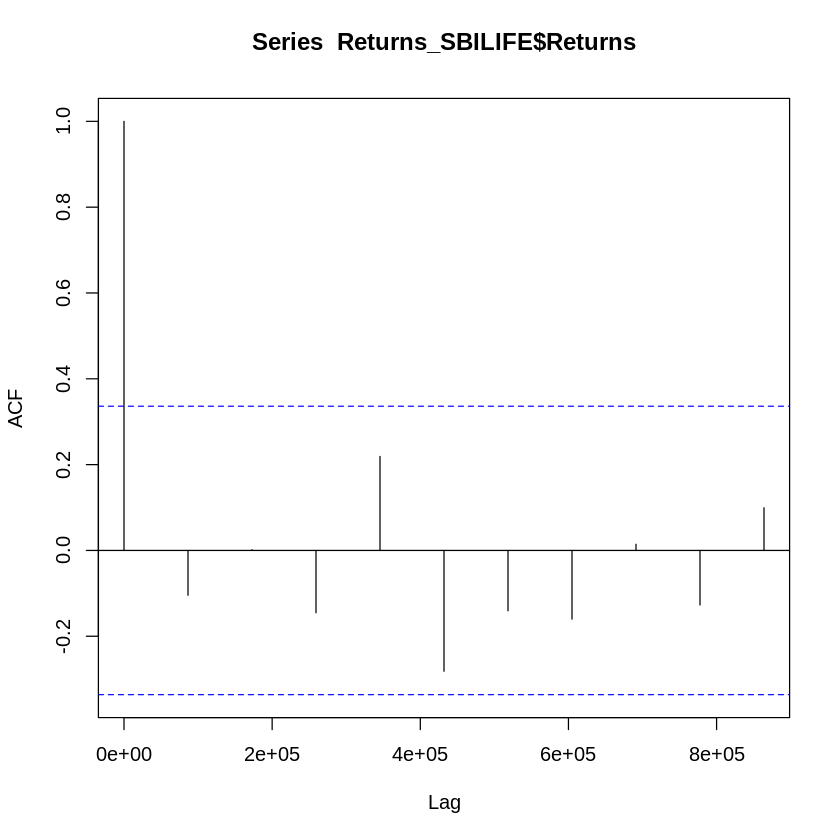

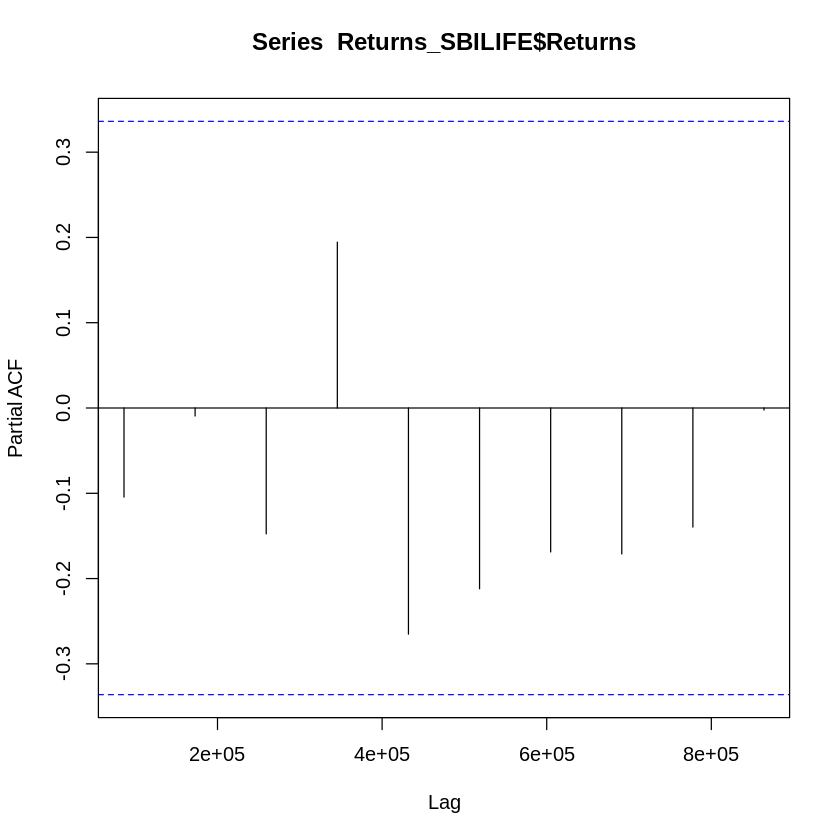

In [ ]:
adf.test(Returns_SBILIFE$Returns, alternative = "stationary")

plot(acf(Returns_SBILIFE$Returns, lag.max = 10))
plot(pacf(Returns_SBILIFE$Returns, lag.max = 10))


Call:
arima(x = Returns_SBILIFE$Returns, order = c(0, 0, 0))

Coefficients:
      intercept
          8e-04
s.e.      5e-04

sigma^2 estimated as 0.0002211:  log likelihood = 2058.59,  aic = -4113.19

$pred
Time Series:
Start = 63763201 
End = 64540801 
Frequency = 1.15740740740741e-05 
 [1] 0.0008420743 0.0008420743 0.0008420743 0.0008420743 0.0008420743
 [6] 0.0008420743 0.0008420743 0.0008420743 0.0008420743 0.0008420743

$se
Time Series:
Start = 63763201 
End = 64540801 
Frequency = 1.15740740740741e-05 
 [1] 0.01487072 0.01487072 0.01487072 0.01487072 0.01487072 0.01487072
 [7] 0.01487072 0.01487072 0.01487072 0.01487072

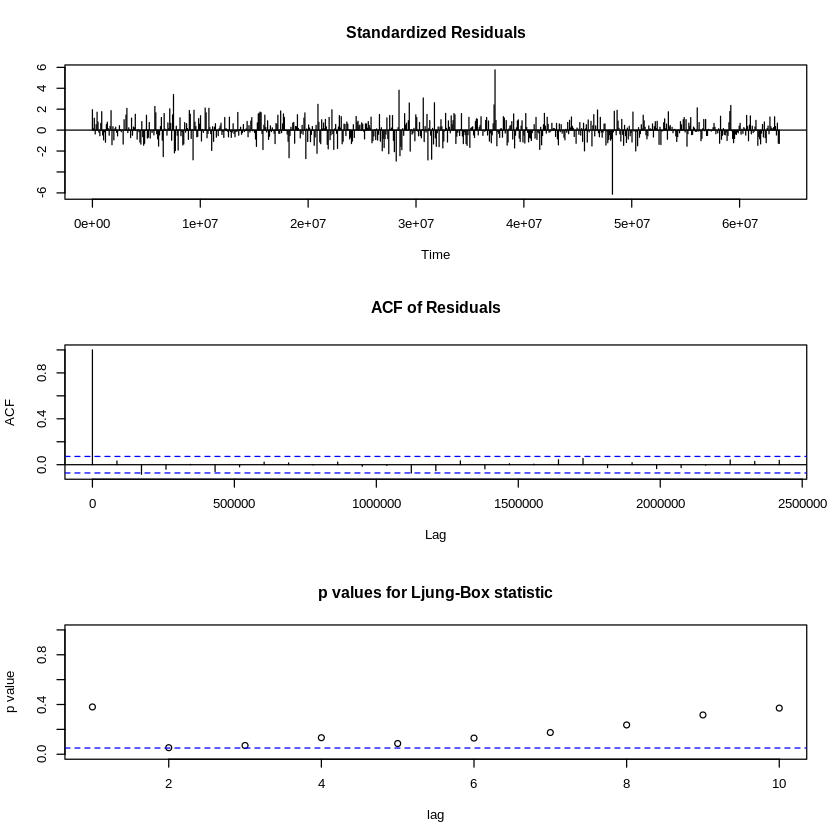

In [ ]:
arima_final <- arima(Returns_SBILIFE$Returns, order = c(0,0,0))
arima_final

predicted <- predict(arima_final, n.ahead = 10)
predicted

tsdiag(arima_final)

### GARCH and EGARCH Model


In [ ]:
library(quantmod)

SBILIFE <- getSymbols.yahoo("SBILIFE.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity="monthly")
head(SBILIFE)

rSBILIFE <- dailyReturn(SBILIFE)
head(rSBILIFE)

           SBILIFE.NS.Open SBILIFE.NS.High SBILIFE.NS.Low SBILIFE.NS.Close
2020-11-30          849.90          911.00         825.20           904.25
2020-12-31          903.00          954.50         838.00           864.45
2021-01-31          875.00          921.90         845.10           866.90
2021-02-28          860.00          983.75         852.20           880.85
2021-03-31          881.60          946.90         864.80           928.70
2021-04-30          921.95         1044.70         916.05           975.65
           SBILIFE.NS.Volume SBILIFE.NS.Adjusted
2020-11-30          45048348            897.9081
2020-12-31          35228937            858.3873
2021-01-31          42852555            860.8201
2021-02-28          82164621            874.6722
2021-03-31          35122993            922.1866
2021-04-30          59223905            971.5566

           daily.returns
2020-11-30   0.063948669
2020-12-31  -0.044014363
2021-01-31   0.002834186
2021-02-28   0.016091765
2021-03-31   0.054322572
2021-04-30   0.050554551

In [ ]:
library(rugarch)

ug_spec = ugarchspec()
ug_spec

eg_spec = ugarchspec(variance.model = list(model="eGARCH"))
eg_spec

ugfit = ugarchfit(spec = ug_spec, data = rSBILIFE)
ugfit

ugforecast = ugarchforecast(ugfit, n.ahead=10)
ugforecast


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: eGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 


Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
“
ugarchfit-->waring: using less than 100 data
 points for estimation
”



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.015413    0.009356   1.6474 0.099468
ar1    -0.875567    0.172267  -5.0826 0.000000
ma1     0.773608    0.210283   3.6789 0.000234
omega   0.000467    0.000107   4.3659 0.000013
alpha1  0.000000    0.038599   0.0000 1.000000
beta1   0.873183    0.189404   4.6102 0.000004

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.015413    0.008199  1.87980 0.060135
ar1    -0.875567    0.088774 -9.86290 0.000000
ma1     0.773608    0.068578 11.28074 0.000000
omega   0.000467    0.000669  0.69904 0.484527
alpha1  0.000000    0.012148  0.00000 1.000000
beta1   0.873183    0.197791  4.41467 0.000010

LogLike


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 10
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2023-09-30]:
      Series   Sigma
T+1  0.01178 0.06070
T+2  0.01860 0.06070
T+3  0.01263 0.06070
T+4  0.01785 0.06070
T+5  0.01328 0.06070
T+6  0.01728 0.06071
T+7  0.01377 0.06071
T+8  0.01685 0.06071
T+9  0.01416 0.06071
T+10 0.01651 0.06071



# SMLISUZU

## Daily Returns

### CAPM Model

In [ ]:
NSE <- getSymbols.yahoo ("^NSEI", from ="2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE)
NSE

SMLISUZU <- getSymbols.yahoo ("SMLISUZU.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE)
SMLISUZU

head (NSE, 5)
tail (NSE, 5)

Warning message:
“^NSEI contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-02  11697.35  11725.65 11557.40   11669.15      568400      11669.15
2020-11-03  11734.45  11836.20 11723.30   11813.50      674300      11813.50
2020-11-04  11783.35  11929.65 11756.40   11908.50      667300      11908.50
2020-11-05  12062.40  12131.10 12027.60   12120.30      632500      12120.30
2020-11-06  12156.65  12280.40 12131.85   12263.55      576800      12263.55
2020-11-09  12399.40  12474.05 12367.35   12461.05      553400      12461.05
2020-11-10  12556.40  12643.90 12475.25   12631.10      847500      12631.10
2020-11-11  12680.60  12769.75 12571.10   12749.15      880500      12749.15
2020-11-12  12702.15  12741.15 12624.85   12690.80      622000      12690.80
2020-11-13  12659.70  12735.95 12607.70   12719.95      513900      12719.95
       ...                                                                  
2023-10-11  19767.00  19839.20 19756.95   19811.35      213700      19811.35

           SMLISUZU.NS.Open SMLISUZU.NS.High SMLISUZU.NS.Low SMLISUZU.NS.Close
2020-11-02           372.50           384.80          365.00            369.65
2020-11-03           370.65           385.80          370.65            383.20
2020-11-04           385.30           392.95          385.00            389.30
2020-11-05           389.75           444.00          389.75            429.80
2020-11-06           430.00           435.65          392.00            412.70
2020-11-09           405.35           412.35          401.30            404.10
2020-11-10           409.00           421.00          400.10            416.80
2020-11-11           421.00           421.55          406.00            416.95
2020-11-12           422.00           422.00          415.20            419.30
2020-11-13           419.30           419.30          414.95            416.35
       ...                                                                    
2023-10-11          1224.00          1250.00        

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-02  11697.35  11725.65 11557.40   11669.15      568400      11669.15
2020-11-03  11734.45  11836.20 11723.30   11813.50      674300      11813.50
2020-11-04  11783.35  11929.65 11756.40   11908.50      667300      11908.50
2020-11-05  12062.40  12131.10 12027.60   12120.30      632500      12120.30
2020-11-06  12156.65  12280.40 12131.85   12263.55      576800      12263.55

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2023-10-18  19820.45  19840.95 19659.95   19671.10      198900      19671.10
2023-10-19  19545.20  19681.80 19512.35   19624.70      230300      19624.70
2023-10-20  19542.15  19593.80 19518.70   19542.65      198300      19542.65
2023-10-23  19521.60  19556.85 19257.85   19281.75      176000      19281.75
2023-10-25  19286.45  19347.30 19074.15   19122.15      225300      19122.15

In [ ]:
close <- cbind(NSE$NSEI.Close, SMLISUZU$SMLISUZU.NS.Close)
head(close, 5)

Returns <- as.xts(tail(data.frame(close),-1)/head(data.frame(close),-1)-1)
head(Returns, 5)

           NSEI.Close SMLISUZU.NS.Close
2020-11-02   11669.15            369.65
2020-11-03   11813.50            383.20
2020-11-04   11908.50            389.30
2020-11-05   12120.30            429.80
2020-11-06   12263.55            412.70

            NSEI.Close SMLISUZU.NS.Close
2020-11-03 0.012370190        0.03665635
2020-11-04 0.008041647        0.01591852
2020-11-05 0.017785599        0.10403288
2020-11-06 0.011819015       -0.03978589
2020-11-09 0.016104636       -0.02083840

In [ ]:
regression <- lm(SMLISUZU.NS.Close ~ NSEI.Close, data.frame(Returns[]))
summary(regression)


Call:
lm(formula = SMLISUZU.NS.Close ~ NSEI.Close, data = data.frame(Returns[]))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.073788 -0.015221 -0.003814  0.008758  0.196145 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.001319   0.001085   1.215    0.225    
NSEI.Close  1.149382   0.115614   9.942   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02935 on 734 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1187,	Adjusted R-squared:  0.1175 
F-statistic: 98.83 on 1 and 734 DF,  p-value: < 2.2e-16


#### Beta for SMLISUZU based on daily returns=1.149

### ARIMA Model

           SMLISUZU.NS.Open SMLISUZU.NS.High SMLISUZU.NS.Low SMLISUZU.NS.Close
2020-11-02           372.50           384.80          365.00            369.65
2020-11-03           370.65           385.80          370.65            383.20
2020-11-04           385.30           392.95          385.00            389.30
2020-11-05           389.75           444.00          389.75            429.80
2020-11-06           430.00           435.65          392.00            412.70
           SMLISUZU.NS.Volume SMLISUZU.NS.Adjusted
2020-11-02              26328               369.65
2020-11-03              17188               383.20
2020-11-04              20815               389.30
2020-11-05             815716               429.80
2020-11-06              96991               412.70

               Returns
2020-11-03  0.03665635
2020-11-04  0.01591852
2020-11-05  0.10403288
2020-11-06 -0.03978589
2020-11-09 -0.02083840
2020-11-10  0.03142782

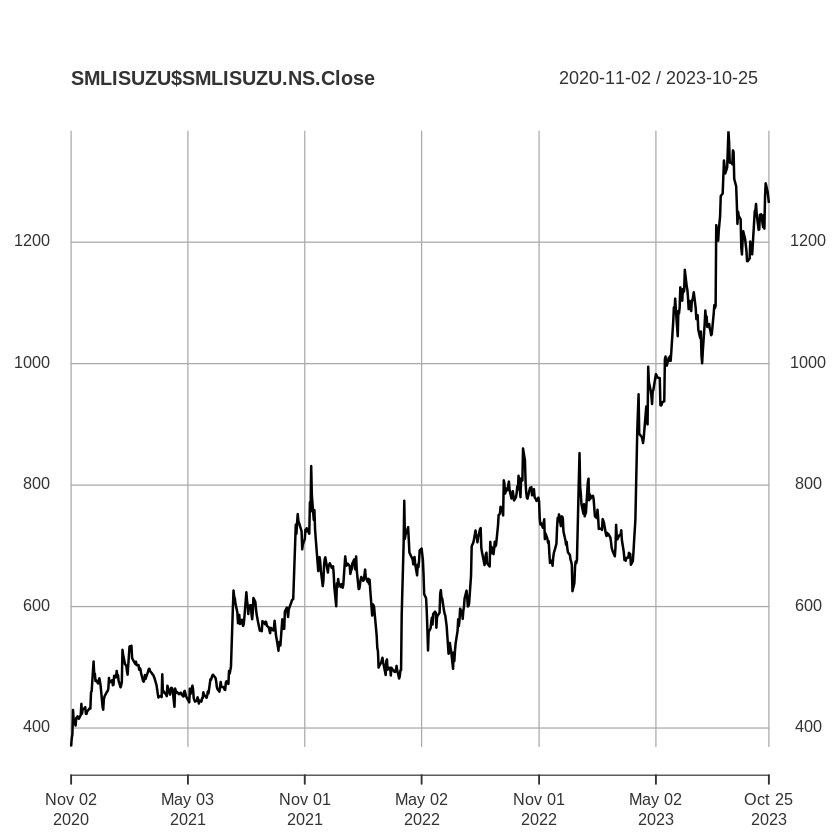

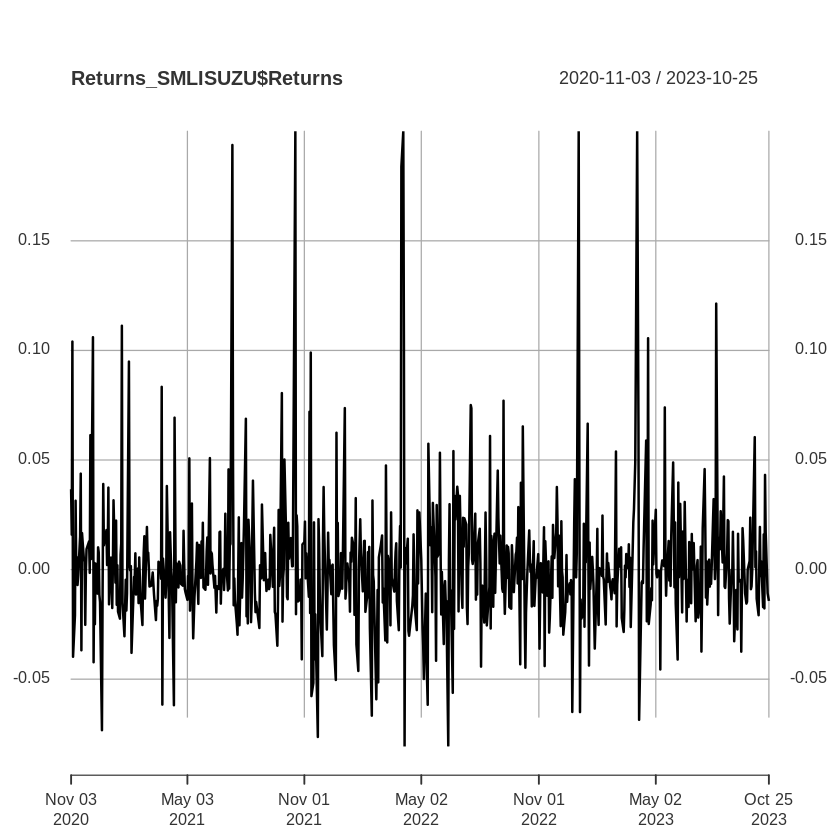

In [ ]:
library(tseries)
library(ggplot2)

SMLISUZU <- getSymbols.yahoo ("SMLISUZU.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE)
head(SMLISUZU,5)

Returns_SMLISUZU <- as.xts(tail(data.frame(SMLISUZU$SMLISUZU.NS.Close), -1)/head(data.frame(SMLISUZU$SMLISUZU.NS.Close), -1) -1, frequency = 365)
colnames(Returns_SMLISUZU) <- "Returns"
head(Returns_SMLISUZU)

plot(SMLISUZU$SMLISUZU.NS.Close)
plot(Returns_SMLISUZU$Returns)

Warning message in adf.test(Returns_SMLISUZU$Returns, alternative = "stationary"):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Returns_SMLISUZU$Returns
Dickey-Fuller = -8.467, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


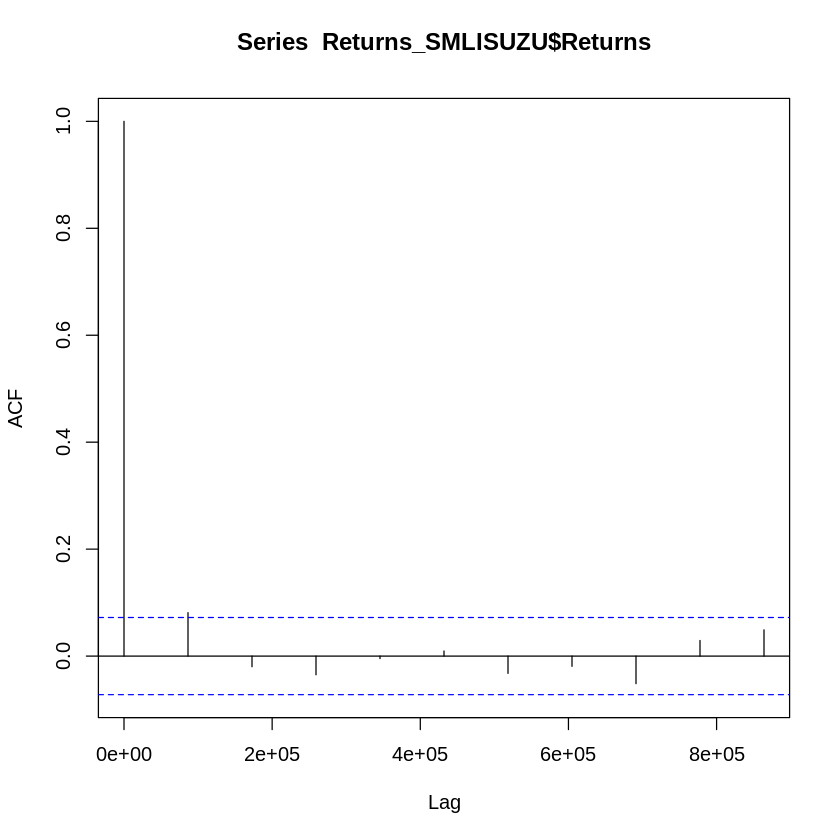

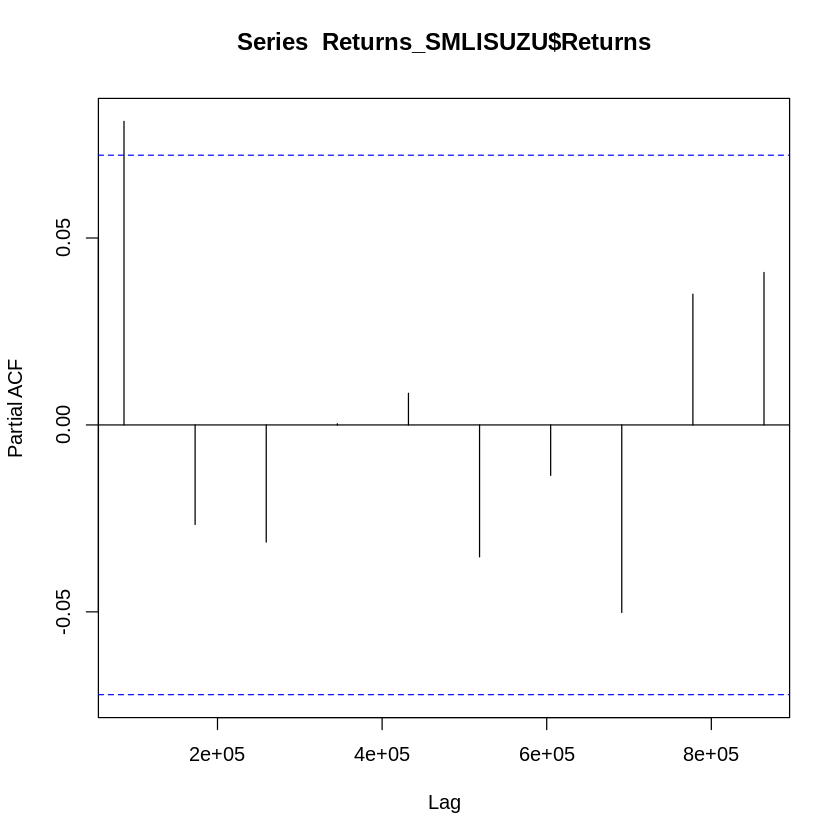

In [ ]:
adf.test(Returns_SMLISUZU$Returns, alternative = "stationary")

plot(acf(Returns_SMLISUZU$Returns, lag.max = 10))
plot(pacf(Returns_SMLISUZU$Returns, lag.max = 10))


Call:
arima(x = Returns_SMLISUZU$Returns, order = c(0, 0, 1))

Coefficients:
         ma1  intercept
      0.0845     0.0021
s.e.  0.0371     0.0012

sigma^2 estimated as 0.0009658:  log likelihood = 1514.62,  aic = -3023.23

$pred
Time Series:
Start = 63763201 
End = 64540801 
Frequency = 1.15740740740741e-05 
 [1] 0.0008440693 0.0021334399 0.0021334399 0.0021334399 0.0021334399
 [6] 0.0021334399 0.0021334399 0.0021334399 0.0021334399 0.0021334399

$se
Time Series:
Start = 63763201 
End = 64540801 
Frequency = 1.15740740740741e-05 
 [1] 0.03107761 0.03118825 0.03118825 0.03118825 0.03118825 0.03118825
 [7] 0.03118825 0.03118825 0.03118825 0.03118825

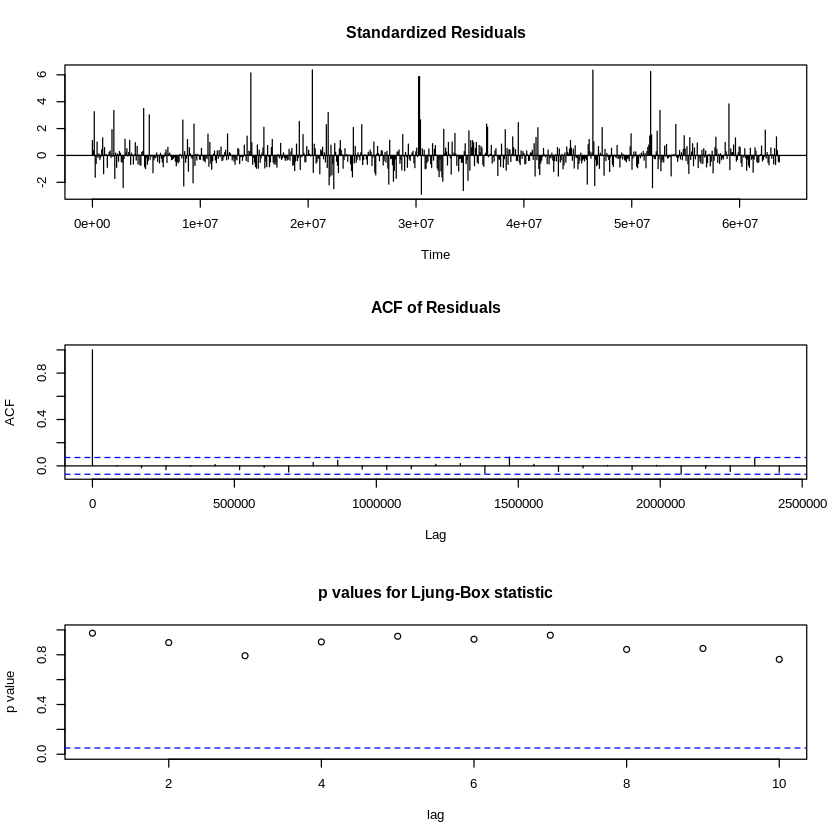

In [ ]:
arima_final <- arima(Returns_SMLISUZU$Returns, order = c(0,0,1))
arima_final
predicted <- predict(arima_final, n.ahead = 10)
predicted

tsdiag(arima_final)

### GARCH and EGARCH Model

In [ ]:
library(quantmod)

SMLISUZU <- getSymbols.yahoo("SMLISUZU.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE)
head(SMLISUZU)

rSMLISUZU <- dailyReturn(SMLISUZU)
head(rSMLISUZU)

           SMLISUZU.NS.Open SMLISUZU.NS.High SMLISUZU.NS.Low SMLISUZU.NS.Close
2020-11-02           372.50           384.80          365.00            369.65
2020-11-03           370.65           385.80          370.65            383.20
2020-11-04           385.30           392.95          385.00            389.30
2020-11-05           389.75           444.00          389.75            429.80
2020-11-06           430.00           435.65          392.00            412.70
2020-11-09           405.35           412.35          401.30            404.10
           SMLISUZU.NS.Volume SMLISUZU.NS.Adjusted
2020-11-02              26328               369.65
2020-11-03              17188               383.20
2020-11-04              20815               389.30
2020-11-05             815716               429.80
2020-11-06              96991               412.70
2020-11-09              33145               404.10

           daily.returns
2020-11-02  -0.007651023
2020-11-03   0.036656347
2020-11-04   0.015918516
2020-11-05   0.104032883
2020-11-06  -0.039785891
2020-11-09  -0.020838396

In [ ]:
library(rugarch)

ug_spec = ugarchspec()
ug_spec

eg_spec = ugarchspec(variance.model = list(model="eGARCH"))
eg_spec

ugfit = ugarchfit(spec = ug_spec, data = rSMLISUZU)
ugfit

ugforecast = ugarchforecast(ugfit, n.ahead=10)
ugforecast


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: eGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error     t value Pr(>|t|)
mu      0.002117    0.001229  1.7219e+00 0.085089
ar1    -0.098136    0.329095 -2.9820e-01 0.765551
ma1     0.182201    0.324376  5.6170e-01 0.574323
omega   0.000001    0.000000  8.4523e+00 0.000000
alpha1  0.000000    0.000170  1.0000e-06 0.999999
beta1   0.999000    0.000007  1.4057e+05 0.000000

Robust Standard Errors:
        Estimate  Std. Error     t value Pr(>|t|)
mu      0.002117    0.001201    1.762839 0.077928
ar1    -0.098136    0.280437   -0.349940 0.726384
ma1     0.182201    0.260197    0.700242 0.483776
omega   0.000001    0.000000   22.745179 0.000000
alpha1  0.000000    0.000179    0.000001 0.999999
beta1   0.999000


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 10
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2023-10-25]:
        Series   Sigma
T+1  0.0009523 0.03041
T+2  0.0022308 0.03041
T+3  0.0021054 0.03040
T+4  0.0021177 0.03040
T+5  0.0021165 0.03040
T+6  0.0021166 0.03040
T+7  0.0021166 0.03040
T+8  0.0021166 0.03040
T+9  0.0021166 0.03040
T+10 0.0021166 0.03040



## Weekly Returns


### CAPM Model

In [ ]:
NSE <- getSymbols.yahoo ("^NSEI", from ="2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "weekly")
NSE

SMLISUZU <- getSymbols.yahoo ("SMLISUZU.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "weekly")
SMLISUZU

head (NSE, 5)
tail (NSE, 5)

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-01  11697.35  12280.40 11557.40   12263.55     3119300      12263.55
2020-11-08  12399.40  12769.75 12367.35   12719.95     3417300      12719.95
2020-11-15  12932.50  12963.00 12730.25   12859.05     2871800      12859.05
2020-11-22  12960.30  13145.85 12790.40   12968.95     3596200      12968.95
2020-11-29  13062.20  13280.05 12962.80   13258.55     2655500      13258.55
2020-12-06  13264.85  13579.35 13241.95   13513.85     2978600      13513.85
2020-12-13  13571.45  13773.25 13447.05   13760.55     2453600      13760.55
2020-12-20  13741.90  13777.50 13131.45   13749.25     2313600      13749.25
2020-12-27  13815.15  14049.85 13811.55   14018.50     2034400      14018.50
2021-01-03  14104.35  14367.30 13953.75   14347.25     2792500      14347.25
       ...                                                                  
2023-08-20  19320.65  19584.45 19229.70   19265.80     1431300      19265.80

           SMLISUZU.NS.Open SMLISUZU.NS.High SMLISUZU.NS.Low SMLISUZU.NS.Close
2020-11-01           372.50           444.00          365.00            412.70
2020-11-08           405.35           423.00          400.10            415.20
2020-11-15           416.35           452.50          415.00            430.75
2020-11-22           439.00           442.65          420.50            427.20
2020-11-29           427.20           467.90          427.20            460.75
2020-12-06           460.75           521.00          458.00            478.65
2020-12-13           478.00           489.70          462.00            469.35
2020-12-20           467.35           476.90          411.30            451.95
2020-12-27           455.70           497.75          455.70            474.90
2021-01-03           475.55           494.70          464.95            486.20
       ...                                                                    
2023-08-20          1318.90          1401.95        

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-01  11697.35  12280.40 11557.40   12263.55     3119300      12263.55
2020-11-08  12399.40  12769.75 12367.35   12719.95     3417300      12719.95
2020-11-15  12932.50  12963.00 12730.25   12859.05     2871800      12859.05
2020-11-22  12960.30  13145.85 12790.40   12968.95     3596200      12968.95
2020-11-29  13062.20  13280.05 12962.80   13258.55     2655500      13258.55

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2023-09-24  19678.20  19766.65 19492.10   19638.30     1193200      19638.30
2023-10-01  19622.40  19675.75 19333.60   19653.50      892800      19653.50
2023-10-08  19539.45  19843.30 19480.50   19751.05     1068300      19751.05
2023-10-15  19737.25  19849.75 19512.35   19542.65      994300      19542.65
2023-10-22  19521.60  19556.85 18837.85   18857.25      701700      18857.25

In [ ]:
close <- cbind(NSE$NSEI.Close, SMLISUZU$SMLISUZU.NS.Close)
head(close, 5)

Returns <- as.xts(tail(data.frame(close),-1)/head(data.frame(close),-1)-1)
head(Returns, 5)

           NSEI.Close SMLISUZU.NS.Close
2020-11-01   12263.55            412.70
2020-11-08   12719.95            415.20
2020-11-15   12859.05            430.75
2020-11-22   12968.95            427.20
2020-11-29   13258.55            460.75

            NSEI.Close SMLISUZU.NS.Close
2020-11-08 0.037216010       0.006057669
2020-11-15 0.010935547       0.037451800
2020-11-22 0.008546541      -0.008241411
2020-11-29 0.022330228       0.078534613
2020-12-06 0.019255485       0.038849688

In [ ]:
regression <- lm(SMLISUZU.NS.Close ~ NSEI.Close, data.frame(Returns[]))
summary(regression)


Call:
lm(formula = SMLISUZU.NS.Close ~ NSEI.Close, data = data.frame(Returns[]))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.11023 -0.03661 -0.01196  0.02073  0.21847 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.005549   0.004675   1.187    0.237    
NSEI.Close  1.111184   0.225321   4.932  2.1e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0576 on 153 degrees of freedom
Multiple R-squared:  0.1372,	Adjusted R-squared:  0.1315 
F-statistic: 24.32 on 1 and 153 DF,  p-value: 2.104e-06


#### Beta for SMLISUZU based on weekly returns=1.111

### ARIMA Model

           SMLISUZU.NS.Open SMLISUZU.NS.High SMLISUZU.NS.Low SMLISUZU.NS.Close
2020-11-01           372.50           444.00           365.0            412.70
2020-11-08           405.35           423.00           400.1            415.20
2020-11-15           416.35           452.50           415.0            430.75
2020-11-22           439.00           442.65           420.5            427.20
2020-11-29           427.20           467.90           427.2            460.75
           SMLISUZU.NS.Volume SMLISUZU.NS.Adjusted
2020-11-01             977038               412.70
2020-11-08             142570               415.20
2020-11-15             368960               430.75
2020-11-22             149080               427.20
2020-11-29             381396               460.75

                Returns
2020-11-08  0.006057669
2020-11-15  0.037451800
2020-11-22 -0.008241411
2020-11-29  0.078534613
2020-12-06  0.038849688
2020-12-13 -0.019429621

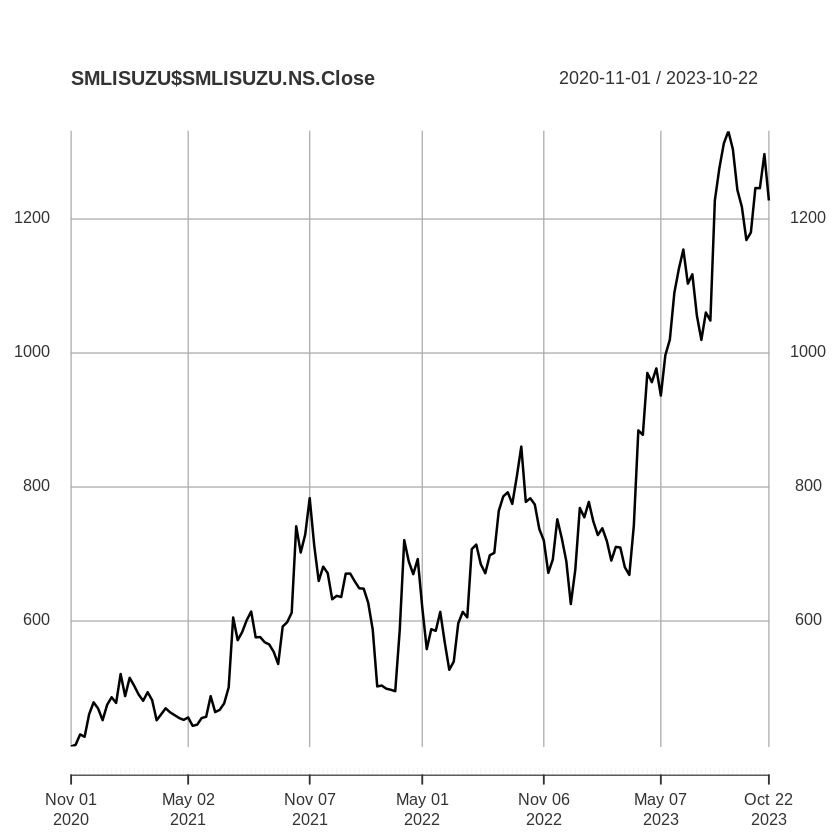

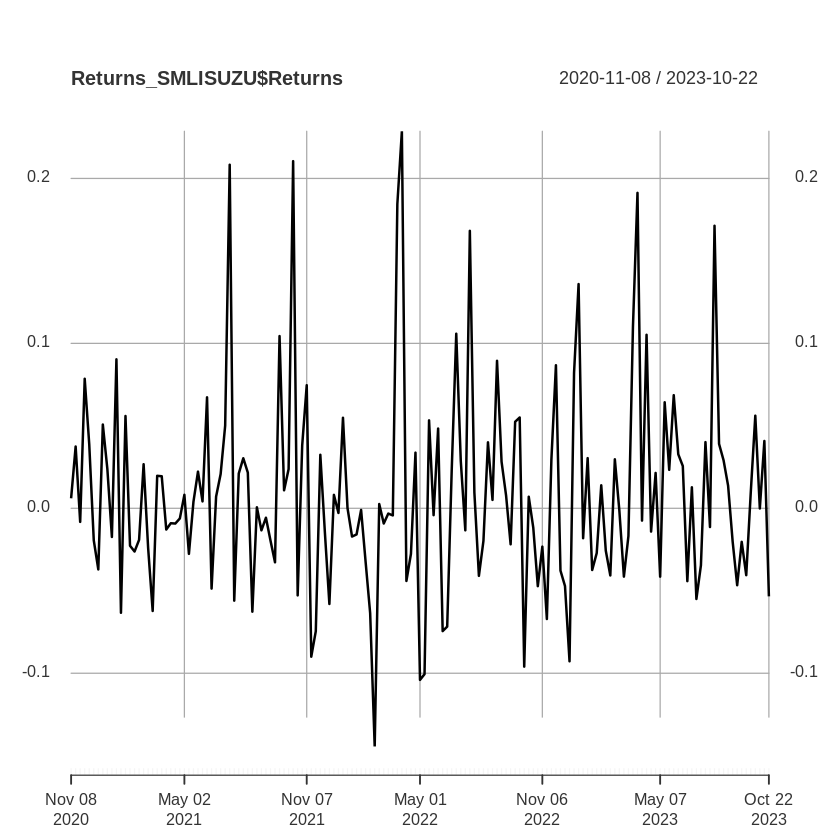

In [ ]:
library(tseries)
library(ggplot2)

SMLISUZU <- getSymbols.yahoo ("SMLISUZU.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "weekly")
head(SMLISUZU,5)

Returns_SMLISUZU <- as.xts(tail(data.frame(SMLISUZU$SMLISUZU.NS.Close), -1)/head(data.frame(SMLISUZU$SMLISUZU.NS.Close), -1) -1, frequency = 365)
colnames(Returns_SMLISUZU) <- "Returns"
head(Returns_SMLISUZU)

plot(SMLISUZU$SMLISUZU.NS.Close)
plot(Returns_SMLISUZU$Returns)

Warning message in adf.test(Returns_SMLISUZU$Returns, alternative = "stationary"):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Returns_SMLISUZU$Returns
Dickey-Fuller = -6.513, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


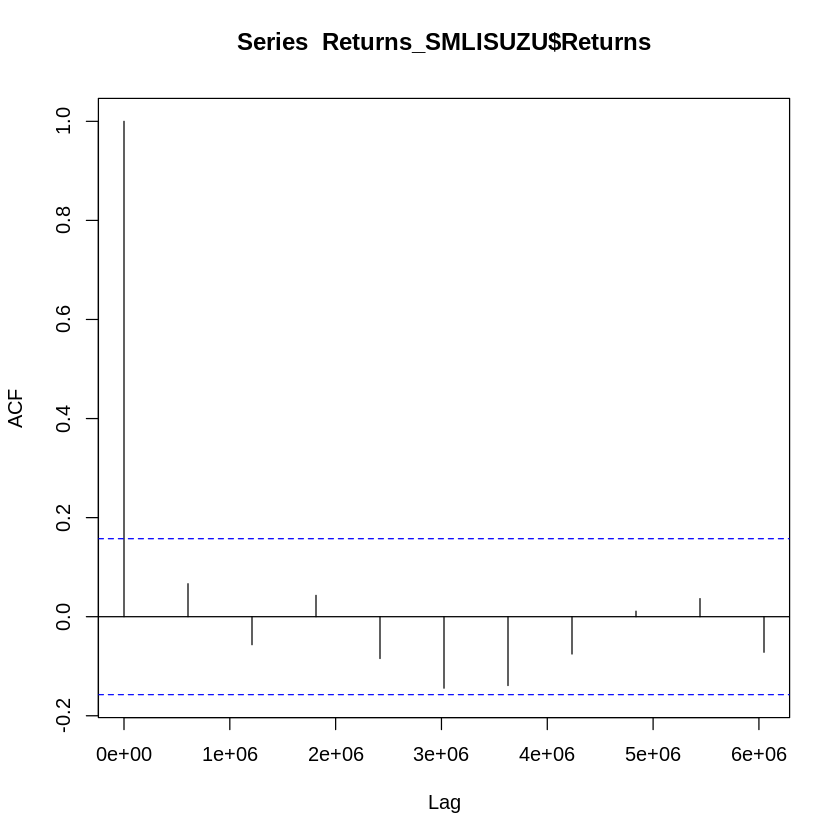

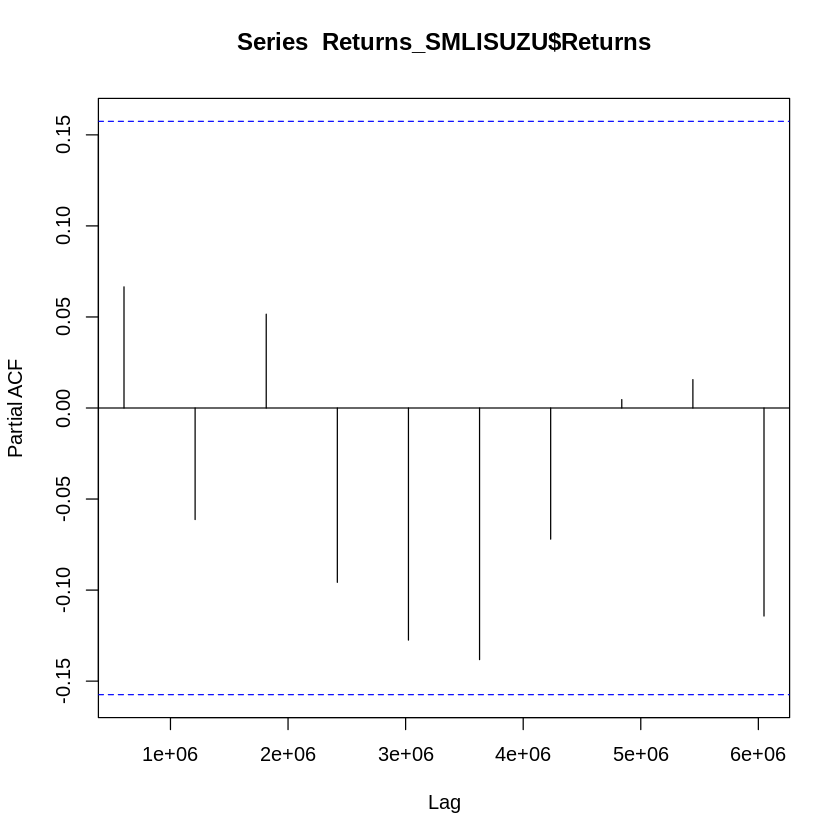

In [ ]:
adf.test(Returns_SMLISUZU$Returns, alternative = "stationary")

plot(acf(Returns_SMLISUZU$Returns, lag.max = 10))
plot(pacf(Returns_SMLISUZU$Returns, lag.max = 10))


Call:
arima(x = Returns_SMLISUZU$Returns, order = c(0, 0, 0))

Coefficients:
      intercept
         0.0089
s.e.     0.0049

sigma^2 estimated as 0.003795:  log likelihood = 212.05,  aic = -420.11

$pred
Time Series:
Start = c(93744001, 1) 
End = c(99187201, 1) 
Frequency = 1.65343915343915e-06 
 [1] 0.008870846 0.008870846 0.008870846 0.008870846 0.008870846 0.008870846
 [7] 0.008870846 0.008870846 0.008870846 0.008870846

$se
Time Series:
Start = c(93744001, 1) 
End = c(99187201, 1) 
Frequency = 1.65343915343915e-06 
 [1] 0.0616041 0.0616041 0.0616041 0.0616041 0.0616041 0.0616041 0.0616041
 [8] 0.0616041 0.0616041 0.0616041

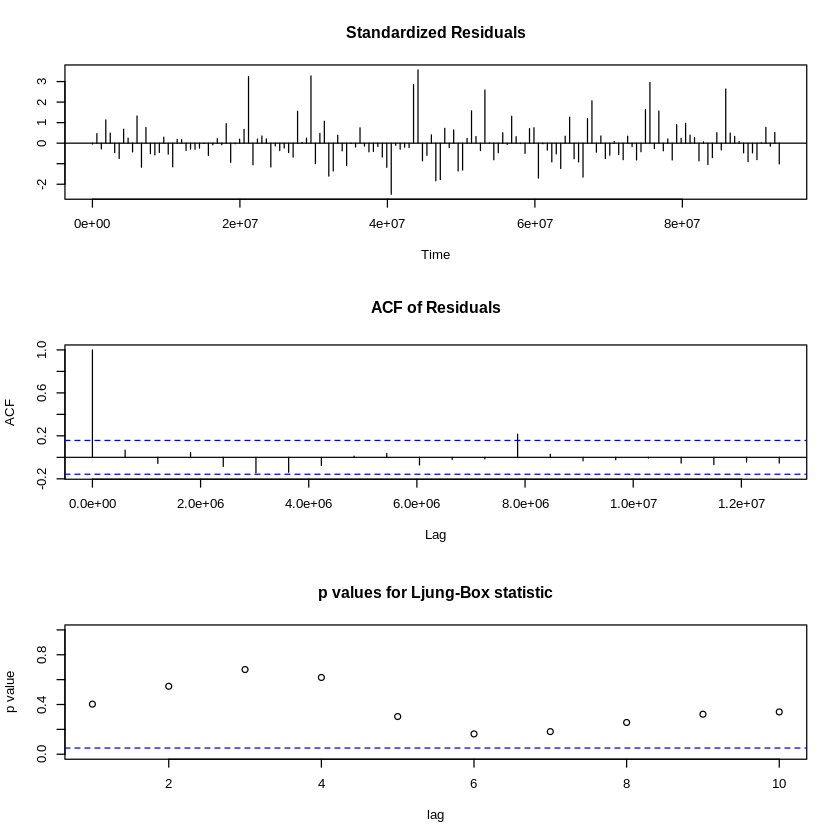

In [ ]:
arima_final <- arima(Returns_SMLISUZU$Returns, order = c(0,0,0))
arima_final

predicted <- predict(arima_final, n.ahead = 10)
predicted

tsdiag(arima_final)

### GARCH and EGARCH Model

In [ ]:
library(quantmod)

SMLISUZU <- getSymbols.yahoo("SMLISUZU.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "weekly")
head(SMLISUZU)

rSMLISUZU <- dailyReturn(SMLISUZU)
head(rSMLISUZU)

           SMLISUZU.NS.Open SMLISUZU.NS.High SMLISUZU.NS.Low SMLISUZU.NS.Close
2020-11-01           372.50           444.00           365.0            412.70
2020-11-08           405.35           423.00           400.1            415.20
2020-11-15           416.35           452.50           415.0            430.75
2020-11-22           439.00           442.65           420.5            427.20
2020-11-29           427.20           467.90           427.2            460.75
2020-12-06           460.75           521.00           458.0            478.65
           SMLISUZU.NS.Volume SMLISUZU.NS.Adjusted
2020-11-01             977038               412.70
2020-11-08             142570               415.20
2020-11-15             368960               430.75
2020-11-22             149080               427.20
2020-11-29             381396               460.75
2020-12-06             665805               478.65

           daily.returns
2020-11-01   0.107919496
2020-11-08   0.006057669
2020-11-15   0.037451800
2020-11-22  -0.008241411
2020-11-29   0.078534613
2020-12-06   0.038849688

In [ ]:
library(rugarch)

ug_spec = ugarchspec()
ug_spec

eg_spec = ugarchspec(variance.model = list(model="eGARCH"))
eg_spec

ugfit = ugarchfit(spec = ug_spec, data = rSMLISUZU)
ugfit

ugforecast = ugarchforecast(ugfit, n.ahead=10)
ugforecast


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: eGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error     t value Pr(>|t|)
mu      0.009563    0.005073    1.885039 0.059425
ar1    -0.897081    0.036544  -24.548025 0.000000
ma1     0.974671    0.000871 1119.279954 0.000000
omega   0.000090    0.000129    0.695026 0.487039
alpha1  0.000000    0.000856    0.000027 0.999978
beta1   0.977412    0.032191   30.363192 0.000000

Robust Standard Errors:
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.009563    0.004545   2.104258 0.035356
ar1    -0.897081    0.037741 -23.769341 0.000000
ma1     0.974671    0.001305 746.677909 0.000000
omega   0.000090    0.000033   2.761489 0.005754
alpha1  0.000000    0.001023   0.000023 0.999982
beta1   0.977412    0.


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 10
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2023-10-22]:
         Series   Sigma
T+1  -0.0040734 0.06298
T+2   0.0217959 0.06298
T+3  -0.0014110 0.06298
T+4   0.0194075 0.06298
T+5   0.0007317 0.06298
T+6   0.0174854 0.06299
T+7   0.0024559 0.06299
T+8   0.0159385 0.06299
T+9   0.0038436 0.06299
T+10  0.0146937 0.06299



## Monthly Returns

### CAPM Model

In [ ]:
NSE <- getSymbols.yahoo ("^NSEI", from ="2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "monthly")
NSE

SMLISUZU <- getSymbols.yahoo ("SMLISUZU.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "monthly")
SMLISUZU

head (NSE, 5)
tail (NSE, 5)

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-30  13062.20  14024.85 12962.80   13981.75    12077600      13981.75
2020-12-31  13996.10  14753.55 13596.75   13634.60    13119900      13634.60
2021-01-31  13758.60  15431.75 13661.75   14529.15    14313900      14529.15
2021-02-28  14702.50  15336.30 14264.40   14690.70     9886800      14690.70
2021-03-31  14798.40  15044.35 14151.40   14631.10     9344700      14631.10
2021-04-30  14481.05  15606.35 14416.25   15582.80     9859900      15582.80
2021-05-31  15629.65  15915.65 15450.90   15721.50     8079100      15721.50
2021-06-30  15755.05  15962.25 15513.45   15763.05     5756800      15763.05
2021-07-31  15874.90  17153.50 15834.65   17132.20     6349900      17132.20
2021-08-31  17185.60  17947.65 17055.05   17618.15     6955600      17618.15
2021-09-30  17531.90  18604.45 17452.90   17671.65     7651200      17671.65
2021-10-31  17783.15  18210.15 16782.40   16983.20     5853100      16983.20

           SMLISUZU.NS.Open SMLISUZU.NS.High SMLISUZU.NS.Low SMLISUZU.NS.Close
2020-11-30           434.90           521.00          411.30            482.55
2020-12-31           484.05           549.90          462.25            487.90
2021-01-31           490.00           553.95          471.00            480.90
2021-02-28           485.30           509.80          430.15            452.45
2021-03-31           455.75           484.95          430.00            452.40
2021-04-30           444.00           484.40          435.15            450.95
2021-05-31           454.90           500.00          446.55            462.75
2021-06-30           464.00           696.85          463.35            583.45
2021-07-31           585.95           638.00          552.05            571.00
2021-08-31           577.90           606.55          521.80            563.50
2021-09-30           567.00           789.00          554.15            702.20
2021-10-31           719.85           845.00        

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-30   13062.2  14024.85 12962.80   13981.75    12077600      13981.75
2020-12-31   13996.1  14753.55 13596.75   13634.60    13119900      13634.60
2021-01-31   13758.6  15431.75 13661.75   14529.15    14313900      14529.15
2021-02-28   14702.5  15336.30 14264.40   14690.70     9886800      14690.70
2021-03-31   14798.4  15044.35 14151.40   14631.10     9344700      14631.10

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2023-05-31  18579.40  19201.70 18464.55   19189.05     5144400      19189.05
2023-06-30  19246.50  19991.85 19234.40   19753.80     5802500      19753.80
2023-07-31  19784.00  19795.60 19223.65   19253.80     6027500      19253.80
2023-08-31  19258.15  20222.45 19255.70   19638.30     5666500      19638.30
2023-09-30  19622.40  19849.75 18837.85   19079.60     4248400      19079.60

In [ ]:
close <- cbind(NSE$NSEI.Close, SMLISUZU$SMLISUZU.NS.Close)
head(close, 5)

Returns <- as.xts(tail(data.frame(close),-1)/head(data.frame(close),-1)-1)
head(Returns, 5)

           NSEI.Close SMLISUZU.NS.Close
2020-11-30   13981.75            482.55
2020-12-31   13634.60            487.90
2021-01-31   14529.15            480.90
2021-02-28   14690.70            452.45
2021-03-31   14631.10            452.40

             NSEI.Close SMLISUZU.NS.Close
2020-12-31 -0.024828823      0.0110869469
2021-01-31  0.065608878     -0.0143472025
2021-02-28  0.011119012     -0.0591598712
2021-03-31 -0.004057028     -0.0001105499
2021-04-30  0.065046389     -0.0032050878

In [ ]:
regression <- lm(SMLISUZU.NS.Close ~ NSEI.Close, data.frame(Returns[]))
summary(regression)


Call:
lm(formula = SMLISUZU.NS.Close ~ NSEI.Close, data = data.frame(Returns[]))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.24006 -0.09251 -0.04475  0.08155  0.36454 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.03757    0.02464   1.525    0.137
NSEI.Close   0.21865    0.64641   0.338    0.737

Residual standard error: 0.1388 on 32 degrees of freedom
Multiple R-squared:  0.003563,	Adjusted R-squared:  -0.02758 
F-statistic: 0.1144 on 1 and 32 DF,  p-value: 0.7374


#### Beta for SMLISUZU for monthly returns is=0.2187

### ARIMA Model


           SMLISUZU.NS.Open SMLISUZU.NS.High SMLISUZU.NS.Low SMLISUZU.NS.Close
2020-11-30           434.90           521.00          411.30            482.55
2020-12-31           484.05           549.90          462.25            487.90
2021-01-31           490.00           553.95          471.00            480.90
2021-02-28           485.30           509.80          430.15            452.45
2021-03-31           455.75           484.95          430.00            452.40
           SMLISUZU.NS.Volume SMLISUZU.NS.Adjusted
2020-11-30            1365071               482.55
2020-12-31            1798621               487.90
2021-01-31             766370               480.90
2021-02-28             788847               452.45
2021-03-31             275135               452.40

                 Returns
2020-12-31  0.0110869469
2021-01-31 -0.0143472025
2021-02-28 -0.0591598712
2021-03-31 -0.0001105499
2021-04-30 -0.0032050878
2021-05-31  0.0261669530

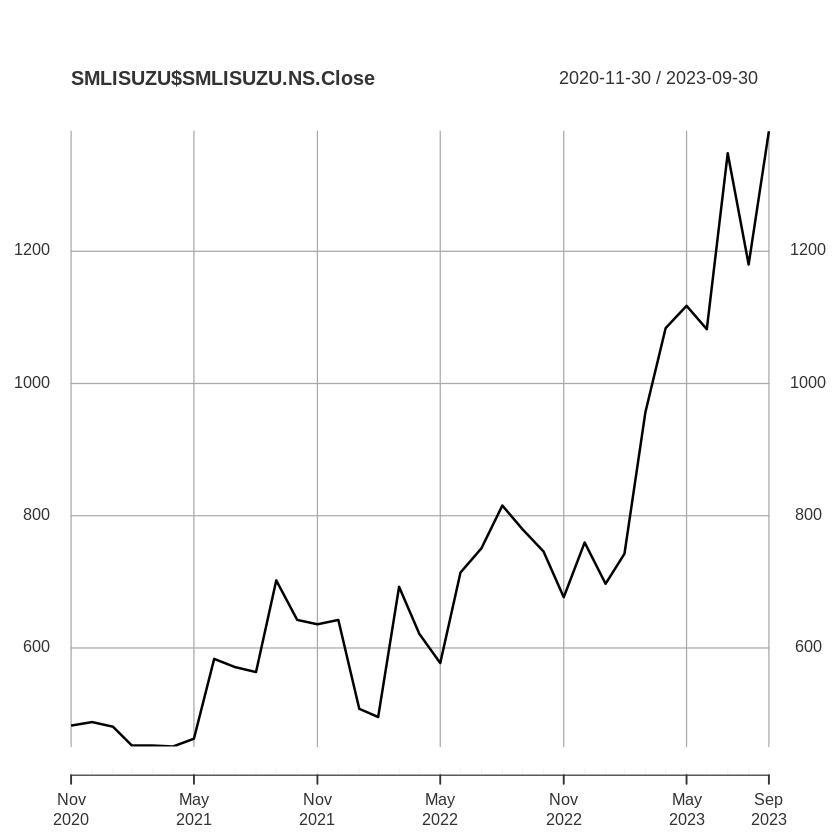

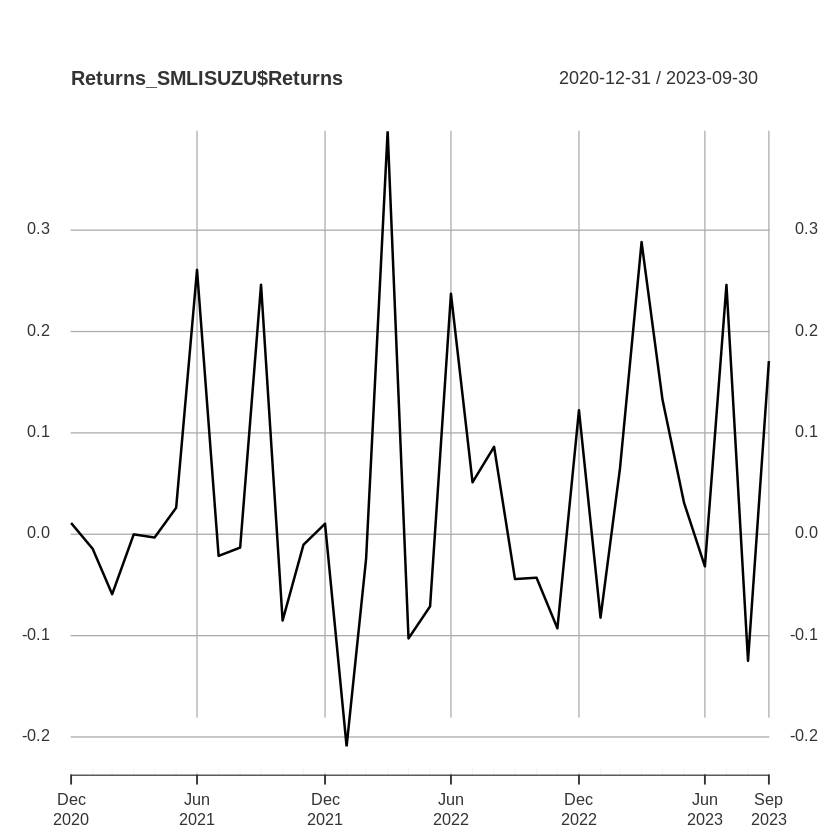

In [ ]:
library(tseries)
library(ggplot2)

SMLISUZU <- getSymbols.yahoo ("SMLISUZU.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "monthly")
head(SMLISUZU,5)

Returns_SMLISUZU <- as.xts(tail(data.frame(SMLISUZU$SMLISUZU.NS.Close), -1)/head(data.frame(SMLISUZU$SMLISUZU.NS.Close), -1) -1, frequency = 365)
colnames(Returns_SMLISUZU) <- "Returns"
head(Returns_SMLISUZU)

plot(SMLISUZU$SMLISUZU.NS.Close)
plot(Returns_SMLISUZU$Returns)


	Augmented Dickey-Fuller Test

data:  Returns_SMLISUZU$Returns
Dickey-Fuller = -3.141, Lag order = 3, p-value = 0.1309
alternative hypothesis: stationary


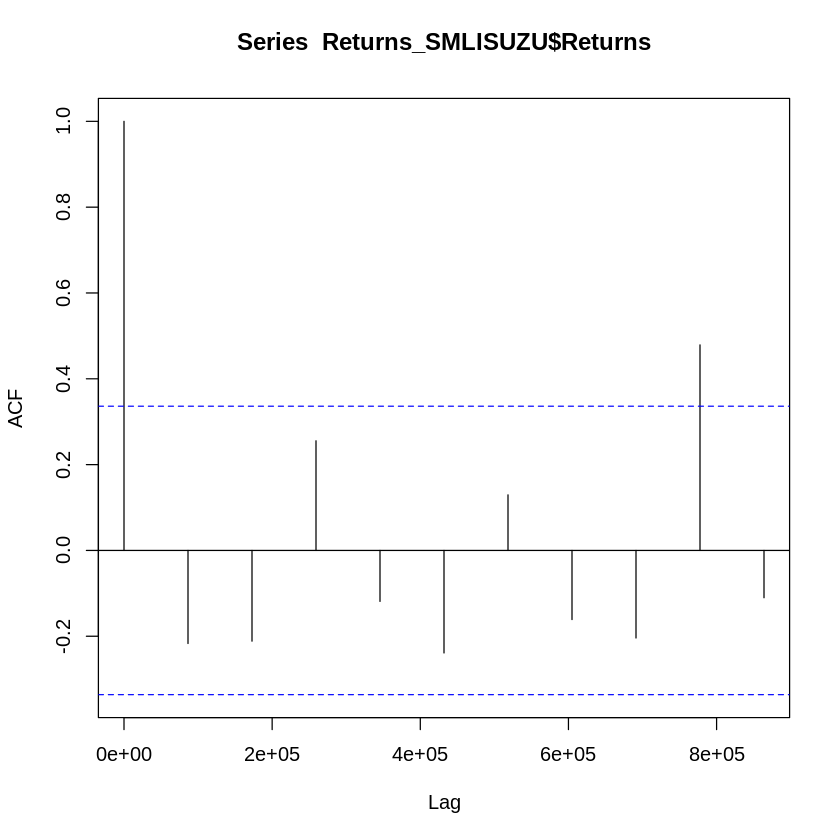

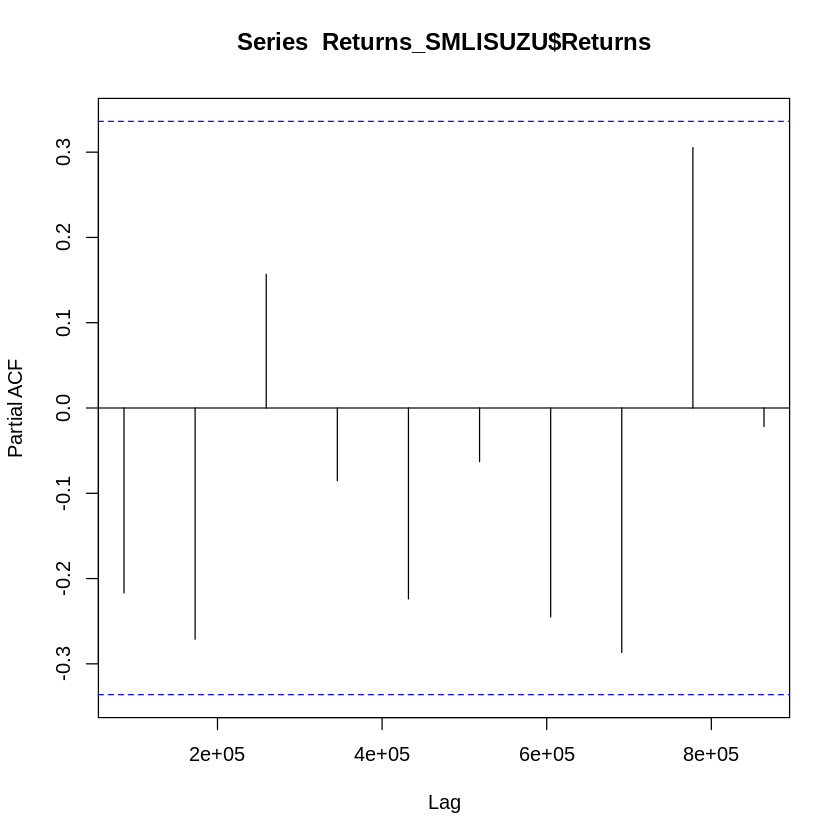

In [ ]:
adf.test(Returns_SMLISUZU$Returns, alternative = "stationary")

plot(acf(Returns_SMLISUZU$Returns, lag.max = 10))
plot(pacf(Returns_SMLISUZU$Returns, lag.max = 10))


Call:
arima(x = Returns_SMLISUZU$Returns, order = c(0, 0, 1))

Coefficients:
          ma1  intercept
      -0.3253     0.0393
s.e.   0.1888     0.0152

sigma^2 estimated as 0.01679:  log likelihood = 21.18,  aic = -36.36

$pred
Time Series:
Start = 2937601 
End = 3715201 
Frequency = 1.15740740740741e-05 
 [1] 0.007447098 0.039341533 0.039341533 0.039341533 0.039341533 0.039341533
 [7] 0.039341533 0.039341533 0.039341533 0.039341533

$se
Time Series:
Start = 2937601 
End = 3715201 
Frequency = 1.15740740740741e-05 
 [1] 0.1295782 0.1362604 0.1362604 0.1362604 0.1362604 0.1362604 0.1362604
 [8] 0.1362604 0.1362604 0.1362604

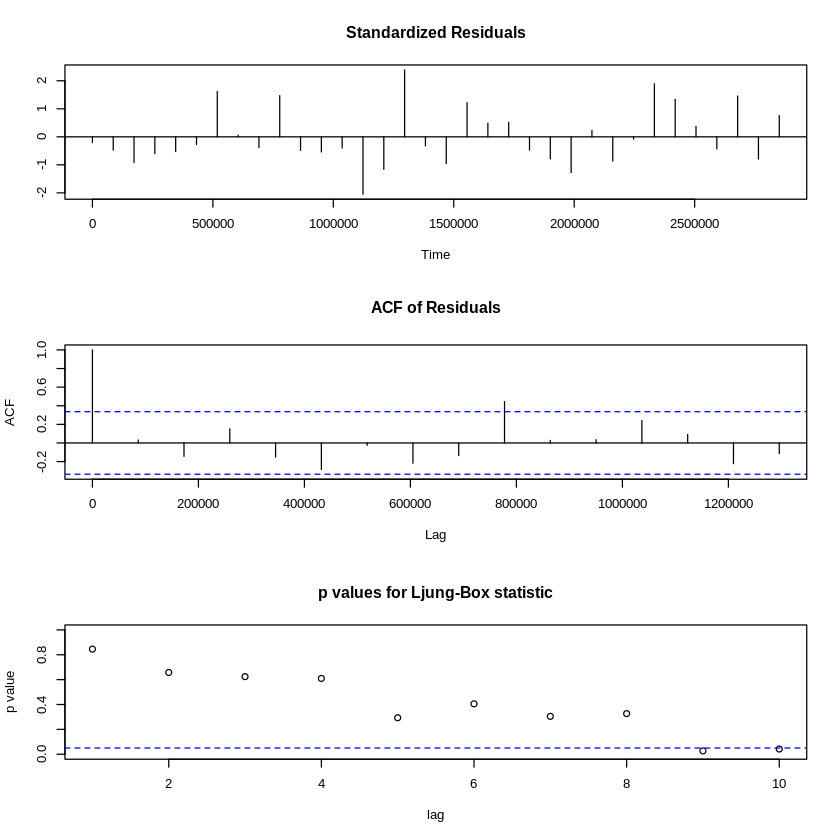

In [ ]:
arima_final <- arima(Returns_SMLISUZU$Returns, order = c(0,0,1))
arima_final

predicted <- predict(arima_final, n.ahead = 10)
predicted

tsdiag(arima_final)

### GARCH and EGARCH Model

In [ ]:
library(quantmod)

SMLISUZU <- getSymbols.yahoo("SMLISUZU.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "monthly")
head(SMLISUZU)

rSMLISUZU <- dailyReturn(SMLISUZU)
head(rSMLISUZU)

           SMLISUZU.NS.Open SMLISUZU.NS.High SMLISUZU.NS.Low SMLISUZU.NS.Close
2020-11-30           434.90           521.00          411.30            482.55
2020-12-31           484.05           549.90          462.25            487.90
2021-01-31           490.00           553.95          471.00            480.90
2021-02-28           485.30           509.80          430.15            452.45
2021-03-31           455.75           484.95          430.00            452.40
2021-04-30           444.00           484.40          435.15            450.95
           SMLISUZU.NS.Volume SMLISUZU.NS.Adjusted
2020-11-30            1365071               482.55
2020-12-31            1798621               487.90
2021-01-31             766370               480.90
2021-02-28             788847               452.45
2021-03-31             275135               452.40
2021-04-30             890728               450.95

           daily.returns
2020-11-30  0.1095654048
2020-12-31  0.0110869469
2021-01-31 -0.0143472025
2021-02-28 -0.0591598712
2021-03-31 -0.0001105499
2021-04-30 -0.0032050878

In [ ]:
library(rugarch)

ug_spec = ugarchspec()
ug_spec

eg_spec = ugarchspec(variance.model = list(model="eGARCH"))
eg_spec

ugfit = ugarchfit(spec = ug_spec, data = rSMLISUZU)
ugfit

ugforecast = ugarchforecast(ugfit, n.ahead=10)
ugforecast


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: eGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 


Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
“
ugarchfit-->waring: using less than 100 data
 points for estimation
”



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.034828    0.001512  23.027968 0.000000
ar1     0.584762    0.148289   3.943398 0.000080
ma1    -1.000000    0.083169 -12.023668 0.000000
omega   0.000102    0.002334   0.043727 0.965122
alpha1  0.000000    0.019107   0.000001 0.999999
beta1   0.998998    0.248125   4.026184 0.000057

Robust Standard Errors:
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.034828    0.004168   8.355973  0.00000
ar1     0.584762    0.111381   5.250122  0.00000
ma1    -1.000000    0.057788 -17.304536  0.00000
omega   0.000102    0.002224   0.045900  0.96339
alpha1  0.000000    0.021395   0.000001  1.00000
beta1   0.998998    0.137992 


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 10
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2023-09-30]:
         Series  Sigma
T+1  -0.0653681 0.1324
T+2  -0.0237629 0.1327
T+3   0.0005663 0.1330
T+4   0.0147931 0.1334
T+5   0.0231123 0.1337
T+6   0.0279771 0.1340
T+7   0.0308219 0.1343
T+8   0.0324854 0.1346
T+9   0.0334581 0.1349
T+10  0.0340270 0.1352



# SUTLEJTEX

## Daily Returns

### CAPM Model

In [ ]:
install.packages('quantmod')
require (quantmod) #includes necessary packages for analysis

NSE <- getSymbols.yahoo ("^NSEI", from ="2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE)
NSE

SUTLEJTEX <- getSymbols.yahoo ("SUTLEJTEX.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE)
SUTLEJTEX

head (NSE, 5)
tail (NSE, 5)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“^NSEI contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-02  11697.35  11725.65 11557.40   11669.15      568400      11669.15
2020-11-03  11734.45  11836.20 11723.30   11813.50      674300      11813.50
2020-11-04  11783.35  11929.65 11756.40   11908.50      667300      11908.50
2020-11-05  12062.40  12131.10 12027.60   12120.30      632500      12120.30
2020-11-06  12156.65  12280.40 12131.85   12263.55      576800      12263.55
2020-11-09  12399.40  12474.05 12367.35   12461.05      553400      12461.05
2020-11-10  12556.40  12643.90 12475.25   12631.10      847500      12631.10
2020-11-11  12680.60  12769.75 12571.10   12749.15      880500      12749.15
2020-11-12  12702.15  12741.15 12624.85   12690.80      622000      12690.80
2020-11-13  12659.70  12735.95 12607.70   12719.95      513900      12719.95
       ...                                                                  
2023-10-11  19767.00  19839.20 19756.95   19811.35      213700      19811.35

Warning message:
“SUTLEJTEX.NS contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


           SUTLEJTEX.NS.Open SUTLEJTEX.NS.High SUTLEJTEX.NS.Low
2020-11-02             27.55             27.55            27.05
2020-11-03             27.65             28.50            27.10
2020-11-04             27.30             27.70            27.15
2020-11-05             27.60             27.60            27.15
2020-11-06             27.75             27.75            26.50
2020-11-09             27.40             27.40            26.10
2020-11-10             26.70             27.40            26.20
2020-11-11             26.90             27.60            26.60
2020-11-12             27.05             28.50            26.60
2020-11-13             27.80             28.00            26.35
       ...                                                     
2023-10-11             55.85             56.15            55.00
2023-10-12             56.10             57.30            55.50
2023-10-13             55.50             56.00            55.00
2023-10-16             56.00            

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-02  11697.35  11725.65 11557.40   11669.15      568400      11669.15
2020-11-03  11734.45  11836.20 11723.30   11813.50      674300      11813.50
2020-11-04  11783.35  11929.65 11756.40   11908.50      667300      11908.50
2020-11-05  12062.40  12131.10 12027.60   12120.30      632500      12120.30
2020-11-06  12156.65  12280.40 12131.85   12263.55      576800      12263.55

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2023-10-18  19820.45  19840.95 19659.95   19671.10      198900      19671.10
2023-10-19  19545.20  19681.80 19512.35   19624.70      230300      19624.70
2023-10-20  19542.15  19593.80 19518.70   19542.65      198300      19542.65
2023-10-23  19521.60  19556.85 19257.85   19281.75      176000      19281.75
2023-10-25  19286.45  19347.30 19074.15   19122.15      225300      19122.15

In [ ]:
close <- cbind(NSE$NSEI.Close, SUTLEJTEX$SUTLEJTEX.NS.Close)
head(close, 5)

Returns <- as.xts(tail(data.frame(close),-1)/head(data.frame(close),-1)-1)
head(Returns, 5)

           NSEI.Close SUTLEJTEX.NS.Close
2020-11-02   11669.15              27.45
2020-11-03   11813.50              27.55
2020-11-04   11908.50              27.20
2020-11-05   12120.30              27.20
2020-11-06   12263.55              26.85

            NSEI.Close SUTLEJTEX.NS.Close
2020-11-03 0.012370190        0.003642932
2020-11-04 0.008041647       -0.012704119
2020-11-05 0.017785599        0.000000000
2020-11-06 0.011819015       -0.012867661
2020-11-09 0.016104636        0.000000000

In [ ]:
regression <- lm(SUTLEJTEX.NS.Close ~ NSEI.Close, data.frame(Returns[]))
summary(regression)


Call:
lm(formula = SUTLEJTEX.NS.Close ~ NSEI.Close, data = data.frame(Returns[]))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.086976 -0.017046 -0.002691  0.013280  0.199209 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0004756  0.0011319    0.42    0.674    
NSEI.Close  1.2551399  0.1206336   10.40   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03059 on 732 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.1288,	Adjusted R-squared:  0.1276 
F-statistic: 108.3 on 1 and 732 DF,  p-value: < 2.2e-16


#### Beta for SUTLEJTEX=1.255 based on daily returns

### ARIMA Model

Warning message:
“SUTLEJTEX.NS contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


           SUTLEJTEX.NS.Open SUTLEJTEX.NS.High SUTLEJTEX.NS.Low
2020-11-02             27.55             27.55            27.05
2020-11-03             27.65             28.50            27.10
2020-11-04             27.30             27.70            27.15
2020-11-05             27.60             27.60            27.15
2020-11-06             27.75             27.75            26.50
           SUTLEJTEX.NS.Close SUTLEJTEX.NS.Volume SUTLEJTEX.NS.Adjusted
2020-11-02              27.45               23786              26.07893
2020-11-03              27.55               18967              26.17393
2020-11-04              27.20                4331              25.84142
2020-11-05              27.20                5687              25.84142
2020-11-06              26.85               53466              25.50890

                Returns
2020-11-03  0.003642932
2020-11-04 -0.012704119
2020-11-05  0.000000000
2020-11-06 -0.012867661
2020-11-09  0.000000000
2020-11-10  0.011173156

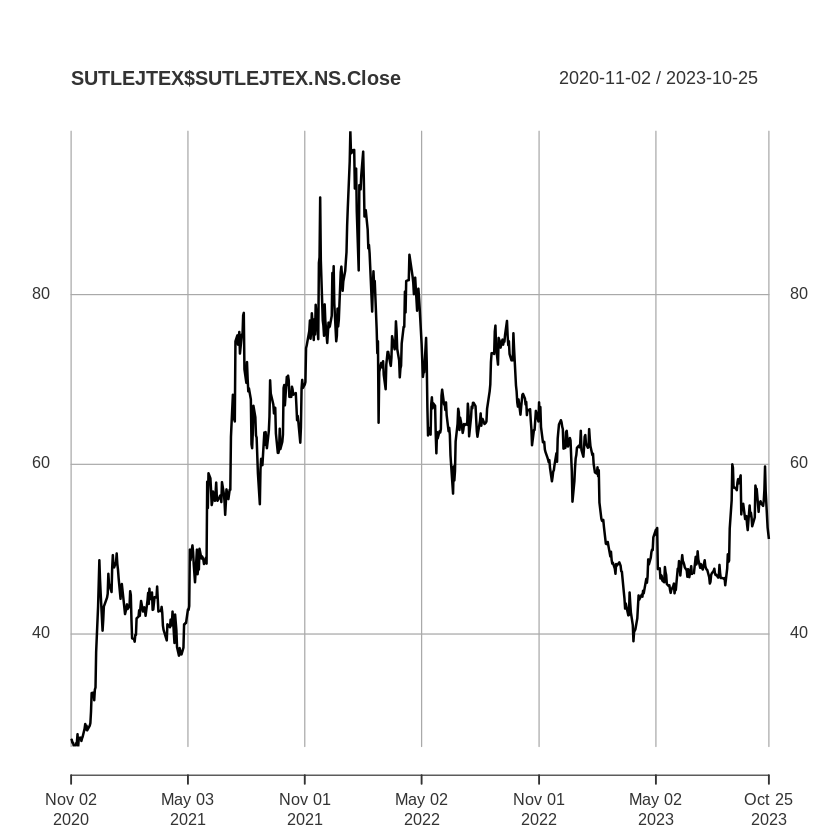

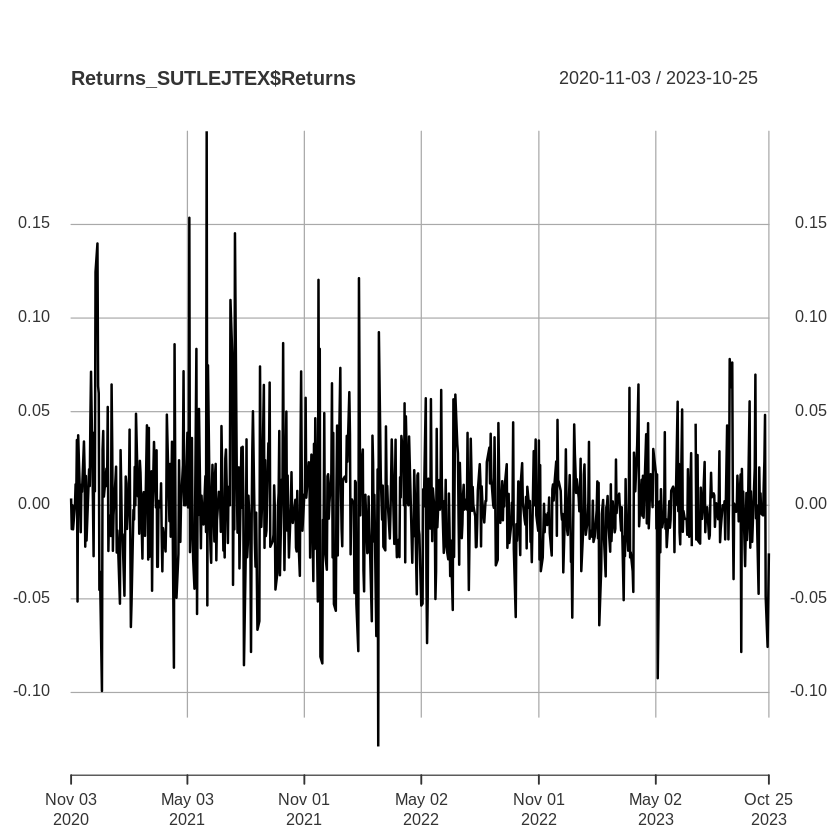

In [ ]:

library(tseries)
library(ggplot2)

SUTLEJTEX <- getSymbols.yahoo ("SUTLEJTEX.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE)
head (SUTLEJTEX, 5)

Returns_SUTLEJTEX <- as.xts(tail(data.frame(SUTLEJTEX$SUTLEJTEX.NS.Close), -1)/head(data.frame(SUTLEJTEX$SUTLEJTEX.NS.Close), -1) -1, frequency = 365)
colnames(Returns_SUTLEJTEX) <- "Returns"
head(Returns_SUTLEJTEX)

plot(SUTLEJTEX$SUTLEJTEX.NS.Close)
plot(Returns_SUTLEJTEX$Returns)

In [ ]:
Returns[is.na(Returns)] <- 0
Returns
Returns_SUTLEJTEX[is.na(Returns_SUTLEJTEX)] <- 0


ERROR: ignored

In [ ]:
adf.test(Returns_SUTLEJTEX$Returns, alternative = "stationary")

plot(acf(Returns_SUTLEJTEX$Returns, lag.max = 10))
plot(pacf(Returns_SUTLEJTEX$Returns, lag.max = 10))

ERROR: ignored


Call:
arima(x = Returns_SUTLEJTEX$Returns, order = c(0, 0, 1))

Coefficients:
          ma1  intercept
      -0.0284     0.0014
s.e.   0.0363     0.0012

sigma^2 estimated as 0.001069:  log likelihood = 1473.21,  aic = -2940.42

$pred
Time Series:
Start = 63763201 
End = 64540801 
Frequency = 1.15740740740741e-05 
 [1] 0.002204219 0.001371187 0.001371187 0.001371187 0.001371187 0.001371187
 [7] 0.001371187 0.001371187 0.001371187 0.001371187

$se
Time Series:
Start = 63763201 
End = 64540801 
Frequency = 1.15740740740741e-05 
 [1] 0.03269331 0.03270653 0.03270653 0.03270653 0.03270653 0.03270653
 [7] 0.03270653 0.03270653 0.03270653 0.03270653

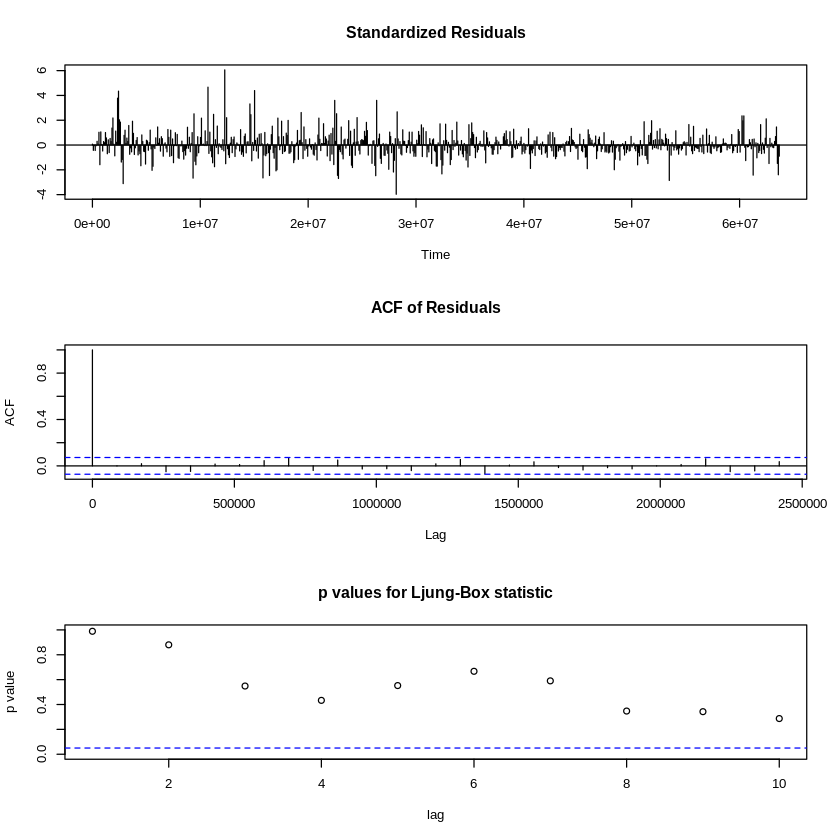

In [ ]:
arima_final <- arima(Returns_SUTLEJTEX$Returns, order = c(0,0,1))
arima_final

predicted <- predict(arima_final, n.ahead = 10)
predicted

tsdiag(arima_final)

### GARCH and EGARCH Model

In [ ]:
library(quantmod)

SUTLEJTEX <- getSymbols.yahoo("SUTLEJTEX.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE)
head(SUTLEJTEX)

rSUTLEJTEX <- dailyReturn(SUTLEJTEX)
head(rSUTLEJTEX)

Warning message:
“SUTLEJTEX.NS contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


           SUTLEJTEX.NS.Open SUTLEJTEX.NS.High SUTLEJTEX.NS.Low
2020-11-02             27.55             27.55            27.05
2020-11-03             27.65             28.50            27.10
2020-11-04             27.30             27.70            27.15
2020-11-05             27.60             27.60            27.15
2020-11-06             27.75             27.75            26.50
2020-11-09             27.40             27.40            26.10
           SUTLEJTEX.NS.Close SUTLEJTEX.NS.Volume SUTLEJTEX.NS.Adjusted
2020-11-02              27.45               23786              26.07893
2020-11-03              27.55               18967              26.17393
2020-11-04              27.20                4331              25.84142
2020-11-05              27.20                5687              25.84142
2020-11-06              26.85               53466              25.50890
2020-11-09              26.85               35479              25.50890

Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”


           daily.returns
2020-11-02  -0.003629709
2020-11-03   0.003642932
2020-11-04  -0.012704119
2020-11-05   0.000000000
2020-11-06  -0.012867661
2020-11-09   0.000000000

In [ ]:
install.packages("rmgarch")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘gmp’, ‘ks’, ‘numDeriv’, ‘chron’, ‘SkewHyperbolic’, ‘nloptr’, ‘truncnorm’, ‘Rmpfr’, ‘mvtnorm’, ‘rugarch’, ‘Rsolnp’, ‘Bessel’, ‘ff’, ‘shape’, ‘pcaPP’, ‘spd’, ‘Rcpp’, ‘corpcor’, ‘RcppArmadillo’


Warning message in install.packages("rmgarch"):
“installation of package ‘gmp’ had non-zero exit status”
Warning message in install.packages("rmgarch"):
“installation of package ‘Rmpfr’ had non-zero exit status”
Warning message in install.packages("rmgarch"):
“installation of package ‘Bessel’ had non-zero exit status”
Warning message in install.packages("rmgarch"):
“installation of package ‘rmgarch’ had non-zero exit status”


In [ ]:
install.packages("rugarch")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(rugarch)

ug_spec = ugarchspec()
ug_spec

eg_spec = ugarchspec(variance.model = list(model="eGARCH"))
eg_spec

ugfit = ugarchfit(spec = ug_spec, data = rSUTLEJTEX)
ugfit

ugforecast = ugarchforecast(ugfit, n.ahead=10)
ugforecast

Loading required package: parallel


Attaching package: ‘rugarch’


The following object is masked from ‘package:stats’:

    sigma





*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: eGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000466    0.001077  0.43261 0.665299
ar1    -0.766255    0.428377 -1.78874 0.073657
ma1     0.774598    0.421242  1.83884 0.065938
omega   0.000013    0.000005  2.77027 0.005601
alpha1  0.051453    0.004037 12.74683 0.000000
beta1   0.938755    0.011933 78.67040 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000466    0.001049  0.44416 0.656927
ar1    -0.766255    0.156722 -4.88926 0.000001
ma1     0.774598    0.150015  5.16346 0.000000
omega   0.000013    0.000012  1.11153 0.266338
alpha1  0.051453    0.022830  2.25380 0.024209
beta1   0.938755    0.015087 62.22395 0.000000

LogLike


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 10
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2023-10-25]:
        Series   Sigma
T+1  0.0004125 0.03437
T+2  0.0005068 0.03439
T+3  0.0004345 0.03441
T+4  0.0004899 0.03443
T+5  0.0004475 0.03445
T+6  0.0004800 0.03447
T+7  0.0004551 0.03448
T+8  0.0004742 0.03450
T+9  0.0004595 0.03452
T+10 0.0004707 0.03454



## Weekly Returns

### CAPM Model

In [ ]:
NSE <- getSymbols.yahoo ("^NSEI", from ="2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "weekly")
NSE

SUTLEJTEX <- getSymbols.yahoo ("SUTLEJTEX.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "weekly")
SUTLEJTEX

head (NSE, 5)
tail (NSE, 5)

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-01  11697.35  12280.40 11557.40   12263.55     3119300      12263.55
2020-11-08  12399.40  12769.75 12367.35   12719.95     3417300      12719.95
2020-11-15  12932.50  12963.00 12730.25   12859.05     2871800      12859.05
2020-11-22  12960.30  13145.85 12790.40   12968.95     3596200      12968.95
2020-11-29  13062.20  13280.05 12962.80   13258.55     2655500      13258.55
2020-12-06  13264.85  13579.35 13241.95   13513.85     2978600      13513.85
2020-12-13  13571.45  13773.25 13447.05   13760.55     2453600      13760.55
2020-12-20  13741.90  13777.50 13131.45   13749.25     2313600      13749.25
2020-12-27  13815.15  14049.85 13811.55   14018.50     2034400      14018.50
2021-01-03  14104.35  14367.30 13953.75   14347.25     2792500      14347.25
       ...                                                                  
2023-08-20  19320.65  19584.45 19229.70   19265.80     1431300      19265.80

           SUTLEJTEX.NS.Open SUTLEJTEX.NS.High SUTLEJTEX.NS.Low
2020-11-01             27.55             28.50            26.50
2020-11-08             27.40             28.50            26.00
2020-11-15             26.75             28.50            26.75
2020-11-22             27.25             30.20            27.10
2020-11-29             28.65             35.75            28.60
2020-12-06             33.00             38.90            31.80
2020-12-13             40.00             51.80            39.55
2020-12-20             45.00             45.30            37.10
2020-12-27             44.90             48.40            41.85
2021-01-03             46.00             52.00            43.65
       ...                                                     
2023-08-20             45.90             53.60            45.80
2023-08-27             53.00             62.30            52.95
2023-09-03             57.50             58.95            55.30
2023-09-10             57.25            

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-01  11697.35  12280.40 11557.40   12263.55     3119300      12263.55
2020-11-08  12399.40  12769.75 12367.35   12719.95     3417300      12719.95
2020-11-15  12932.50  12963.00 12730.25   12859.05     2871800      12859.05
2020-11-22  12960.30  13145.85 12790.40   12968.95     3596200      12968.95
2020-11-29  13062.20  13280.05 12962.80   13258.55     2655500      13258.55

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2023-09-24  19678.20  19766.65 19492.10   19638.30     1193200      19638.30
2023-10-01  19622.40  19675.75 19333.60   19653.50      892800      19653.50
2023-10-08  19539.45  19843.30 19480.50   19751.05     1068300      19751.05
2023-10-15  19737.25  19849.75 19512.35   19542.65      994300      19542.65
2023-10-22  19521.60  19556.85 18837.85   18857.25      701700      18857.25

In [ ]:
close <- cbind(NSE$NSEI.Close, SUTLEJTEX$SUTLEJTEX.NS.Close)
head(close, 5)

Returns <- as.xts(tail(data.frame(close),-1)/head(data.frame(close),-1)-1)
head(Returns, 5)

           NSEI.Close SUTLEJTEX.NS.Close
2020-11-01   12263.55              26.85
2020-11-08   12719.95              27.75
2020-11-15   12859.05              27.90
2020-11-22   12968.95              28.65
2020-11-29   13258.55              33.05

            NSEI.Close SUTLEJTEX.NS.Close
2020-11-08 0.037216010        0.033519538
2020-11-15 0.010935547        0.005405392
2020-11-22 0.008546541        0.026881721
2020-11-29 0.022330228        0.153577650
2020-12-06 0.019255485        0.146747425

In [ ]:
regression <- lm(SUTLEJTEX.NS.Close ~ NSEI.Close, data.frame(Returns[]))
summary(regression)


Call:
lm(formula = SUTLEJTEX.NS.Close ~ NSEI.Close, data = data.frame(Returns[]))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.182301 -0.037451 -0.008943  0.031289  0.202948 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.002893   0.004909   0.589    0.557    
NSEI.Close  1.047525   0.236605   4.427 1.81e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06048 on 153 degrees of freedom
Multiple R-squared:  0.1136,	Adjusted R-squared:  0.1078 
F-statistic:  19.6 on 1 and 153 DF,  p-value: 1.806e-05


#### Beta for SUTLEJTEX=1.0475 based on weekly returns

### ARIMA Model

           SUTLEJTEX.NS.Open SUTLEJTEX.NS.High SUTLEJTEX.NS.Low
2020-11-01             27.55             28.50            26.50
2020-11-08             27.40             28.50            26.00
2020-11-15             26.75             28.50            26.75
2020-11-22             27.25             30.20            27.10
2020-11-29             28.65             35.75            28.60
           SUTLEJTEX.NS.Close SUTLEJTEX.NS.Volume SUTLEJTEX.NS.Adjusted
2020-11-01              26.85              106237              25.50890
2020-11-08              27.75              160118              26.36394
2020-11-15              27.90              193793              26.50645
2020-11-22              28.65              278883              27.21899
2020-11-29              33.05              785713              31.39922

                Returns
2020-11-03  0.003642932
2020-11-04 -0.012704119
2020-11-05  0.000000000
2020-11-06 -0.012867661
2020-11-09  0.000000000
2020-11-10  0.011173156

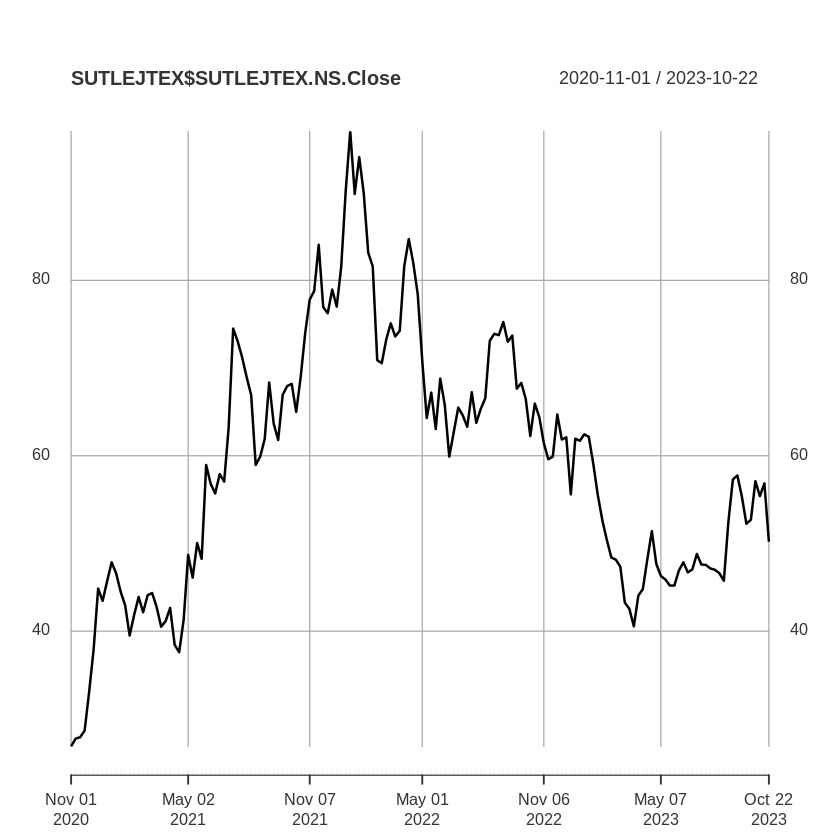

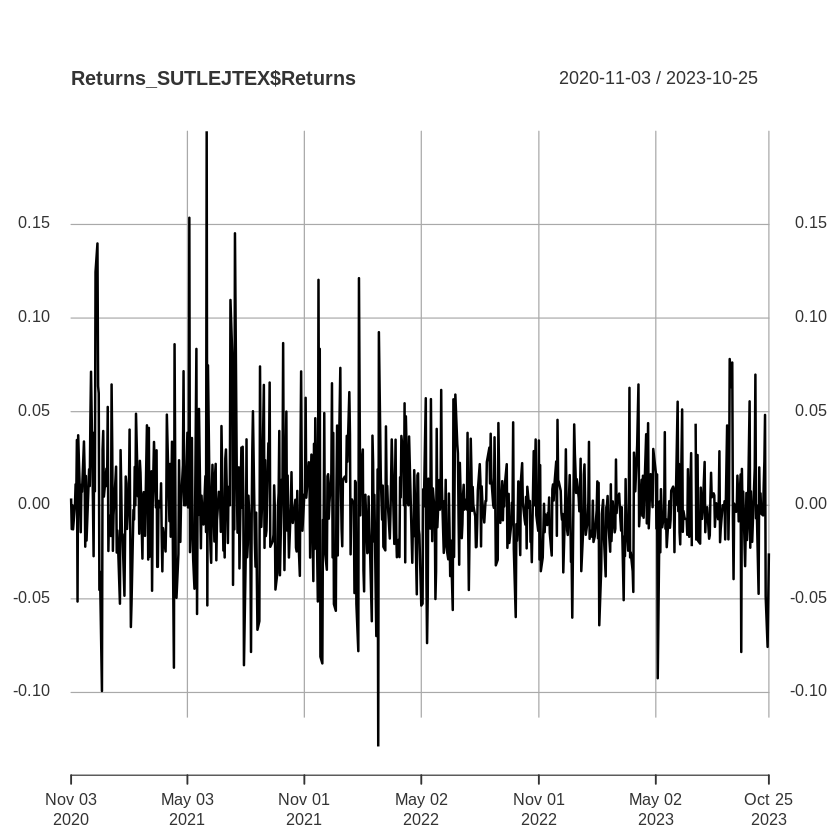

In [ ]:
library(tseries)
library(ggplot2)
SUTLEJTEX <- getSymbols.yahoo ("SUTLEJTEX.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "weekly")
head(SUTLEJTEX,5)

Returns_UTLEJTEX <- as.xts(tail(data.frame(SUTLEJTEX$SUTLEJTEX.NS.Close), -1)/head(data.frame(SUTLEJTEX$SUTLEJTEX.NS.Close), -1) -1, frequency = 52)
colnames(Returns_SUTLEJTEX) <- "Returns"
head(Returns_SUTLEJTEX)

plot(SUTLEJTEX$SUTLEJTEX.NS.Close)
plot(Returns_SUTLEJTEX$Returns)

In [ ]:
adf.test(Returns_SUTLEJTEX$Returns, alternative = "stationary")

plot(acf(Returns_SUTLEJTEX$Returns, lag.max = 10))
plot(pacf(Returns_SUTLEJTEX$Returns, lag.max = 10))

ERROR: ignored


Call:
arima(x = Returns_SUTLEJTEX$Returns, order = c(0, 0, 0))

Coefficients:
      intercept
         0.0014
s.e.     0.0012

sigma^2 estimated as 0.00107:  log likelihood = 1472.9,  aic = -2941.81

$pred
Time Series:
Start = 63763201 
End = 64540801 
Frequency = 1.15740740740741e-05 
 [1] 0.001371062 0.001371062 0.001371062 0.001371062 0.001371062 0.001371062
 [7] 0.001371062 0.001371062 0.001371062 0.001371062

$se
Time Series:
Start = 63763201 
End = 64540801 
Frequency = 1.15740740740741e-05 
 [1] 0.032707 0.032707 0.032707 0.032707 0.032707 0.032707 0.032707 0.032707
 [9] 0.032707 0.032707

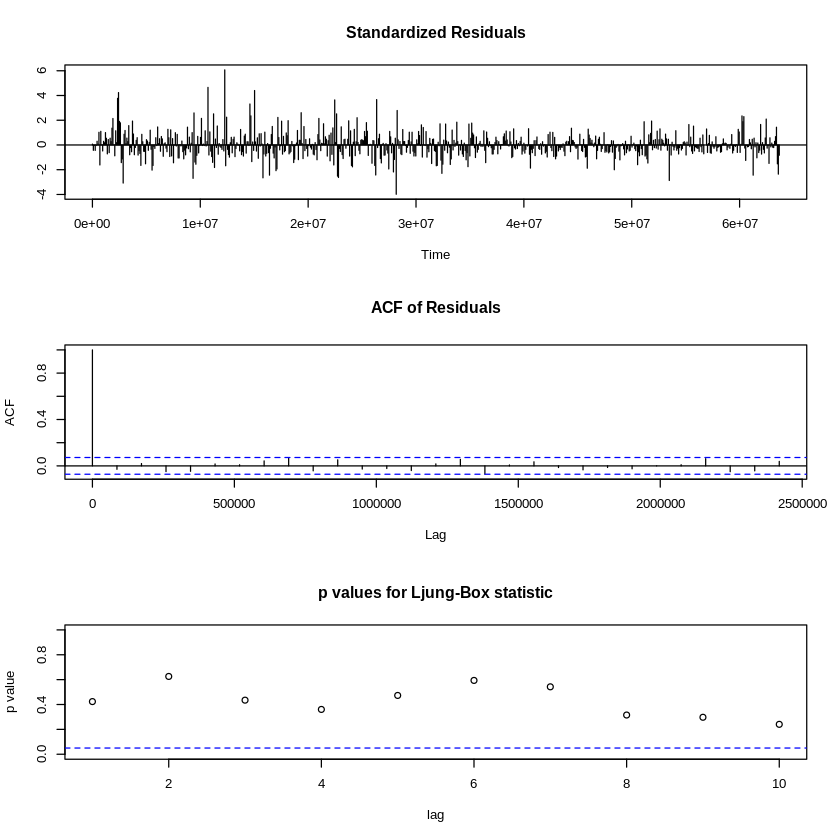

In [ ]:
arima_final <- arima(Returns_SUTLEJTEX$Returns, order = c(0,0,0))
arima_final

predicted <- predict(arima_final, n.ahead = 10)
predicted

tsdiag(arima_final)

### GARCH AND EGARCH Model

In [ ]:
library(quantmod)

SUTLEJTEX <- getSymbols.yahoo("SUTLEJTEX.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity="weekly")
head(SUTLEJTEX)

rSUTLEJTEX <- dailyReturn(SUTLEJTEX)
head(rSUTLEJTEX)

           SUTLEJTEX.NS.Open SUTLEJTEX.NS.High SUTLEJTEX.NS.Low
2020-11-01             27.55             28.50            26.50
2020-11-08             27.40             28.50            26.00
2020-11-15             26.75             28.50            26.75
2020-11-22             27.25             30.20            27.10
2020-11-29             28.65             35.75            28.60
2020-12-06             33.00             38.90            31.80
           SUTLEJTEX.NS.Close SUTLEJTEX.NS.Volume SUTLEJTEX.NS.Adjusted
2020-11-01              26.85              106237              25.50890
2020-11-08              27.75              160118              26.36395
2020-11-15              27.90              193793              26.50645
2020-11-22              28.65              278883              27.21899
2020-11-29              33.05              785713              31.39922
2020-12-06              37.90             1684807              36.00697

           daily.returns
2020-11-01  -0.025408308
2020-11-08   0.033519538
2020-11-15   0.005405392
2020-11-22   0.026881721
2020-11-29   0.153577650
2020-12-06   0.146747425

In [ ]:
library(rugarch)

ug_spec = ugarchspec()
ug_spec

eg_spec = ugarchspec(variance.model = list(model="eGARCH"))
eg_spec

ugfit = ugarchfit(spec = ug_spec, data = rSUTLEJTEX)
ugfit

ugforecast = ugarchforecast(ugfit, n.ahead=10)
ugforecast


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: eGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.004644    0.005590   0.83087  0.40605
ar1     0.248867    0.577015   0.43130  0.66625
ma1    -0.169490    0.583682  -0.29038  0.77153
omega   0.000000    0.000010   0.00001  0.99999
alpha1  0.001087    0.001441   0.75462  0.45048
beta1   0.996677    0.001514 658.16957  0.00000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.004644    0.006327   0.73410 0.462891
ar1     0.248867    0.357442   0.69625 0.486275
ma1    -0.169490    0.354099  -0.47865 0.632188
omega   0.000000    0.000005   0.00002 0.999984
alpha1  0.001087    0.000575   1.88951 0.058824
beta1   0.996677    0.001031 966.88419 0.0


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 10
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2023-10-22]:
        Series   Sigma
T+1  -0.004768 0.05389
T+2   0.002302 0.05383
T+3   0.004061 0.05376
T+4   0.004499 0.05370
T+5   0.004608 0.05364
T+6   0.004635 0.05358
T+7   0.004642 0.05352
T+8   0.004644 0.05346
T+9   0.004644 0.05341
T+10  0.004644 0.05335



## Monthly Returns

### CAPM Model

In [ ]:
NSE <- getSymbols.yahoo ("^NSEI", from ="2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "monthly")
NSE

SUTLEJTEX <- getSymbols.yahoo ("SUTLEJTEX.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "monthly")
SUTLEJTEX

head (NSE, 5)
tail (NSE, 5)

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-30  13062.20  14024.85 12962.80   13981.75    12077600      13981.75
2020-12-31  13996.10  14753.55 13596.75   13634.60    13119900      13634.60
2021-01-31  13758.60  15431.75 13661.75   14529.15    14313900      14529.15
2021-02-28  14702.50  15336.30 14264.40   14690.70     9886800      14690.70
2021-03-31  14798.40  15044.35 14151.40   14631.10     9344700      14631.10
2021-04-30  14481.05  15606.35 14416.25   15582.80     9859900      15582.80
2021-05-31  15629.65  15915.65 15450.90   15721.50     8079100      15721.50
2021-06-30  15755.05  15962.25 15513.45   15763.05     5756800      15763.05
2021-07-31  15874.90  17153.50 15834.65   17132.20     6349900      17132.20
2021-08-31  17185.60  17947.65 17055.05   17618.15     6955600      17618.15
2021-09-30  17531.90  18604.45 17452.90   17671.65     7651200      17671.65
2021-10-31  17783.15  18210.15 16782.40   16983.20     5853100      16983.20

           SUTLEJTEX.NS.Open SUTLEJTEX.NS.High SUTLEJTEX.NS.Low
2020-11-30             28.65             51.80            28.60
2020-12-31             46.70             52.00            41.40
2021-01-31             42.55             46.70            38.50
2021-02-28             42.80             46.50            39.05
2021-03-31             39.85             43.00            36.75
2021-04-30             42.60             53.00            42.05
2021-05-31             49.80             61.00            47.30
2021-06-30             54.95             81.20            54.55
2021-07-31             70.70             74.65            54.05
2021-08-31             62.25             73.90            57.60
2021-09-30             68.90             73.65            62.20
2021-10-31             71.35             92.50            68.70
2021-11-30             75.70             86.00            72.15
2021-12-31             82.90            104.95            81.45
2022-01-31             97.80            

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-30   13062.2  14024.85 12962.80   13981.75    12077600      13981.75
2020-12-31   13996.1  14753.55 13596.75   13634.60    13119900      13634.60
2021-01-31   13758.6  15431.75 13661.75   14529.15    14313900      14529.15
2021-02-28   14702.5  15336.30 14264.40   14690.70     9886800      14690.70
2021-03-31   14798.4  15044.35 14151.40   14631.10     9344700      14631.10

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2023-05-31  18579.40  19201.70 18464.55   19189.05     5144400      19189.05
2023-06-30  19246.50  19991.85 19234.40   19753.80     5802500      19753.80
2023-07-31  19784.00  19795.60 19223.65   19253.80     6027500      19253.80
2023-08-31  19258.15  20222.45 19255.70   19638.30     5666500      19638.30
2023-09-30  19622.40  19849.75 18837.85   19079.60     4248400      19079.60

In [ ]:
close <- cbind(NSE$NSEI.Close, SUTLEJTEX$SUTLEJTEX.NS.Close)
head(close, 5)

Returns <- as.xts(tail(data.frame(close),-1)/head(data.frame(close),-1)-1)
head(Returns, 5)

           NSEI.Close SUTLEJTEX.NS.Close
2020-11-30   13981.75              45.95
2020-12-31   13634.60              42.95
2021-01-31   14529.15              42.15
2021-02-28   14690.70              39.25
2021-03-31   14631.10              41.30

             NSEI.Close SUTLEJTEX.NS.Close
2020-12-31 -0.024828823        -0.06528836
2021-01-31  0.065608878        -0.01862629
2021-02-28  0.011119012        -0.06880193
2021-03-31 -0.004057028         0.05222928
2021-04-30  0.065046389         0.18644070

In [ ]:
regression <- lm(SUTLEJTEX.NS.Close ~ NSEI.Close, data.frame(Returns[]))
summary(regression)


Call:
lm(formula = SUTLEJTEX.NS.Close ~ NSEI.Close, data = data.frame(Returns[]))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.24816 -0.08002 -0.01421  0.09094  0.30845 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 0.007473   0.023845   0.313    0.756
NSEI.Close  0.521154   0.625603   0.833    0.411

Residual standard error: 0.1343 on 32 degrees of freedom
Multiple R-squared:  0.02123,	Adjusted R-squared:  -0.009361 
F-statistic: 0.694 on 1 and 32 DF,  p-value: 0.411


#### Beta for SUTLEJTEX=0.521 based on monthly returns

### ARIMA Model

           SUTLEJTEX.NS.Open SUTLEJTEX.NS.High SUTLEJTEX.NS.Low
2020-11-30             28.65              51.8            28.60
2020-12-31             46.70              52.0            41.40
2021-01-31             42.55              46.7            38.50
2021-02-28             42.80              46.5            39.05
2021-03-31             39.85              43.0            36.75
           SUTLEJTEX.NS.Close SUTLEJTEX.NS.Volume SUTLEJTEX.NS.Adjusted
2020-11-30              45.95            18613460              43.65490
2020-12-31              42.95             4520294              40.80474
2021-01-31              42.15             3346231              40.04470
2021-02-28              39.25             2291210              37.28954
2021-03-31              41.30             1514098              39.23715

               Returns
2020-12-31 -0.06528836
2021-01-31 -0.01862629
2021-02-28 -0.06880193
2021-03-31  0.05222928
2021-04-30  0.18644070
2021-05-31  0.10306121

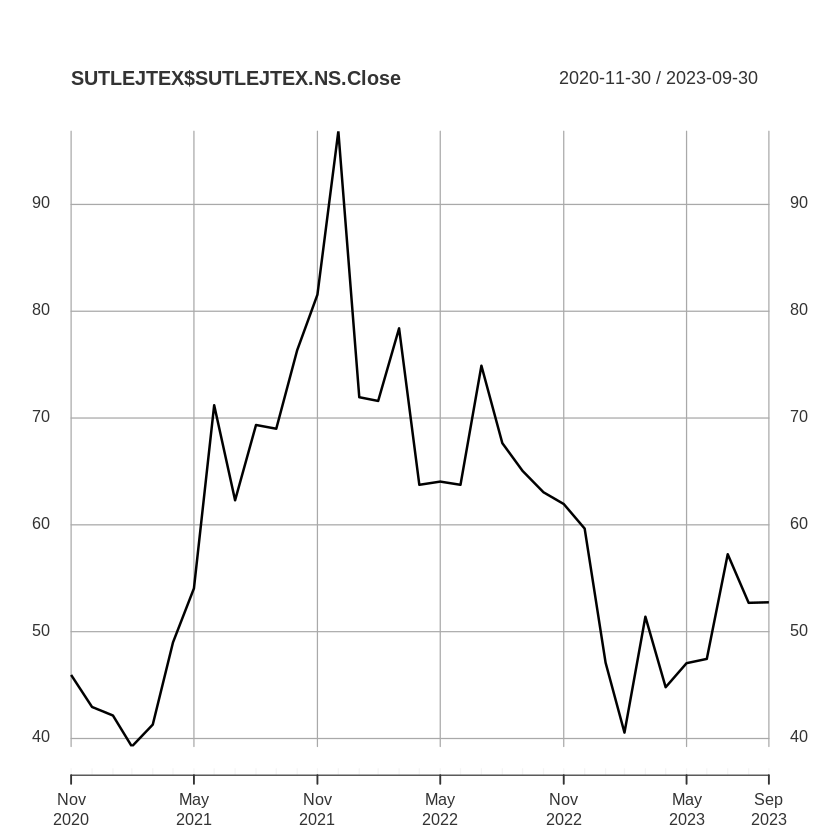

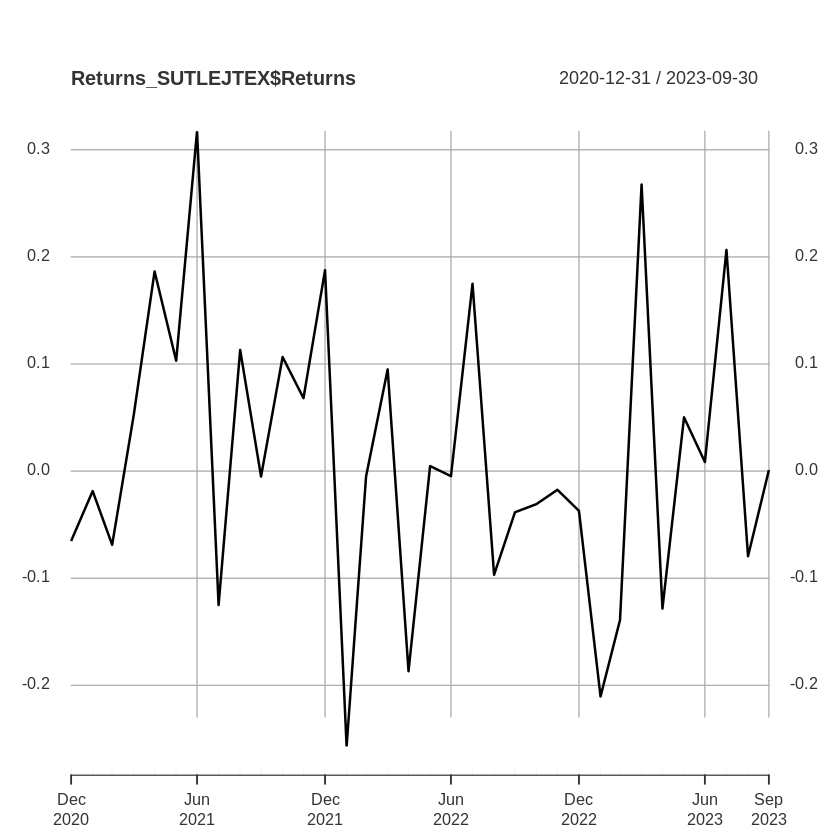

In [ ]:
library(tseries)
library(ggplot2)
SUTLEJTEX <- getSymbols.yahoo ("SUTLEJTEX.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "monthly")
head(SUTLEJTEX,5)

Returns_SUTLEJTEX <- as.xts(tail(data.frame(SUTLEJTEX$SUTLEJTEX.NS.Close), -1)/head(data.frame(SUTLEJTEX$SUTLEJTEX.NS.Close), -1) -1, frequency = 12)
colnames(Returns_SUTLEJTEX) <- "Returns"
head(Returns_SUTLEJTEX)

plot(SUTLEJTEX$SUTLEJTEX.NS.Close)
plot(Returns_SUTLEJTEX$Returns)


	Augmented Dickey-Fuller Test

data:  Returns_SUTLEJTEX$Returns
Dickey-Fuller = -2.7616, Lag order = 3, p-value = 0.2779
alternative hypothesis: stationary


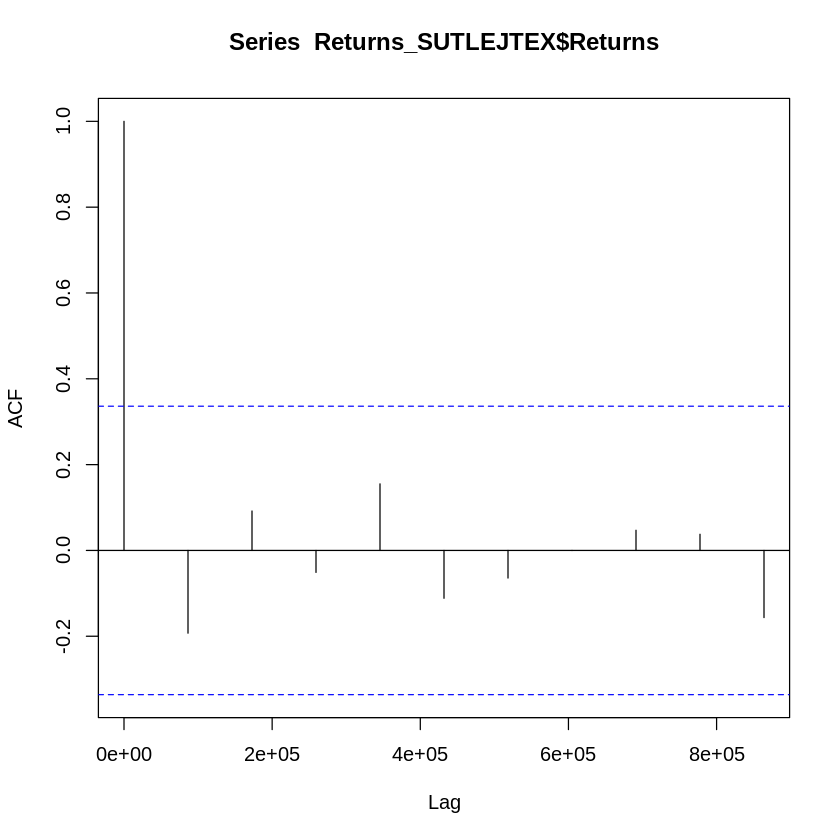

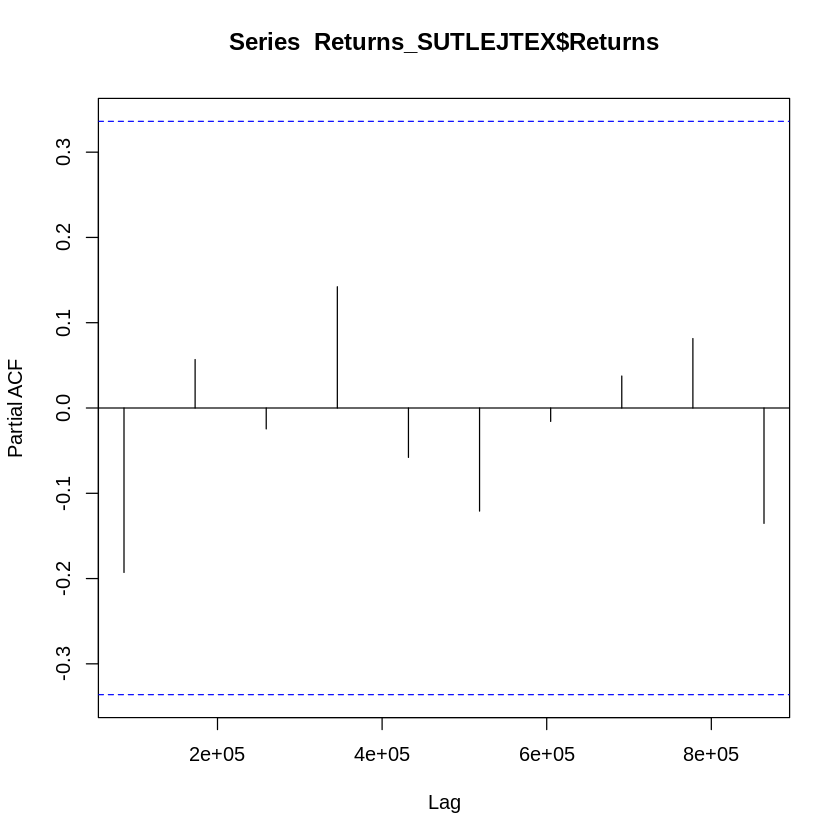

In [ ]:
adf.test(Returns_SUTLEJTEX$Returns, alternative = "stationary")

plot(acf(Returns_SUTLEJTEX$Returns, lag.max = 10))
plot(pacf(Returns_SUTLEJTEX$Returns, lag.max = 10))


Call:
arima(x = Returns_SUTLEJTEX$Returns, order = c(0, 0, 0))

Coefficients:
      intercept
         0.0126
s.e.     0.0226

sigma^2 estimated as 0.01735:  log likelihood = 20.68,  aic = -37.36

$pred
Time Series:
Start = 2937601 
End = 3715201 
Frequency = 1.15740740740741e-05 
 [1] 0.01260686 0.01260686 0.01260686 0.01260686 0.01260686 0.01260686
 [7] 0.01260686 0.01260686 0.01260686 0.01260686

$se
Time Series:
Start = 2937601 
End = 3715201 
Frequency = 1.15740740740741e-05 
 [1] 0.1317075 0.1317075 0.1317075 0.1317075 0.1317075 0.1317075 0.1317075
 [8] 0.1317075 0.1317075 0.1317075

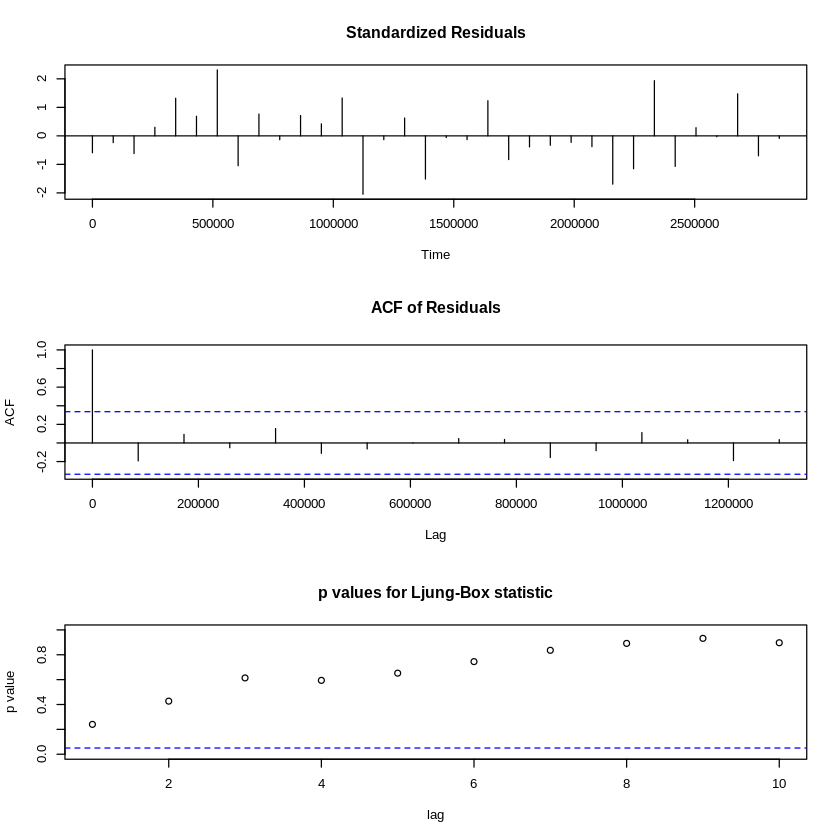

In [ ]:
arima_final <- arima(Returns_SUTLEJTEX$Returns, order = c(0,0,0))
arima_final

predicted <- predict(arima_final, n.ahead = 10)
predicted

tsdiag(arima_final)

### GARCH and EGARCH Model

In [ ]:
library(quantmod)

SUTLEJTEX <- getSymbols.yahoo("SUTLEJTEX.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity="monthly")
head(SUTLEJTEX)

rSUTLEJTEX <- dailyReturn(SUTLEJTEX)
head(rSUTLEJTEX)

           SUTLEJTEX.NS.Open SUTLEJTEX.NS.High SUTLEJTEX.NS.Low
2020-11-30             28.65              51.8            28.60
2020-12-31             46.70              52.0            41.40
2021-01-31             42.55              46.7            38.50
2021-02-28             42.80              46.5            39.05
2021-03-31             39.85              43.0            36.75
2021-04-30             42.60              53.0            42.05
           SUTLEJTEX.NS.Close SUTLEJTEX.NS.Volume SUTLEJTEX.NS.Adjusted
2020-11-30              45.95            18613460              43.65490
2020-12-31              42.95             4520294              40.80474
2021-01-31              42.15             3346231              40.04470
2021-02-28              39.25             2291210              37.28954
2021-03-31              41.30             1514098              39.23715
2021-04-30              49.00             9015673              46.55255

           daily.returns
2020-11-30    0.60383949
2020-12-31   -0.06528836
2021-01-31   -0.01862629
2021-02-28   -0.06880193
2021-03-31    0.05222928
2021-04-30    0.18644070

In [ ]:
library(rugarch)

ug_spec = ugarchspec()
ug_spec

eg_spec = ugarchspec(variance.model = list(model="eGARCH"))
eg_spec

ugfit = ugarchfit(spec = ug_spec, data = rSUTLEJTEX)
ugfit

ugforecast = ugarchforecast(ugfit, n.ahead=10)
ugforecast


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: eGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 


Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
“
ugarchfit-->waring: using less than 100 data
 points for estimation
”



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.019032    0.023315  0.81629  0.41434
ar1    -0.185829    1.580214 -0.11760  0.90639
ma1    -0.003303    1.643134 -0.00201  0.99840
omega   0.001804    0.003805  0.47427  0.63531
alpha1  0.000000    0.046421  0.00000  1.00000
beta1   0.883515    0.088146 10.02332  0.00000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.019032    0.029614  0.642677 0.520433
ar1    -0.185829    2.172190 -0.085549 0.931825
ma1    -0.003303    2.330833 -0.001417 0.998869
omega   0.001804    0.007137  0.252830 0.800400
alpha1  0.000000    0.046227  0.000000 1.000000
beta1   0.883515    0.377167  2.342506 0.019155




*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 10
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2023-09-30]:
      Series  Sigma
T+1  0.02251 0.1250
T+2  0.01839 0.1249
T+3  0.01915 0.1249
T+4  0.01901 0.1248
T+5  0.01904 0.1248
T+6  0.01903 0.1248
T+7  0.01903 0.1247
T+8  0.01903 0.1247
T+9  0.01903 0.1247
T+10 0.01903 0.1246



# TIMESGTY

## Daily Returns

### CAPM Model

In [ ]:
require (quantmod) #includes necessary packages for analysis

#Getting the data of Nifty 50 and SBI Equity

NSE <- getSymbols.yahoo ("^NSEI", from ="2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE)
NSE

TIMESGTY <- getSymbols.yahoo ("TIMESGTY.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE)
TIMESGTY

head (NSE, 5)
tail (NSE, 5)

Warning message:
“^NSEI contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-02  11697.35  11725.65 11557.40   11669.15      568400      11669.15
2020-11-03  11734.45  11836.20 11723.30   11813.50      674300      11813.50
2020-11-04  11783.35  11929.65 11756.40   11908.50      667300      11908.50
2020-11-05  12062.40  12131.10 12027.60   12120.30      632500      12120.30
2020-11-06  12156.65  12280.40 12131.85   12263.55      576800      12263.55
2020-11-09  12399.40  12474.05 12367.35   12461.05      553400      12461.05
2020-11-10  12556.40  12643.90 12475.25   12631.10      847500      12631.10
2020-11-11  12680.60  12769.75 12571.10   12749.15      880500      12749.15
2020-11-12  12702.15  12741.15 12624.85   12690.80      622000      12690.80
2020-11-13  12659.70  12735.95 12607.70   12719.95      513900      12719.95
       ...                                                                  
2023-10-11  19767.00  19839.20 19756.95   19811.35      213700      19811.35

Warning message:
“TIMESGTY.NS contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


           TIMESGTY.NS.Open TIMESGTY.NS.High TIMESGTY.NS.Low TIMESGTY.NS.Close
2020-11-02            23.55            23.55           21.50             21.70
2020-11-03            21.55            23.50           21.55             23.05
2020-11-04            22.45            22.75           21.90             22.05
2020-11-05            23.40            23.40           22.15             22.15
2020-11-06            22.15            22.60           22.15             22.35
2020-11-09            21.40            22.45           21.00             21.80
2020-11-10            22.70            22.70           21.60             21.80
2020-11-11            21.75            22.65           21.10             21.65
2020-11-12            21.60            22.45           20.90             21.05
2020-11-13            21.90            22.85           21.00             22.10
       ...                                                                    
2023-10-11            70.05            73.95        

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-02  11697.35  11725.65 11557.40   11669.15      568400      11669.15
2020-11-03  11734.45  11836.20 11723.30   11813.50      674300      11813.50
2020-11-04  11783.35  11929.65 11756.40   11908.50      667300      11908.50
2020-11-05  12062.40  12131.10 12027.60   12120.30      632500      12120.30
2020-11-06  12156.65  12280.40 12131.85   12263.55      576800      12263.55

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2023-10-18  19820.45  19840.95 19659.95   19671.10      198900      19671.10
2023-10-19  19545.20  19681.80 19512.35   19624.70      230300      19624.70
2023-10-20  19542.15  19593.80 19518.70   19542.65      198300      19542.65
2023-10-23  19521.60  19556.85 19257.85   19281.75      176000      19281.75
2023-10-25  19286.45  19347.30 19074.15   19122.15      225300      19122.15

In [ ]:
close <- cbind(NSE$NSEI.Close, TIMESGTY$TIMESGTY.NS.Close)
head(close, 5)

Returns <- as.xts(tail(data.frame(close),-1)/head(data.frame(close),-1)-1)
head(Returns, 5)

           NSEI.Close TIMESGTY.NS.Close
2020-11-02   11669.15             21.70
2020-11-03   11813.50             23.05
2020-11-04   11908.50             22.05
2020-11-05   12120.30             22.15
2020-11-06   12263.55             22.35

            NSEI.Close TIMESGTY.NS.Close
2020-11-03 0.012370190       0.062211909
2020-11-04 0.008041647      -0.043383949
2020-11-05 0.017785599       0.004535165
2020-11-06 0.011819015       0.009029380
2020-11-09 0.016104636      -0.024608552

In [ ]:
regression <- lm(TIMESGTY.NS.Close ~ NSEI.Close, data.frame(Returns[]))
summary(regression)


Call:
lm(formula = TIMESGTY.NS.Close ~ NSEI.Close, data = data.frame(Returns[]))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.107988 -0.022536 -0.004663  0.015990  0.210531 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.001789   0.001525   1.173    0.241    
NSEI.Close  0.713656   0.162566   4.390  1.3e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04122 on 732 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.02565,	Adjusted R-squared:  0.02432 
F-statistic: 19.27 on 1 and 732 DF,  p-value: 1.301e-05


#### Beta for TIMESGTY=0.7136 based on daily returns

### ARIMA Model

Warning message:
“TIMESGTY.NS contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


           TIMESGTY.NS.Open TIMESGTY.NS.High TIMESGTY.NS.Low TIMESGTY.NS.Close
2020-11-02            23.55            23.55           21.50             21.70
2020-11-03            21.55            23.50           21.55             23.05
2020-11-04            22.45            22.75           21.90             22.05
2020-11-05            23.40            23.40           22.15             22.15
2020-11-06            22.15            22.60           22.15             22.35
           TIMESGTY.NS.Volume TIMESGTY.NS.Adjusted
2020-11-02                534                21.70
2020-11-03               2469                23.05
2020-11-04               2840                22.05
2020-11-05                230                22.15
2020-11-06                389                22.35

                Returns
2020-11-03  0.062211909
2020-11-04 -0.043383949
2020-11-05  0.004535165
2020-11-06  0.009029380
2020-11-09 -0.024608552
2020-11-10  0.000000000

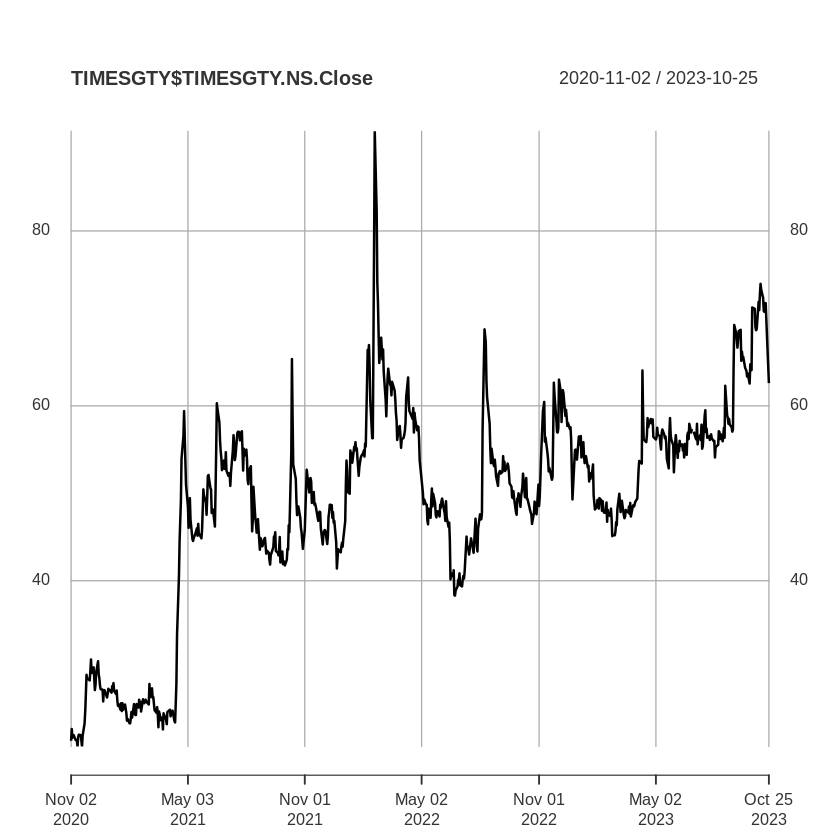

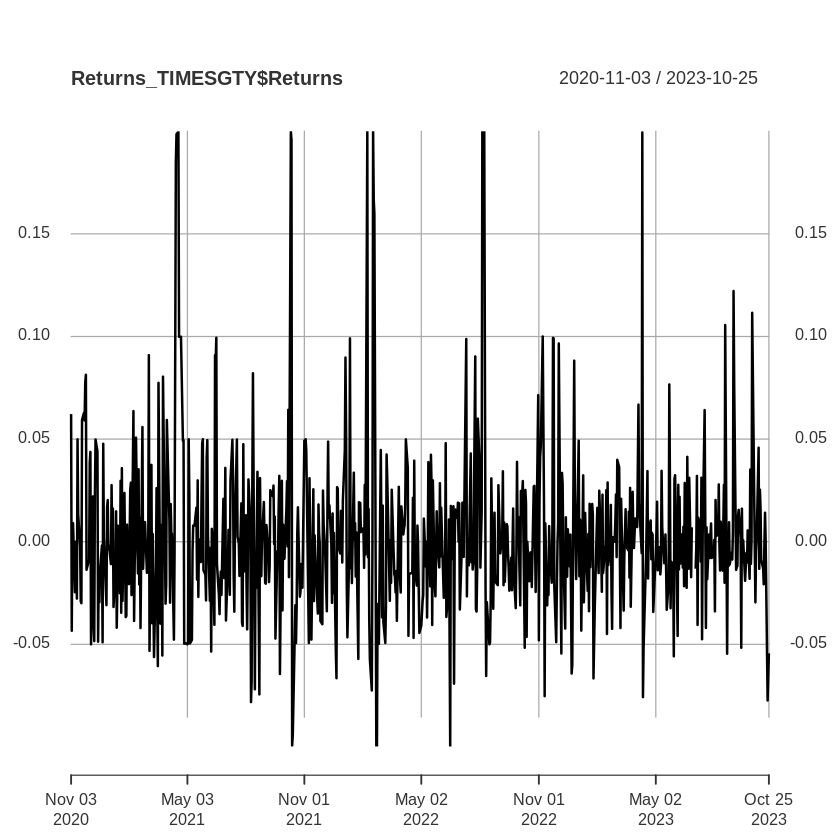

In [ ]:
library(tseries)
library(ggplot2)

TIMESGTY <- getSymbols.yahoo ("TIMESGTY.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE)
head(TIMESGTY,5)

Returns_TIMESGTY <- as.xts(tail(data.frame(TIMESGTY$TIMESGTY.NS.Close), -1)/head(data.frame(TIMESGTY$TIMESGTY.NS.Close), -1) -1, frequency = 365)
colnames(Returns_TIMESGTY) <- "Returns"
head(Returns_TIMESGTY)

plot(TIMESGTY$TIMESGTY.NS.Close)
plot(Returns_TIMESGTY$Returns)

In [ ]:
Returns[is.na(Returns)] <- 0
Returns
Returns_TIMESGTY[is.na(Returns_TIMESGTY)] <- 0

ERROR: ignored

Warning message in adf.test(Returns_TIMESGTY$Returns, alternative = "stationary"):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Returns_TIMESGTY$Returns
Dickey-Fuller = -8.9848, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


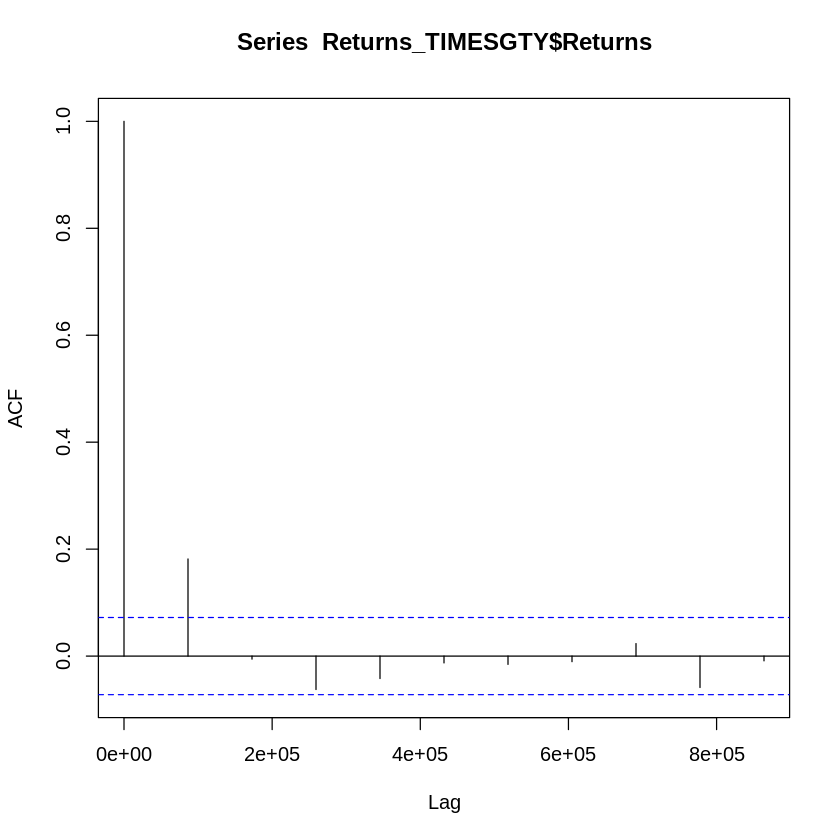

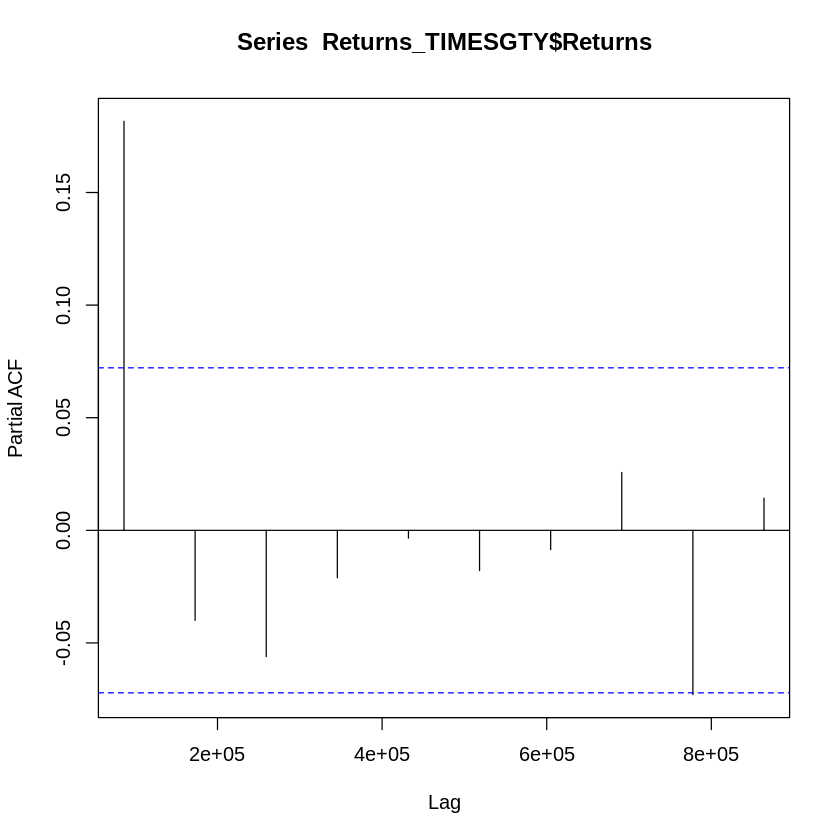

In [ ]:
adf.test(Returns_TIMESGTY$Returns, alternative = "stationary")

plot(acf(Returns_TIMESGTY$Returns, lag.max = 10))
plot(pacf(Returns_TIMESGTY$Returns, lag.max = 10))

In [ ]:
arima_final <- arima(Returns_TIMESGTY$Returns, order = c(0,0,1))
arima_final

predicted <- predict(arima_final, n.ahead = 10)
predicted

tsdiag(arima_final)

ERROR: ignored

### GARCH and EGARCH Model

In [ ]:
library(quantmod)

TIMESGTY <- getSymbols.yahoo("TIMESGTY.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE)
head(TIMESGTY)

rTIMESGTY <- dailyReturn(TIMESGTY)
head(rTIMESGTY)

Warning message:
“TIMESGTY.NS contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


           TIMESGTY.NS.Open TIMESGTY.NS.High TIMESGTY.NS.Low TIMESGTY.NS.Close
2020-11-02            23.55            23.55           21.50             21.70
2020-11-03            21.55            23.50           21.55             23.05
2020-11-04            22.45            22.75           21.90             22.05
2020-11-05            23.40            23.40           22.15             22.15
2020-11-06            22.15            22.60           22.15             22.35
2020-11-09            21.40            22.45           21.00             21.80
           TIMESGTY.NS.Volume TIMESGTY.NS.Adjusted
2020-11-02                534                21.70
2020-11-03               2469                23.05
2020-11-04               2840                22.05
2020-11-05                230                22.15
2020-11-06                389                22.35
2020-11-09                973                21.80

Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”


           daily.returns
2020-11-02  -0.078556201
2020-11-03   0.062211909
2020-11-04  -0.043383949
2020-11-05   0.004535165
2020-11-06   0.009029380
2020-11-09  -0.024608552

In [ ]:
library(rugarch)

ug_spec = ugarchspec()
ug_spec

eg_spec = ugarchspec(variance.model = list(model="eGARCH"))
eg_spec

ugfit = ugarchfit(spec = ug_spec, data = rTIMESGTY)
ugfit

ugforecast = ugarchforecast(ugfit, n.ahead=10)
ugforecast


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: eGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.001548    0.000498     3.1121 0.001858
ar1     0.964106    0.008184   117.8027 0.000000
ma1    -0.986554    0.000537 -1838.5805 0.000000
omega   0.000732    0.000146     5.0203 0.000001
alpha1  0.205862    0.037833     5.4414 0.000000
beta1   0.322973    0.108954     2.9643 0.003034

Robust Standard Errors:
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.001548    0.000489     3.1684 0.001533
ar1     0.964106    0.008505   113.3517 0.000000
ma1    -0.986554    0.000500 -1971.2750 0.000000
omega   0.000732    0.000185     3.9499 0.000078
alpha1  0.205862    0.029222     7.0447 0.000000
beta1   0.322973    0.125061 


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 10
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2023-10-25]:
       Series   Sigma
T+1  0.002174 0.04584
T+2  0.002151 0.04294
T+3  0.002129 0.04132
T+4  0.002109 0.04044
T+5  0.002088 0.03997
T+6  0.002069 0.03971
T+7  0.002050 0.03958
T+8  0.002032 0.03951
T+9  0.002015 0.03947
T+10 0.001998 0.03945



## Weekly Returns

### CAPM Model

In [ ]:
NSE <- getSymbols.yahoo ("^NSEI", from ="2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "weekly")
NSE

TIMESGTY <- getSymbols.yahoo ("TIMESGTY.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "weekly")
TIMESGTY

head (NSE, 5)
tail (NSE, 5)

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-01  11697.35  12280.40 11557.40   12263.55     3119300      12263.55
2020-11-08  12399.40  12769.75 12367.35   12719.95     3417300      12719.95
2020-11-15  12932.50  12963.00 12730.25   12859.05     2871800      12859.05
2020-11-22  12960.30  13145.85 12790.40   12968.95     3596200      12968.95
2020-11-29  13062.20  13280.05 12962.80   13258.55     2655500      13258.55
2020-12-06  13264.85  13579.35 13241.95   13513.85     2978600      13513.85
2020-12-13  13571.45  13773.25 13447.05   13760.55     2453600      13760.55
2020-12-20  13741.90  13777.50 13131.45   13749.25     2313600      13749.25
2020-12-27  13815.15  14049.85 13811.55   14018.50     2034400      14018.50
2021-01-03  14104.35  14367.30 13953.75   14347.25     2792500      14347.25
       ...                                                                  
2023-08-20  19320.65  19584.45 19229.70   19265.80     1431300      19265.80

           TIMESGTY.NS.Open TIMESGTY.NS.High TIMESGTY.NS.Low TIMESGTY.NS.Close
2020-11-01            23.55            23.55           21.50             22.35
2020-11-08            21.40            24.10           20.40             22.40
2020-11-15            22.10            23.15           21.00             22.30
2020-11-22            23.90            30.30           21.20             28.85
2020-11-29            28.85            32.30           27.30             29.45
2020-12-06            30.40            30.50           26.15             29.50
2020-12-13            30.30            30.90           27.35             27.60
2020-12-20            27.00            28.50           26.20             27.50
2020-12-27            27.90            28.35           26.50             27.50
2021-01-03            28.25            29.10           27.00             27.40
       ...                                                                    
2023-08-20            67.00            67.00        

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-01  11697.35  12280.40 11557.40   12263.55     3119300      12263.55
2020-11-08  12399.40  12769.75 12367.35   12719.95     3417300      12719.95
2020-11-15  12932.50  12963.00 12730.25   12859.05     2871800      12859.05
2020-11-22  12960.30  13145.85 12790.40   12968.95     3596200      12968.95
2020-11-29  13062.20  13280.05 12962.80   13258.55     2655500      13258.55

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2023-09-24  19678.20  19766.65 19492.10   19638.30     1193200      19638.30
2023-10-01  19622.40  19675.75 19333.60   19653.50      892800      19653.50
2023-10-08  19539.45  19843.30 19480.50   19751.05     1068300      19751.05
2023-10-15  19737.25  19849.75 19512.35   19542.65      994300      19542.65
2023-10-22  19521.60  19556.85 18837.85   18857.25      701700      18857.25

In [ ]:
close <- cbind(NSE$NSEI.Close, TIMESGTY$TIMESGTY.NS.Close)
head(close, 5)

Returns <- as.xts(tail(data.frame(close),-1)/head(data.frame(close),-1)-1)
head(Returns, 5)

           NSEI.Close TIMESGTY.NS.Close
2020-11-01   12263.55             22.35
2020-11-08   12719.95             22.40
2020-11-15   12859.05             22.30
2020-11-22   12968.95             28.85
2020-11-29   13258.55             29.45

            NSEI.Close TIMESGTY.NS.Close
2020-11-08 0.037216010       0.002237102
2020-11-15 0.010935547      -0.004464303
2020-11-22 0.008546541       0.293722034
2020-11-29 0.022330228       0.020797240
2020-12-06 0.019255485       0.001697767

In [ ]:
regression <- lm(TIMESGTY.NS.Close ~ NSEI.Close, data.frame(Returns[]))
summary(regression)


Call:
lm(formula = TIMESGTY.NS.Close ~ NSEI.Close, data = data.frame(Returns[]))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27467 -0.04658 -0.01609  0.01890  0.59951 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 0.010000   0.008018   1.247   0.2142  
NSEI.Close  0.706328   0.386431   1.828   0.0695 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09878 on 153 degrees of freedom
Multiple R-squared:  0.02137,	Adjusted R-squared:  0.01497 
F-statistic: 3.341 on 1 and 153 DF,  p-value: 0.06952


#### Beta for TIMESGTY=0.706 based on weekly returns

### ARIMA Model

           TIMESGTY.NS.Open TIMESGTY.NS.High TIMESGTY.NS.Low TIMESGTY.NS.Close
2020-11-01            23.55            23.55            21.5             22.35
2020-11-08            21.40            24.10            20.4             22.40
2020-11-15            22.10            23.15            21.0             22.30
2020-11-22            23.90            30.30            21.2             28.85
2020-11-29            28.85            32.30            27.3             29.45
           TIMESGTY.NS.Volume TIMESGTY.NS.Adjusted
2020-11-01               6462                22.35
2020-11-08              27142                22.40
2020-11-15              29370                22.30
2020-11-22             166772                28.85
2020-11-29              22600                29.45

                Returns
2020-11-08  0.002237102
2020-11-15 -0.004464303
2020-11-22  0.293722034
2020-11-29  0.020797240
2020-12-06  0.001697767
2020-12-13 -0.064406767

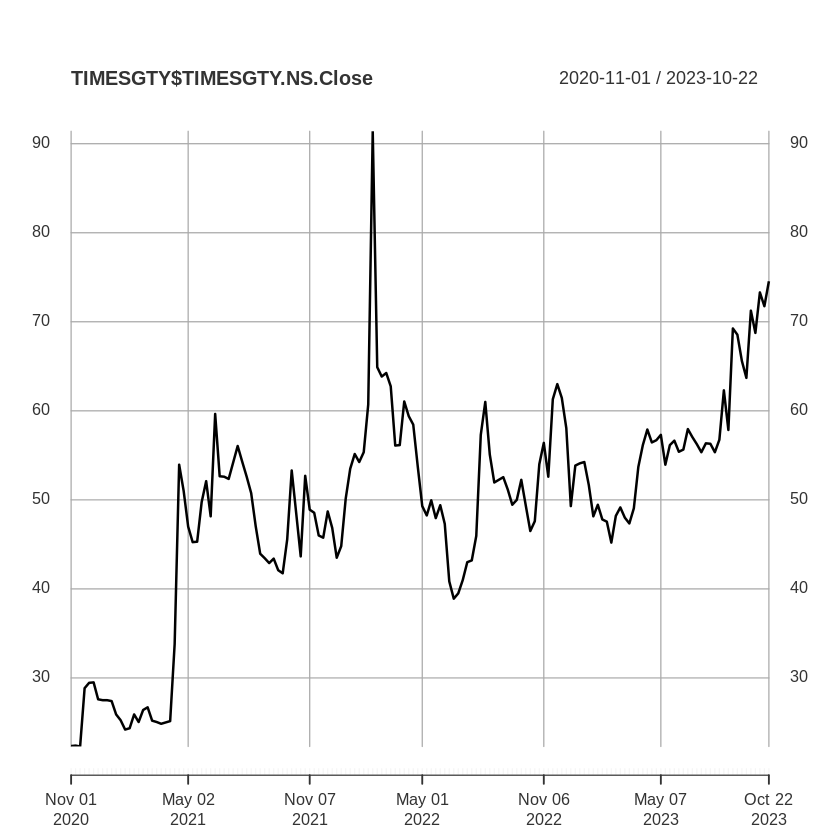

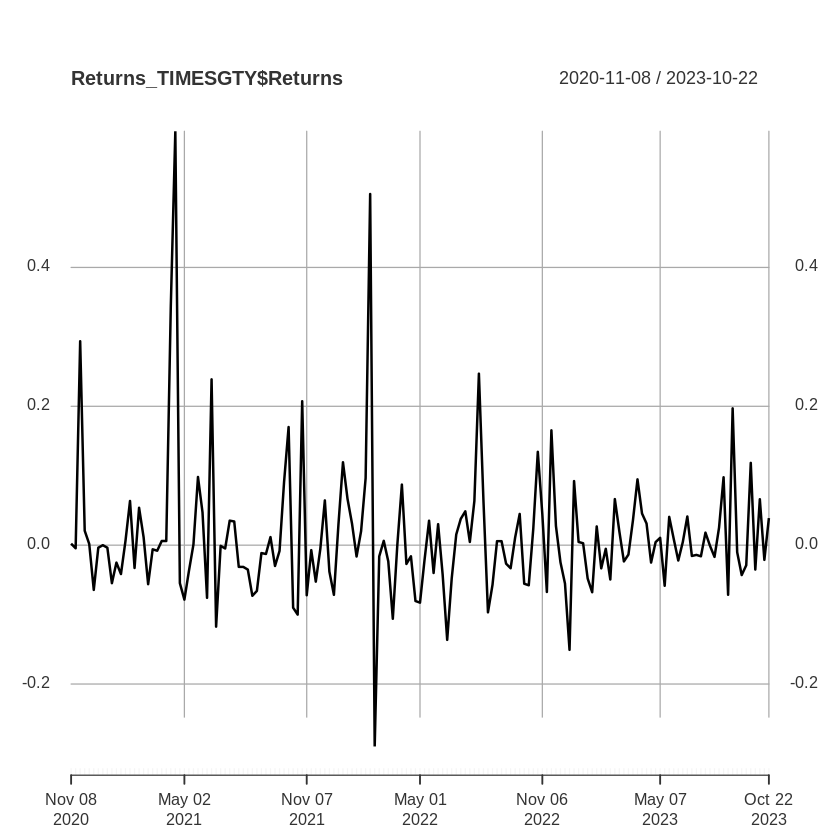

In [ ]:
library(tseries)
library(ggplot2)
TIMESGTY <- getSymbols.yahoo ("TIMESGTY.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "weekly")
head(TIMESGTY,5)

Returns_TIMESGTY <- as.xts(tail(data.frame(TIMESGTY$TIMESGTY.NS.Close), -1)/head(data.frame(TIMESGTY$TIMESGTY.NS.Close), -1) -1, frequency = 52)
colnames(Returns_TIMESGTY) <- "Returns"
head(Returns_TIMESGTY)

plot(TIMESGTY$TIMESGTY.NS.Close)
plot(Returns_TIMESGTY$Returns)

Warning message in adf.test(Returns_TIMESGTY$Returns, alternative = "stationary"):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Returns_TIMESGTY$Returns
Dickey-Fuller = -5.302, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


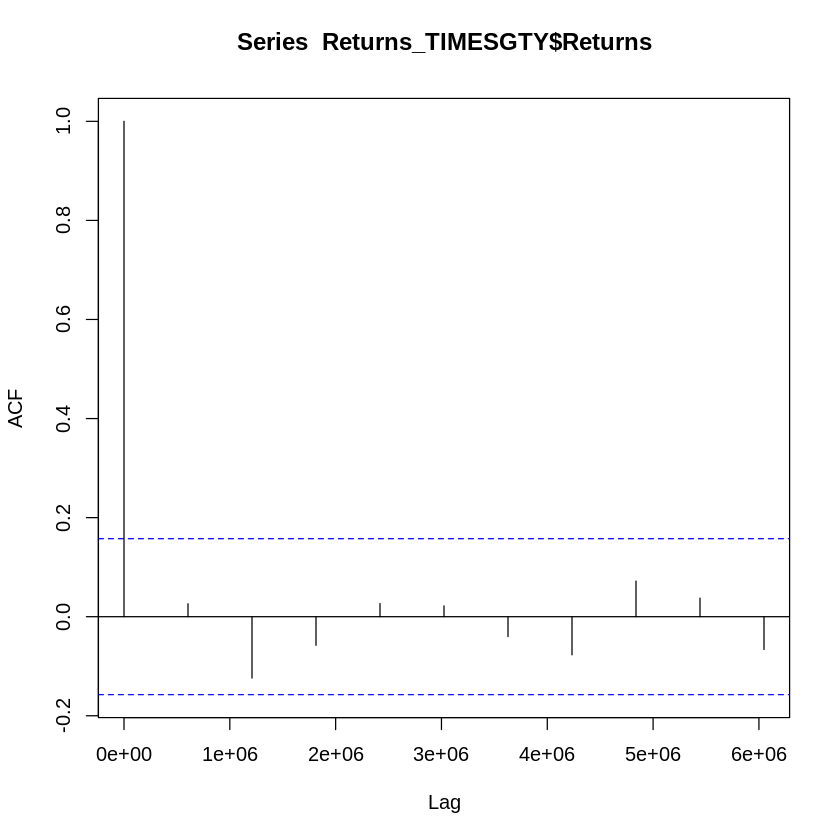

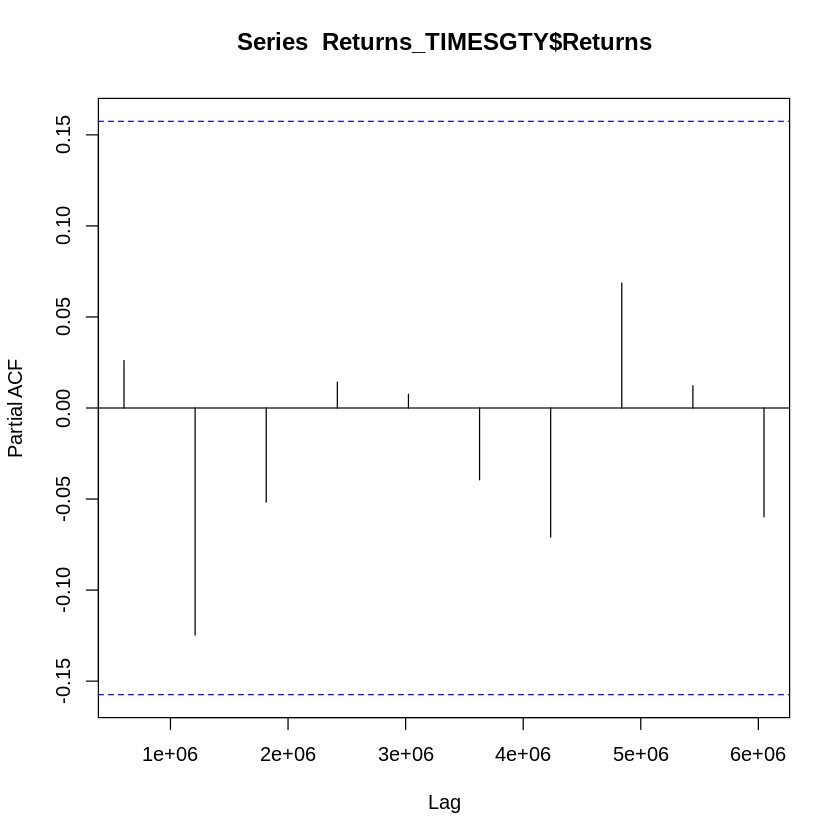

In [ ]:
adf.test(Returns_TIMESGTY$Returns, alternative = "stationary")

plot(acf(Returns_TIMESGTY$Returns, lag.max = 10))
plot(pacf(Returns_TIMESGTY$Returns, lag.max = 10))


Call:
arima(x = Returns_TIMESGTY$Returns, order = c(0, 0, 0))

Coefficients:
      intercept
         0.0121
s.e.     0.0080

sigma^2 estimated as 0.009842:  log likelihood = 138.2,  aic = -272.4

$pred
Time Series:
Start = c(93744001, 1) 
End = c(99187201, 1) 
Frequency = 1.65343915343915e-06 
 [1] 0.01211188 0.01211188 0.01211188 0.01211188 0.01211188 0.01211188
 [7] 0.01211188 0.01211188 0.01211188 0.01211188

$se
Time Series:
Start = c(93744001, 1) 
End = c(99187201, 1) 
Frequency = 1.65343915343915e-06 
 [1] 0.09920564 0.09920564 0.09920564 0.09920564 0.09920564 0.09920564
 [7] 0.09920564 0.09920564 0.09920564 0.09920564

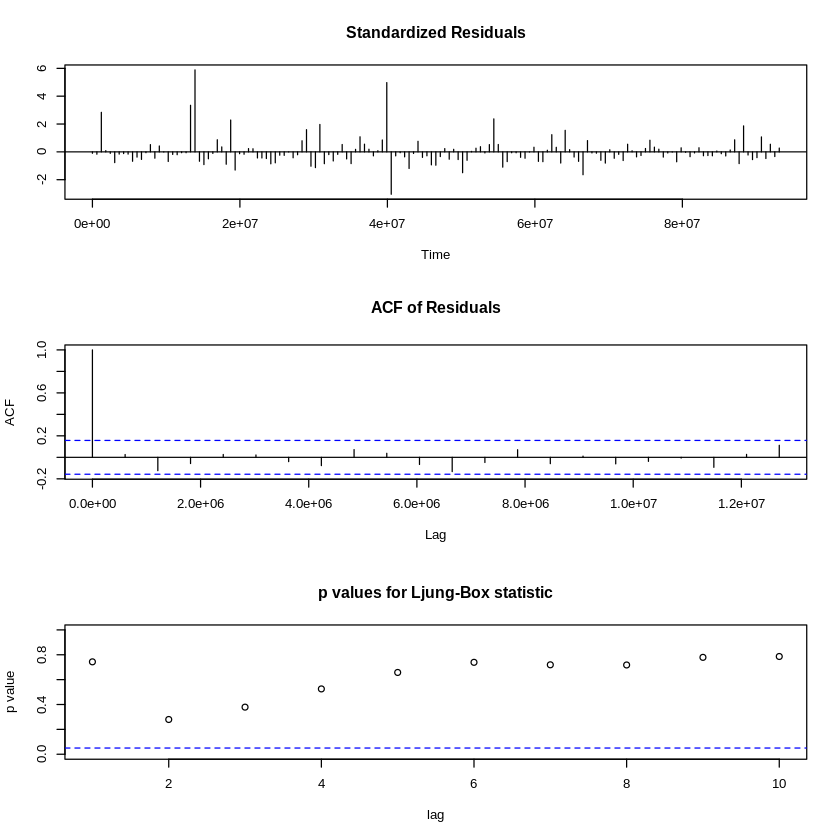

In [ ]:
arima_final <- arima(Returns_TIMESGTY$Returns, order = c(0,0,0))
arima_final

predicted <- predict(arima_final, n.ahead = 10)
predicted

tsdiag(arima_final)

### GARCH and EGARCH Model

In [ ]:
library(quantmod)

TIMESGTY <- getSymbols.yahoo("TIMESGTY.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity="weekly")
head(TIMESGTY)

rTIMESGTY <- dailyReturn(TIMESGTY)
head(rTIMESGTY)

           TIMESGTY.NS.Open TIMESGTY.NS.High TIMESGTY.NS.Low TIMESGTY.NS.Close
2020-11-01            23.55            23.55           21.50             22.35
2020-11-08            21.40            24.10           20.40             22.40
2020-11-15            22.10            23.15           21.00             22.30
2020-11-22            23.90            30.30           21.20             28.85
2020-11-29            28.85            32.30           27.30             29.45
2020-12-06            30.40            30.50           26.15             29.50
           TIMESGTY.NS.Volume TIMESGTY.NS.Adjusted
2020-11-01               6462                22.35
2020-11-08              27142                22.40
2020-11-15              29370                22.30
2020-11-22             166772                28.85
2020-11-29              22600                29.45
2020-12-06              40090                29.50

           daily.returns
2020-11-01  -0.050955367
2020-11-08   0.002237102
2020-11-15  -0.004464303
2020-11-22   0.293722034
2020-11-29   0.020797240
2020-12-06   0.001697767

In [ ]:
library(rugarch)

ug_spec = ugarchspec()
ug_spec

eg_spec = ugarchspec(variance.model = list(model="eGARCH"))
eg_spec

ugfit = ugarchfit(spec = ug_spec, data = rTIMESGTY)
ugfit

ugforecast = ugarchforecast(ugfit, n.ahead=10)
ugforecast


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: eGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error     t value Pr(>|t|)
mu      0.010846    0.007674    1.413401  0.15754
ar1    -0.470727    0.707087   -0.665727  0.50559
ma1     0.503363    0.691105    0.728345  0.46640
omega   0.000000    0.000014    0.000000  1.00000
alpha1  0.000001    0.000047    0.019459  0.98447
beta1   0.996116    0.000105 9511.126305  0.00000

Robust Standard Errors:
        Estimate  Std. Error     t value Pr(>|t|)
mu      0.010846    0.008219    1.319636 0.186957
ar1    -0.470727    0.379930   -1.238982 0.215352
ma1     0.503363    0.281243    1.789780 0.073489
omega   0.000000    0.000017    0.000000 1.000000
alpha1  0.000001    0.000260    0.003549 0.997168
beta1   0.996116


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 10
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2023-10-22]:
      Series   Sigma
T+1  0.01322 0.07298
T+2  0.00973 0.07284
T+3  0.01137 0.07270
T+4  0.01060 0.07256
T+5  0.01096 0.07242
T+6  0.01079 0.07228
T+7  0.01087 0.07214
T+8  0.01083 0.07200
T+9  0.01085 0.07186
T+10 0.01084 0.07172



## Monthly Returns

### CAPM Model

In [ ]:
NSE <- getSymbols.yahoo ("^NSEI", from ="2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "monthly")
NSE

TIMESGTY <- getSymbols.yahoo ("TIMESGTY.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "monthly")
TIMESGTY

head (NSE, 5)
tail (NSE, 5)

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-30  13062.20  14024.85 12962.80   13981.75    12077600      13981.75
2020-12-31  13996.10  14753.55 13596.75   13634.60    13119900      13634.60
2021-01-31  13758.60  15431.75 13661.75   14529.15    14313900      14529.15
2021-02-28  14702.50  15336.30 14264.40   14690.70     9886800      14690.70
2021-03-31  14798.40  15044.35 14151.40   14631.10     9344700      14631.10
2021-04-30  14481.05  15606.35 14416.25   15582.80     9859900      15582.80
2021-05-31  15629.65  15915.65 15450.90   15721.50     8079100      15721.50
2021-06-30  15755.05  15962.25 15513.45   15763.05     5756800      15763.05
2021-07-31  15874.90  17153.50 15834.65   17132.20     6349900      17132.20
2021-08-31  17185.60  17947.65 17055.05   17618.15     6955600      17618.15
2021-09-30  17531.90  18604.45 17452.90   17671.65     7651200      17671.65
2021-10-31  17783.15  18210.15 16782.40   16983.20     5853100      16983.20

           TIMESGTY.NS.Open TIMESGTY.NS.High TIMESGTY.NS.Low TIMESGTY.NS.Close
2020-11-30            30.15            32.30           26.15             27.55
2020-12-31            27.55            29.10           23.95             24.20
2021-01-31            25.35            27.90           23.40             26.40
2021-02-28            26.50            29.85           22.55             23.60
2021-03-31            24.00            62.35           21.00             51.00
2021-04-30            48.45            52.95           42.80             48.95
2021-05-31            47.05            63.30           43.35             52.80
2021-06-30            53.00            59.65           49.70             54.30
2021-07-31            56.30            56.30           42.60             44.90
2021-08-31            45.95            47.85           41.05             42.10
2021-09-30            42.05            65.55           41.10             43.65
2021-10-31            45.50            53.75        

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-30   13062.2  14024.85 12962.80   13981.75    12077600      13981.75
2020-12-31   13996.1  14753.55 13596.75   13634.60    13119900      13634.60
2021-01-31   13758.6  15431.75 13661.75   14529.15    14313900      14529.15
2021-02-28   14702.5  15336.30 14264.40   14690.70     9886800      14690.70
2021-03-31   14798.4  15044.35 14151.40   14631.10     9344700      14631.10

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2023-05-31  18579.40  19201.70 18464.55   19189.05     5144400      19189.05
2023-06-30  19246.50  19991.85 19234.40   19753.80     5802500      19753.80
2023-07-31  19784.00  19795.60 19223.65   19253.80     6027500      19253.80
2023-08-31  19258.15  20222.45 19255.70   19638.30     5666500      19638.30
2023-09-30  19622.40  19849.75 18837.85   19079.60     4248400      19079.60

In [ ]:
close <- cbind(NSE$NSEI.Close, TIMESGTY$TIMESGTY.NS.Close)
head(close, 5)

Returns <- as.xts(tail(data.frame(close),-1)/head(data.frame(close),-1)-1)
head(Returns, 5)

           NSEI.Close TIMESGTY.NS.Close
2020-11-30   13981.75             27.55
2020-12-31   13634.60             24.20
2021-01-31   14529.15             26.40
2021-02-28   14690.70             23.60
2021-03-31   14631.10             51.00

             NSEI.Close TIMESGTY.NS.Close
2020-12-31 -0.024828823       -0.12159704
2021-01-31  0.065608878        0.09090904
2021-02-28  0.011119012       -0.10606058
2021-03-31 -0.004057028        1.16101691
2021-04-30  0.065046389       -0.04019606

In [ ]:
regression <- lm(TIMESGTY.NS.Close ~ NSEI.Close, data.frame(Returns[]))
summary(regression)


Call:
lm(formula = TIMESGTY.NS.Close ~ NSEI.Close, data = data.frame(Returns[]))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22928 -0.10518 -0.03656  0.05993  1.11538 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.04543    0.04054   1.121    0.271
NSEI.Close  -0.04993    1.06363  -0.047    0.963

Residual standard error: 0.2284 on 32 degrees of freedom
Multiple R-squared:  6.885e-05,	Adjusted R-squared:  -0.03118 
F-statistic: 0.002203 on 1 and 32 DF,  p-value: 0.9629


#### Beta for TIMESGTY=-0.0499 for monthly returns

### ARIMA Model

           TIMESGTY.NS.Open TIMESGTY.NS.High TIMESGTY.NS.Low TIMESGTY.NS.Close
2020-11-30            30.15            32.30           26.15             27.55
2020-12-31            27.55            29.10           23.95             24.20
2021-01-31            25.35            27.90           23.40             26.40
2021-02-28            26.50            29.85           22.55             23.60
2021-03-31            24.00            62.35           21.00             51.00
           TIMESGTY.NS.Volume TIMESGTY.NS.Adjusted
2020-11-30             100674                27.55
2020-12-31              61833                24.20
2021-01-31              47212                26.40
2021-02-28              88694                23.60
2021-03-31             627114                51.00

               Returns
2020-12-31 -0.12159704
2021-01-31  0.09090904
2021-02-28 -0.10606058
2021-03-31  1.16101691
2021-04-30 -0.04019606
2021-05-31  0.07865165

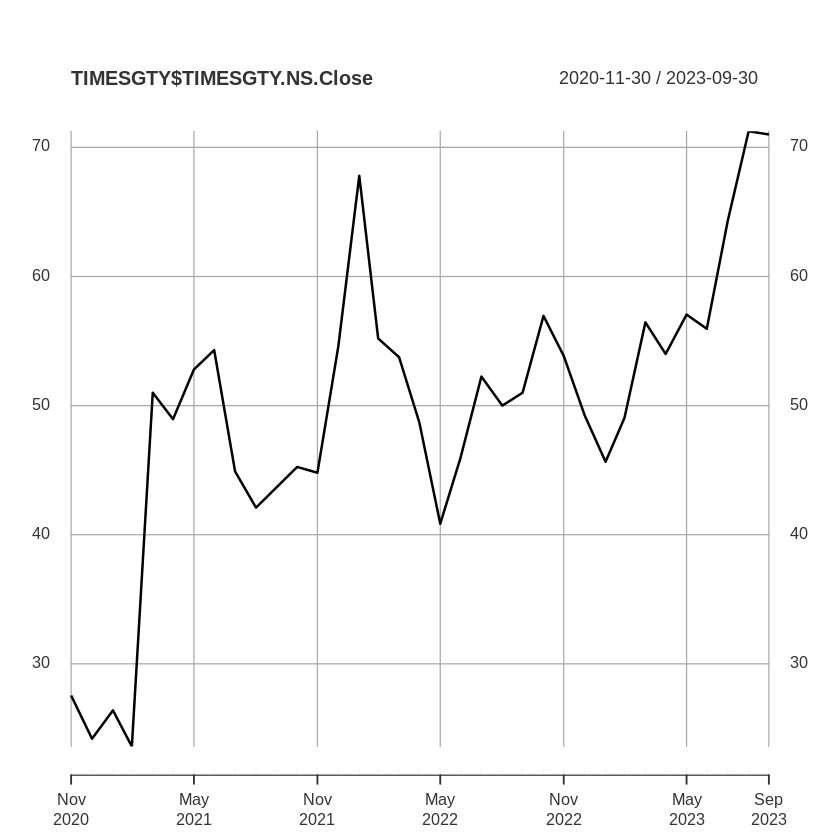

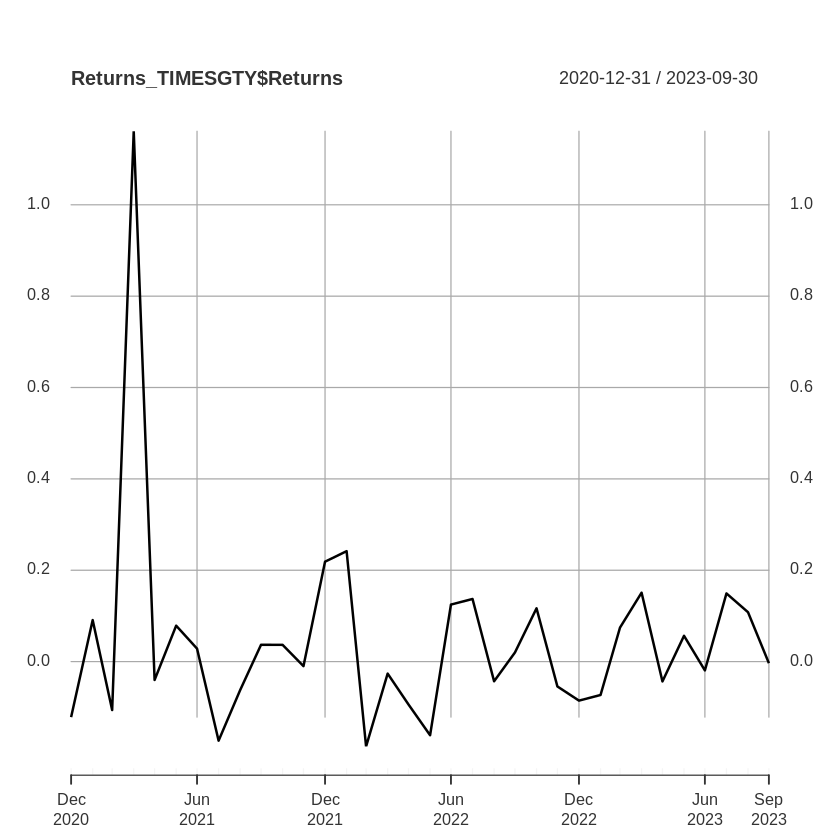

In [ ]:
library(tseries)
library(ggplot2)
TIMESGTY <- getSymbols.yahoo ("TIMESGTY.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "monthly")
head(TIMESGTY,5)

Returns_TIMESGTY <- as.xts(tail(data.frame(TIMESGTY$TIMESGTY.NS.Close), -1)/head(data.frame(TIMESGTY$TIMESGTY.NS.Close), -1) -1, frequency = 12)
colnames(Returns_TIMESGTY) <- "Returns"
head(Returns_TIMESGTY)

plot(TIMESGTY$TIMESGTY.NS.Close)
plot(Returns_TIMESGTY$Returns)

Warning message in adf.test(Returns_TIMESGTY$Returns, alternative = "stationary"):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Returns_TIMESGTY$Returns
Dickey-Fuller = -5.6373, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


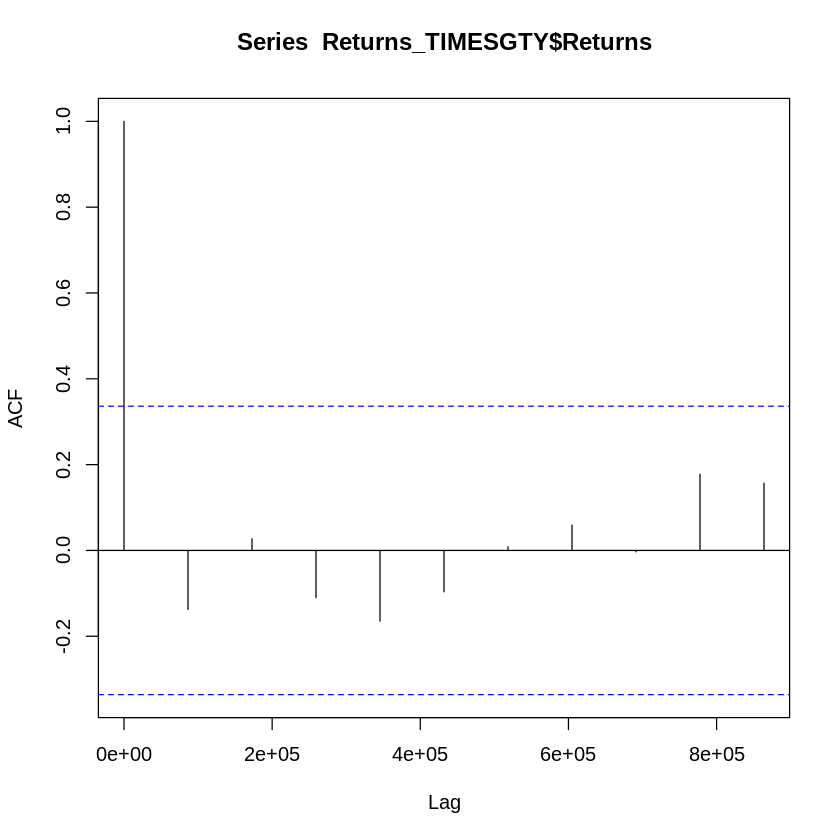

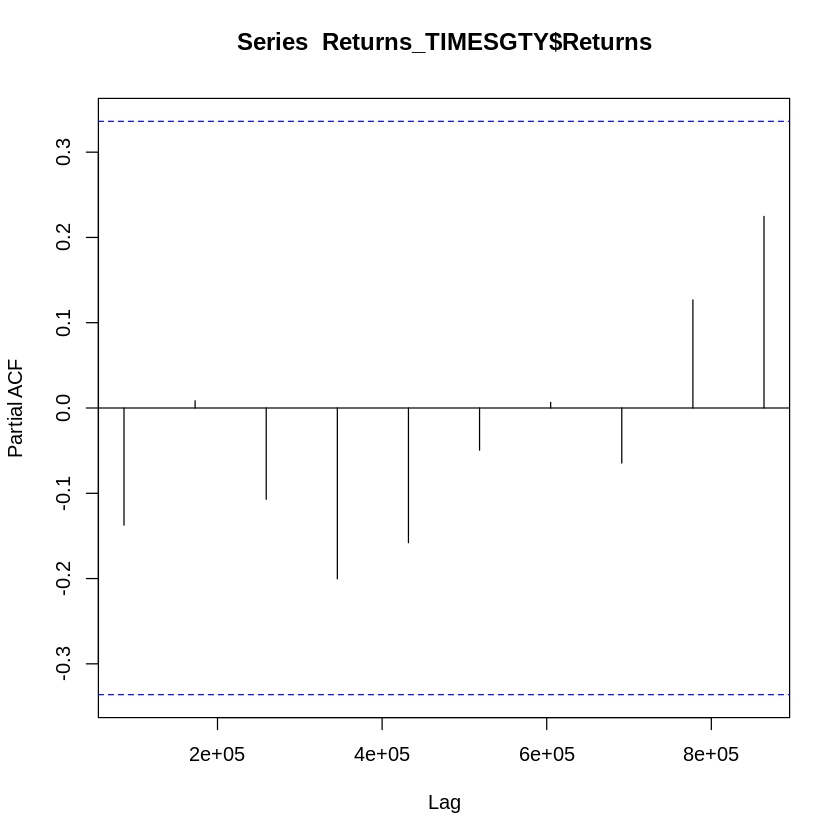

In [ ]:
adf.test(Returns_TIMESGTY$Returns, alternative = "stationary")

plot(acf(Returns_TIMESGTY$Returns, lag.max = 10))
plot(pacf(Returns_TIMESGTY$Returns, lag.max = 10))

$pred
Time Series:
Start = 2937601 
End = 3715201 
Frequency = 1.15740740740741e-05 
 [1] 0.04494149 0.04494149 0.04494149 0.04494149 0.04494149 0.04494149
 [7] 0.04494149 0.04494149 0.04494149 0.04494149

$se
Time Series:
Start = 2937601 
End = 3715201 
Frequency = 1.15740740740741e-05 
 [1] 0.2215428 0.2215428 0.2215428 0.2215428 0.2215428 0.2215428 0.2215428
 [8] 0.2215428 0.2215428 0.2215428

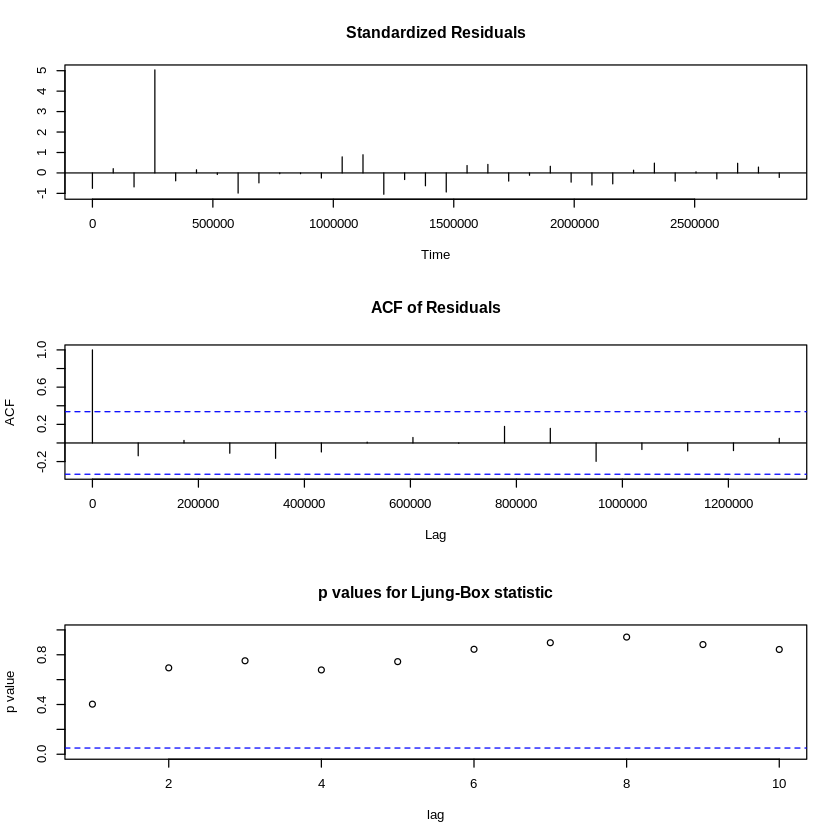

In [ ]:
arima_final <- arima(Returns_TIMESGTY$Returns, order = c(0,0,0))
arima_final

predicted <- predict(arima_final, n.ahead = 10)
predicted

tsdiag(arima_final)

### GARCH and EGARCH Model

In [ ]:
library(quantmod)

TIMESGTY <- getSymbols.yahoo("TIMESGTY.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity="monthly")
head(TIMESGTY)

rTIMESGTY <- dailyReturn(TIMESGTY)
head(rTIMESGTY)

           TIMESGTY.NS.Open TIMESGTY.NS.High TIMESGTY.NS.Low TIMESGTY.NS.Close
2020-11-30            30.15            32.30           26.15             27.55
2020-12-31            27.55            29.10           23.95             24.20
2021-01-31            25.35            27.90           23.40             26.40
2021-02-28            26.50            29.85           22.55             23.60
2021-03-31            24.00            62.35           21.00             51.00
2021-04-30            48.45            52.95           42.80             48.95
           TIMESGTY.NS.Volume TIMESGTY.NS.Adjusted
2020-11-30             100674                27.55
2020-12-31              61833                24.20
2021-01-31              47212                26.40
2021-02-28              88694                23.60
2021-03-31             627114                51.00
2021-04-30             311705                48.95

           daily.returns
2020-11-30   -0.08623550
2020-12-31   -0.12159704
2021-01-31    0.09090904
2021-02-28   -0.10606058
2021-03-31    1.16101691
2021-04-30   -0.04019606

In [ ]:
library(rugarch)

ug_spec = ugarchspec()
ug_spec

eg_spec = ugarchspec(variance.model = list(model="eGARCH"))
eg_spec

ugfit = ugarchfit(spec = ug_spec, data = rTIMESGTY)
ugfit

ugforecast = ugarchforecast(ugfit, n.ahead=10)
ugforecast


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: eGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 


Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
“
ugarchfit-->waring: using less than 100 data
 points for estimation
”



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.041585    0.022429  1.854072 0.063729
ar1     0.798232    0.090401  8.829912 0.000000
ma1    -0.999997    0.129595 -7.716307 0.000000
omega   0.000000    0.000067  0.000000 1.000000
alpha1  0.000000    0.022418  0.000013 0.999990
beta1   0.939610    0.039616 23.717770 0.000000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.041585    0.041604  0.999534 0.317536
ar1     0.798232    0.344699  2.315733 0.020573
ma1    -0.999997    0.235923 -4.238650 0.000022
omega   0.000000    0.000005  0.000000 1.000000
alpha1  0.000000    0.045014  0.000006 0.999995
beta1   0.939610    0.076991 12.204219 0.0


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 10
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2023-09-30]:
      Series   Sigma
T+1  0.04435 0.06990
T+2  0.04379 0.06776
T+3  0.04335 0.06568
T+4  0.04299 0.06367
T+5  0.04271 0.06171
T+6  0.04248 0.05982
T+7  0.04230 0.05799
T+8  0.04216 0.05621
T+9  0.04204 0.05449
T+10 0.04195 0.05281



# UTIAMC

## Daily Returns

### CAPM Model

In [ ]:
require (quantmod) #includes necessary packages for analysis

#Getting the data of Nifty 50 and SBI Equity

NSE <- getSymbols.yahoo ("^NSEI", from ="2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE)
NSE

UTIAMC <- getSymbols.yahoo ("UTIAMC.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE)
UTIAMC

head (NSE, 5)
tail (NSE, 5)

Warning message:
“^NSEI contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-02  11697.35  11725.65 11557.40   11669.15      568400      11669.15
2020-11-03  11734.45  11836.20 11723.30   11813.50      674300      11813.50
2020-11-04  11783.35  11929.65 11756.40   11908.50      667300      11908.50
2020-11-05  12062.40  12131.10 12027.60   12120.30      632500      12120.30
2020-11-06  12156.65  12280.40 12131.85   12263.55      576800      12263.55
2020-11-09  12399.40  12474.05 12367.35   12461.05      553400      12461.05
2020-11-10  12556.40  12643.90 12475.25   12631.10      847500      12631.10
2020-11-11  12680.60  12769.75 12571.10   12749.15      880500      12749.15
2020-11-12  12702.15  12741.15 12624.85   12690.80      622000      12690.80
2020-11-13  12659.70  12735.95 12607.70   12719.95      513900      12719.95
       ...                                                                  
2023-10-11  19767.00  19839.20 19756.95   19811.35      213700      19811.35

           UTIAMC.NS.Open UTIAMC.NS.High UTIAMC.NS.Low UTIAMC.NS.Close
2020-11-02         498.00         500.00        491.50          494.85
2020-11-03         492.10         498.85        491.55          494.60
2020-11-04         492.00         498.50        487.00          489.15
2020-11-05         492.00         503.70        492.00          501.20
2020-11-06         499.20         507.00        495.00          495.80
2020-11-09         496.00         500.65        496.00          500.00
2020-11-10         500.00         501.55        495.00          496.20
2020-11-11         496.05         499.90        492.35          494.95
2020-11-12         495.00         498.90        492.00          494.00
2020-11-13         494.00         495.00        486.05          487.05
       ...                                                            
2023-10-11         792.55         804.00        787.05          792.05
2023-10-12         798.35         808.45        792.45          798.30
2023-1

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-02  11697.35  11725.65 11557.40   11669.15      568400      11669.15
2020-11-03  11734.45  11836.20 11723.30   11813.50      674300      11813.50
2020-11-04  11783.35  11929.65 11756.40   11908.50      667300      11908.50
2020-11-05  12062.40  12131.10 12027.60   12120.30      632500      12120.30
2020-11-06  12156.65  12280.40 12131.85   12263.55      576800      12263.55

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2023-10-18  19820.45  19840.95 19659.95   19671.10      198900      19671.10
2023-10-19  19545.20  19681.80 19512.35   19624.70      230300      19624.70
2023-10-20  19542.15  19593.80 19518.70   19542.65      198300      19542.65
2023-10-23  19521.60  19556.85 19257.85   19281.75      176000      19281.75
2023-10-25  19286.45  19347.30 19074.15   19122.15      225300      19122.15

In [ ]:
close <- cbind(NSE$NSEI.Close, UTIAMC$UTIAMC.NS.Close)
head(close, 5)

Returns <- as.xts(tail(data.frame(close),-1)/head(data.frame(close),-1)-1)
head(Returns, 5)

           NSEI.Close UTIAMC.NS.Close
2020-11-02   11669.15          494.85
2020-11-03   11813.50          494.60
2020-11-04   11908.50          489.15
2020-11-05   12120.30          501.20
2020-11-06   12263.55          495.80

            NSEI.Close UTIAMC.NS.Close
2020-11-03 0.012370190   -0.0005052036
2020-11-04 0.008041647   -0.0110190298
2020-11-05 0.017785599    0.0246346079
2020-11-06 0.011819015   -0.0107741905
2020-11-09 0.016104636    0.0084711826

In [ ]:
regression <- lm(UTIAMC.NS.Close ~ NSEI.Close, data.frame(Returns[]))
summary(regression)


Call:
lm(formula = UTIAMC.NS.Close ~ NSEI.Close, data = data.frame(Returns[]))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.082383 -0.011742 -0.002118  0.009251  0.145115 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0003098  0.0008085   0.383    0.702    
NSEI.Close  0.7447870  0.0861508   8.645   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02187 on 734 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.09241,	Adjusted R-squared:  0.09118 
F-statistic: 74.74 on 1 and 734 DF,  p-value: < 2.2e-16


#### Beta for UTIAMC=0.7447 based on daily returns

### ARIMA Model

           UTIAMC.NS.Open UTIAMC.NS.High UTIAMC.NS.Low UTIAMC.NS.Close
2020-11-02          498.0         500.00        491.50          494.85
2020-11-03          492.1         498.85        491.55          494.60
2020-11-04          492.0         498.50        487.00          489.15
2020-11-05          492.0         503.70        492.00          501.20
2020-11-06          499.2         507.00        495.00          495.80
           UTIAMC.NS.Volume UTIAMC.NS.Adjusted
2020-11-02           109054           450.5860
2020-11-03           128700           450.3584
2020-11-04           127685           445.3959
2020-11-05           255927           456.3680
2020-11-06           165281           451.4510

                 Returns
2020-11-03 -0.0005052036
2020-11-04 -0.0110190298
2020-11-05  0.0246346079
2020-11-06 -0.0107741905
2020-11-09  0.0084711826
2020-11-10 -0.0075999756

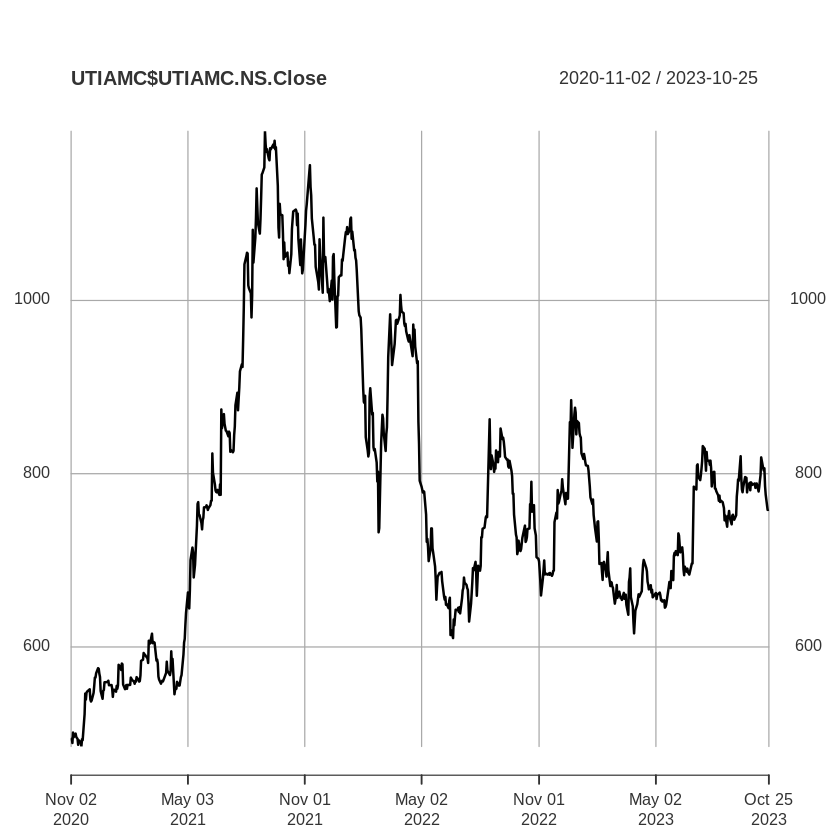

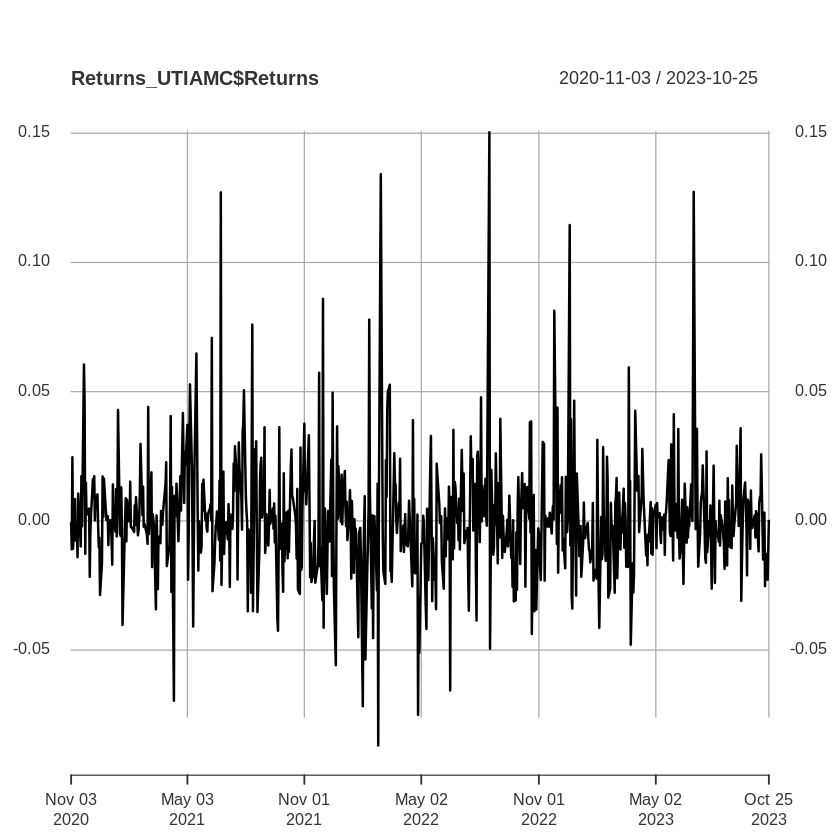

In [ ]:
library(tseries)
library(ggplot2)

UTIAMC <- getSymbols.yahoo ("UTIAMC.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE)
head(UTIAMC,5)

Returns_UTIAMC <- as.xts(tail(data.frame(UTIAMC$UTIAMC.NS.Close), -1)/head(data.frame(UTIAMC$UTIAMC.NS.Close), -1) -1, frequency = 365)
colnames(Returns_UTIAMC) <- "Returns"
head(Returns_UTIAMC)

plot(UTIAMC$UTIAMC.NS.Close)
plot(Returns_UTIAMC$Returns)

Warning message in adf.test(Returns_UTIAMC$Returns, alternative = "stationary"):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Returns_UTIAMC$Returns
Dickey-Fuller = -7.5956, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


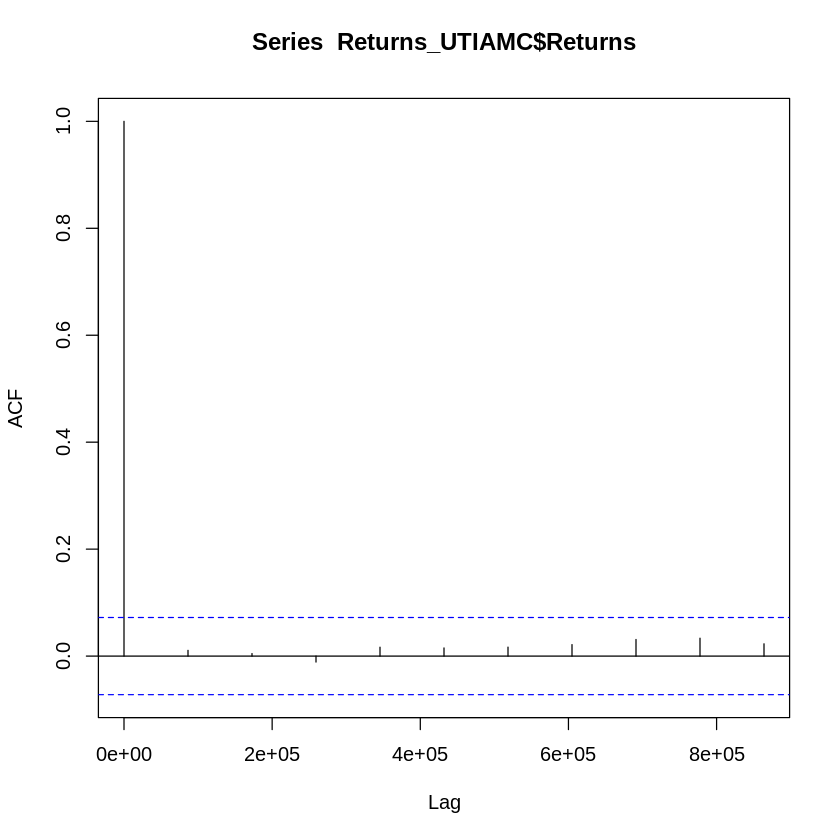

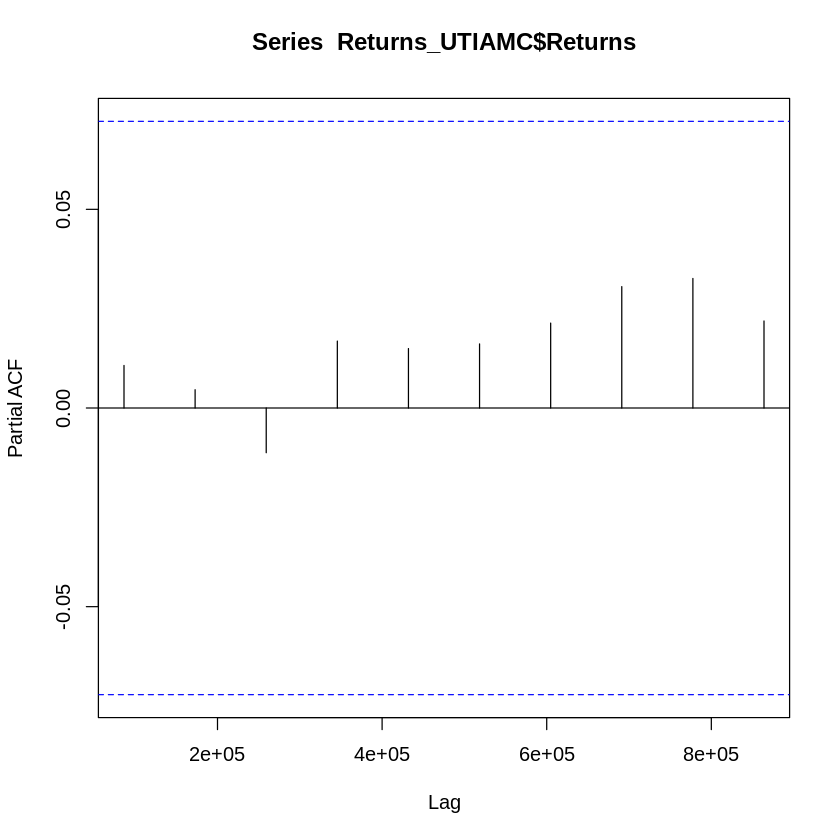

In [ ]:
adf.test(Returns_UTIAMC$Returns, alternative = "stationary")

plot(acf(Returns_UTIAMC$Returns, lag.max = 10))
plot(pacf(Returns_UTIAMC$Returns, lag.max = 10))


Call:
arima(x = Returns_UTIAMC$Returns, order = c(0, 0, 0))

Coefficients:
      intercept
          8e-04
s.e.      8e-04

sigma^2 estimated as 0.0005244:  log likelihood = 1739.97,  aic = -3475.94

$pred
Time Series:
Start = 63763201 
End = 64540801 
Frequency = 1.15740740740741e-05 
 [1] 0.0008361235 0.0008361235 0.0008361235 0.0008361235 0.0008361235
 [6] 0.0008361235 0.0008361235 0.0008361235 0.0008361235 0.0008361235

$se
Time Series:
Start = 63763201 
End = 64540801 
Frequency = 1.15740740740741e-05 
 [1] 0.02289991 0.02289991 0.02289991 0.02289991 0.02289991 0.02289991
 [7] 0.02289991 0.02289991 0.02289991 0.02289991

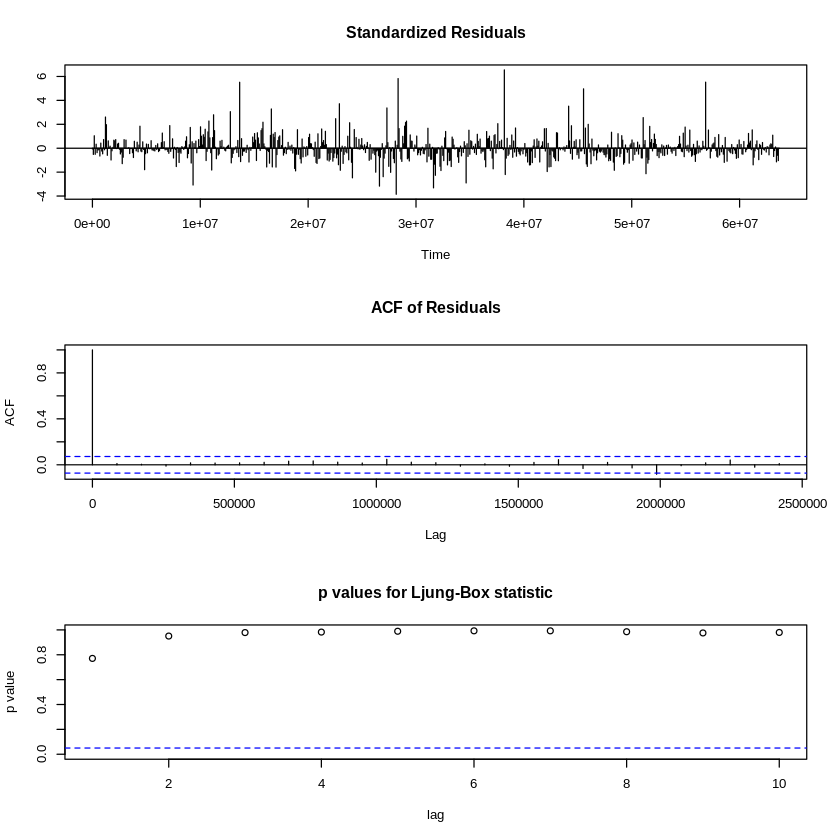

In [ ]:
arima_final <- arima(Returns_UTIAMC$Returns, order = c(0,0,0))
arima_final

predicted <- predict(arima_final, n.ahead = 10)
predicted

tsdiag(arima_final)

### GARCH and EGARCH Model

In [ ]:
library(quantmod)

UTIAMC <- getSymbols.yahoo("UTIAMC.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE)
head(UTIAMC)

rUTIAMC <- dailyReturn(UTIAMC)
head(rUTIAMC)

           UTIAMC.NS.Open UTIAMC.NS.High UTIAMC.NS.Low UTIAMC.NS.Close
2020-11-02          498.0         500.00        491.50          494.85
2020-11-03          492.1         498.85        491.55          494.60
2020-11-04          492.0         498.50        487.00          489.15
2020-11-05          492.0         503.70        492.00          501.20
2020-11-06          499.2         507.00        495.00          495.80
2020-11-09          496.0         500.65        496.00          500.00
           UTIAMC.NS.Volume UTIAMC.NS.Adjusted
2020-11-02           109054           450.5861
2020-11-03           128700           450.3584
2020-11-04           127685           445.3959
2020-11-05           255927           456.3680
2020-11-06           165281           451.4510
2020-11-09           667759           455.2753

           daily.returns
2020-11-02 -0.0063252889
2020-11-03 -0.0005052036
2020-11-04 -0.0110190298
2020-11-05  0.0246346079
2020-11-06 -0.0107741905
2020-11-09  0.0084711826

In [ ]:
library(rugarch)

ug_spec = ugarchspec()
ug_spec

eg_spec = ugarchspec(variance.model = list(model="eGARCH"))
eg_spec

ugfit = ugarchfit(spec = ug_spec, data = rUTIAMC)
ugfit

ugforecast = ugarchforecast(ugfit, n.ahead=10)
ugforecast


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: eGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001029    0.000992   1.0372  0.29966
ar1     0.918313    0.082459  11.1367  0.00000
ma1    -0.902737    0.088758 -10.1708  0.00000
omega   0.000008    0.000000  63.0703  0.00000
alpha1  0.006269    0.000964   6.5025  0.00000
beta1   0.978671    0.002633 371.7214  0.00000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001029    0.000929   1.1078 0.267948
ar1     0.918313    0.038390  23.9209 0.000000
ma1    -0.902737    0.044512 -20.2807 0.000000
omega   0.000008    0.000000  23.9918 0.000000
alpha1  0.006269    0.002389   2.6246 0.008676
beta1   0.978671    0.007267 134.6753 0.000000

LogLike


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 10
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2023-10-25]:
        Series   Sigma
T+1  0.0002904 0.02139
T+2  0.0003507 0.02142
T+3  0.0004061 0.02145
T+4  0.0004570 0.02147
T+5  0.0005037 0.02150
T+6  0.0005466 0.02153
T+7  0.0005861 0.02155
T+8  0.0006222 0.02158
T+9  0.0006555 0.02160
T+10 0.0006860 0.02163



## Weekly Returns

### CAPM Model

In [ ]:
NSE <- getSymbols.yahoo ("^NSEI", from ="2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "weekly")
NSE

UTIAMC <- getSymbols.yahoo ("UTIAMC.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "weekly")
UTIAMC

head (NSE, 5)
tail (NSE, 5)

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-01  11697.35  12280.40 11557.40   12263.55     3119300      12263.55
2020-11-08  12399.40  12769.75 12367.35   12719.95     3417300      12719.95
2020-11-15  12932.50  12963.00 12730.25   12859.05     2871800      12859.05
2020-11-22  12960.30  13145.85 12790.40   12968.95     3596200      12968.95
2020-11-29  13062.20  13280.05 12962.80   13258.55     2655500      13258.55
2020-12-06  13264.85  13579.35 13241.95   13513.85     2978600      13513.85
2020-12-13  13571.45  13773.25 13447.05   13760.55     2453600      13760.55
2020-12-20  13741.90  13777.50 13131.45   13749.25     2313600      13749.25
2020-12-27  13815.15  14049.85 13811.55   14018.50     2034400      14018.50
2021-01-03  14104.35  14367.30 13953.75   14347.25     2792500      14347.25
       ...                                                                  
2023-08-20  19320.65  19584.45 19229.70   19265.80     1431300      19265.80

           UTIAMC.NS.Open UTIAMC.NS.High UTIAMC.NS.Low UTIAMC.NS.Close
2020-11-01         498.00         507.00        487.00          495.80
2020-11-08         496.00         501.55        486.05          492.20
2020-11-15         487.05         495.00        483.10          492.45
2020-11-22         493.90         561.05        493.05          548.55
2020-11-29         548.55         555.00        533.10          538.25
2020-12-06         539.00         574.20        505.00          569.65
2020-12-13         571.00         579.80        540.00          549.15
2020-12-20         546.00         563.00        535.00          559.25
2020-12-27         560.00         565.50        552.35          555.90
2021-01-03         557.00         560.00        539.45          550.65
       ...                                                            
2023-08-20         751.75         764.80        737.00          749.45
2023-08-27         750.05         761.90        739.65          746.90
2023-0

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-01  11697.35  12280.40 11557.40   12263.55     3119300      12263.55
2020-11-08  12399.40  12769.75 12367.35   12719.95     3417300      12719.95
2020-11-15  12932.50  12963.00 12730.25   12859.05     2871800      12859.05
2020-11-22  12960.30  13145.85 12790.40   12968.95     3596200      12968.95
2020-11-29  13062.20  13280.05 12962.80   13258.55     2655500      13258.55

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2023-09-24  19678.20  19766.65 19492.10   19638.30     1193200      19638.30
2023-10-01  19622.40  19675.75 19333.60   19653.50      892800      19653.50
2023-10-08  19539.45  19843.30 19480.50   19751.05     1068300      19751.05
2023-10-15  19737.25  19849.75 19512.35   19542.65      994300      19542.65
2023-10-22  19521.60  19556.85 18837.85   18857.25      701700      18857.25

In [ ]:
close <- cbind(NSE$NSEI.Close, UTIAMC$UTIAMC.NS.Close)
head(close, 5)

Returns <- as.xts(tail(data.frame(close),-1)/head(data.frame(close),-1)-1)
head(Returns, 5)

           NSEI.Close UTIAMC.NS.Close
2020-11-01   12263.55          495.80
2020-11-08   12719.95          492.20
2020-11-15   12859.05          492.45
2020-11-22   12968.95          548.55
2020-11-29   13258.55          538.25

            NSEI.Close UTIAMC.NS.Close
2020-11-08 0.037216010   -0.0072609433
2020-11-15 0.010935547    0.0005079236
2020-11-22 0.008546541    0.1139201425
2020-11-29 0.022330228   -0.0187767533
2020-12-06 0.019255485    0.0583372493

In [ ]:
regression <- lm(UTIAMC.NS.Close ~ NSEI.Close, data.frame(Returns[]))
summary(regression)


Call:
lm(formula = UTIAMC.NS.Close ~ NSEI.Close, data = data.frame(Returns[]))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.162397 -0.028263 -0.002865  0.026692  0.165010 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.001699   0.003890   0.437 0.662927    
NSEI.Close  0.718856   0.187462   3.835 0.000183 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04792 on 153 degrees of freedom
Multiple R-squared:  0.08768,	Adjusted R-squared:  0.08172 
F-statistic:  14.7 on 1 and 153 DF,  p-value: 0.0001833


#### Beta for UTIAMC=0.7188 based on weekly returns

### ARIMA Model

           UTIAMC.NS.Open UTIAMC.NS.High UTIAMC.NS.Low UTIAMC.NS.Close
2020-11-01         498.00         507.00        487.00          495.80
2020-11-08         496.00         501.55        486.05          492.20
2020-11-15         487.05         495.00        483.10          492.45
2020-11-22         493.90         561.05        493.05          548.55
2020-11-29         548.55         555.00        533.10          538.25
           UTIAMC.NS.Volume UTIAMC.NS.Adjusted
2020-11-01           786647           451.4510
2020-11-08          2594482           448.1731
2020-11-15          1311024           448.4007
2020-11-22          5472850           506.7956
2020-11-29          1425049           497.2796

                 Returns
2020-11-08 -0.0072609433
2020-11-15  0.0005079236
2020-11-22  0.1139201425
2020-11-29 -0.0187767533
2020-12-06  0.0583372493
2020-12-13 -0.0359870080

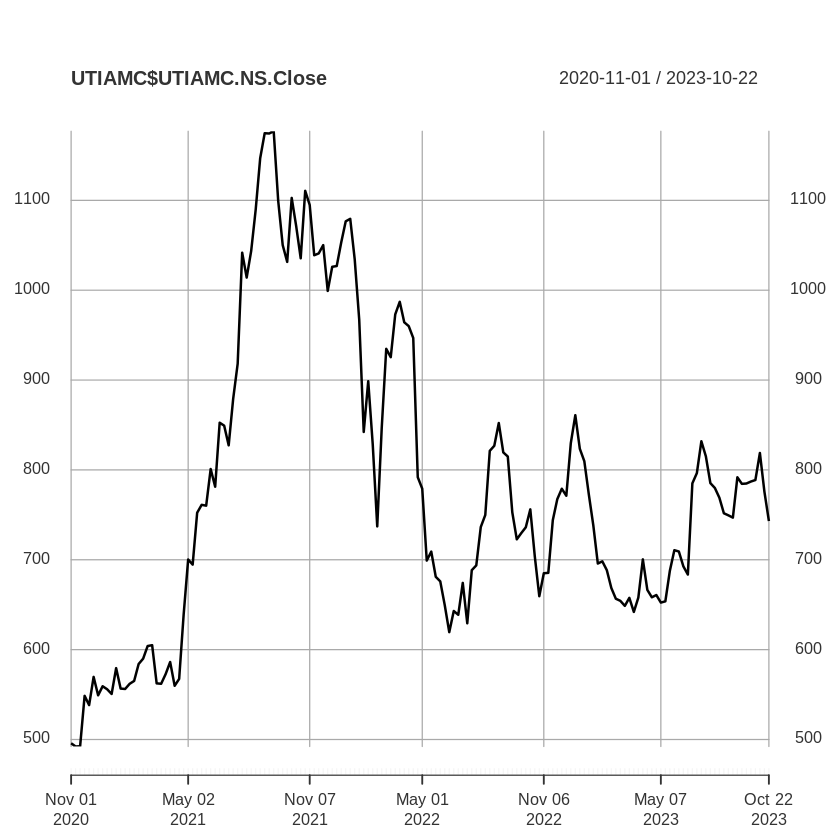

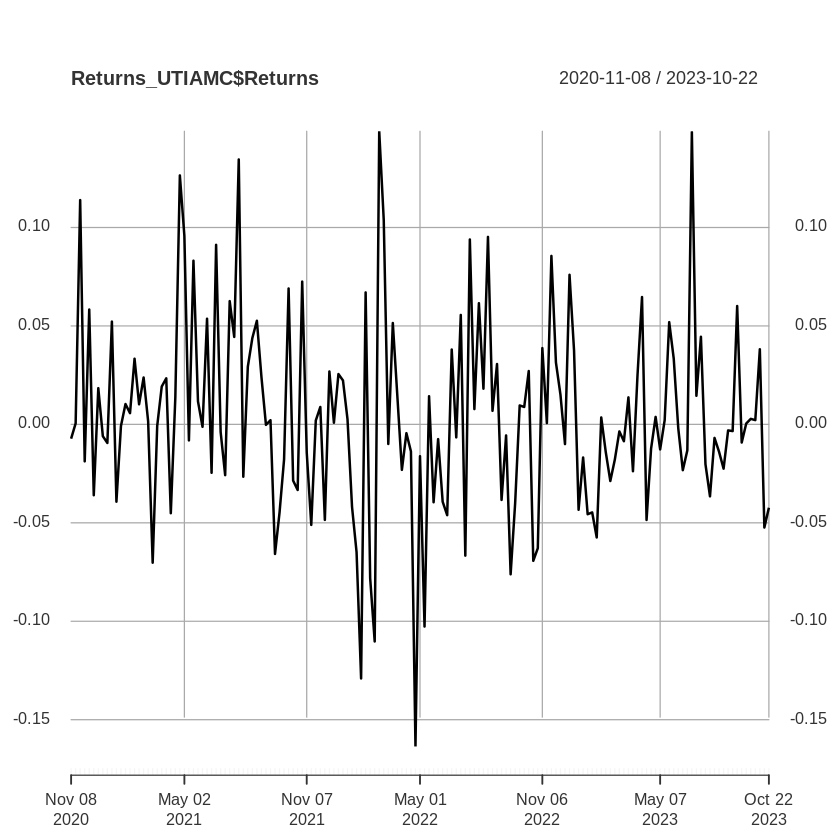

In [ ]:
library(tseries)
library(ggplot2)

UTIAMC <- getSymbols.yahoo ("UTIAMC.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "weekly")
head(UTIAMC,5)

Returns_UTIAMC <- as.xts(tail(data.frame(UTIAMC$UTIAMC.NS.Close), -1)/head(data.frame(UTIAMC$UTIAMC.NS.Close), -1) -1, frequency = 365)
colnames(Returns_UTIAMC) <- "Returns"
head(Returns_UTIAMC)

plot(UTIAMC$UTIAMC.NS.Close)
plot(Returns_UTIAMC$Returns)

Warning message in adf.test(Returns_UTIAMC$Returns, alternative = "stationary"):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Returns_UTIAMC$Returns
Dickey-Fuller = -5.0619, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


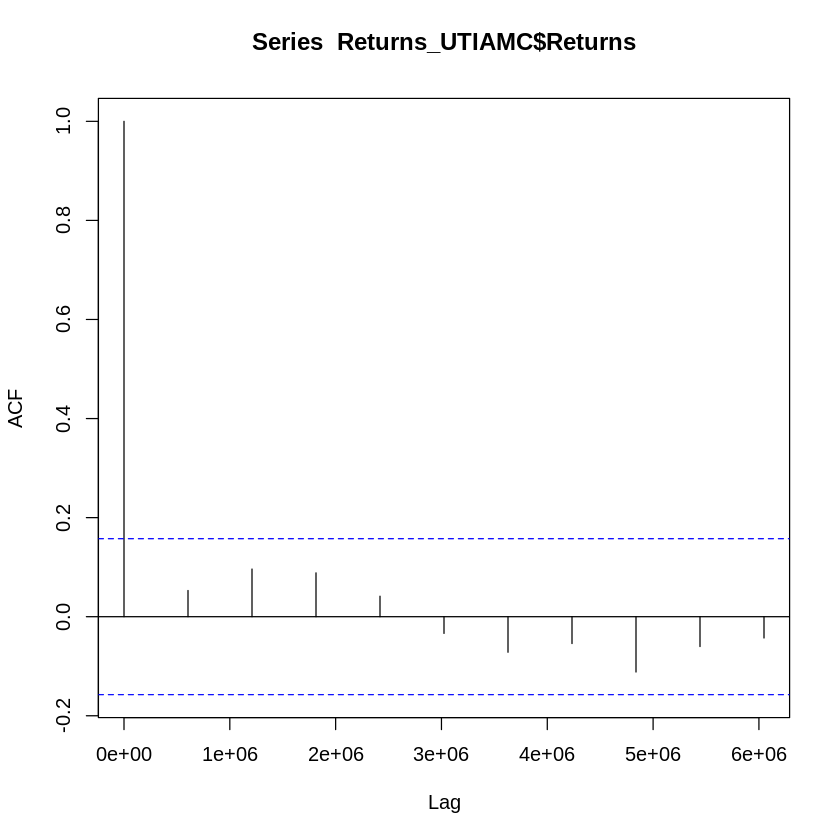

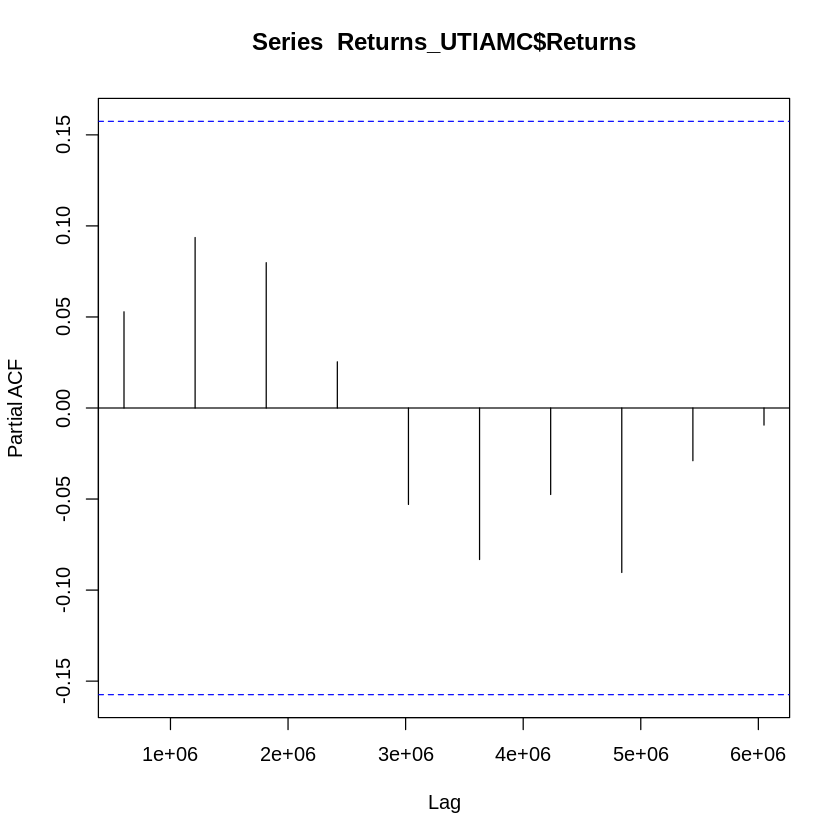

In [ ]:
adf.test(Returns_UTIAMC$Returns, alternative = "stationary")

plot(acf(Returns_UTIAMC$Returns, lag.max = 10))
plot(pacf(Returns_UTIAMC$Returns, lag.max = 10))


Call:
arima(x = Returns_UTIAMC$Returns, order = c(0, 0, 0))

Coefficients:
      intercept
         0.0038
s.e.     0.0040

sigma^2 estimated as 0.002484:  log likelihood = 244.89,  aic = -485.77

$pred
Time Series:
Start = c(93744001, 1) 
End = c(99187201, 1) 
Frequency = 1.65343915343915e-06 
 [1] 0.003847882 0.003847882 0.003847882 0.003847882 0.003847882 0.003847882
 [7] 0.003847882 0.003847882 0.003847882 0.003847882

$se
Time Series:
Start = c(93744001, 1) 
End = c(99187201, 1) 
Frequency = 1.65343915343915e-06 
 [1] 0.04984404 0.04984404 0.04984404 0.04984404 0.04984404 0.04984404
 [7] 0.04984404 0.04984404 0.04984404 0.04984404

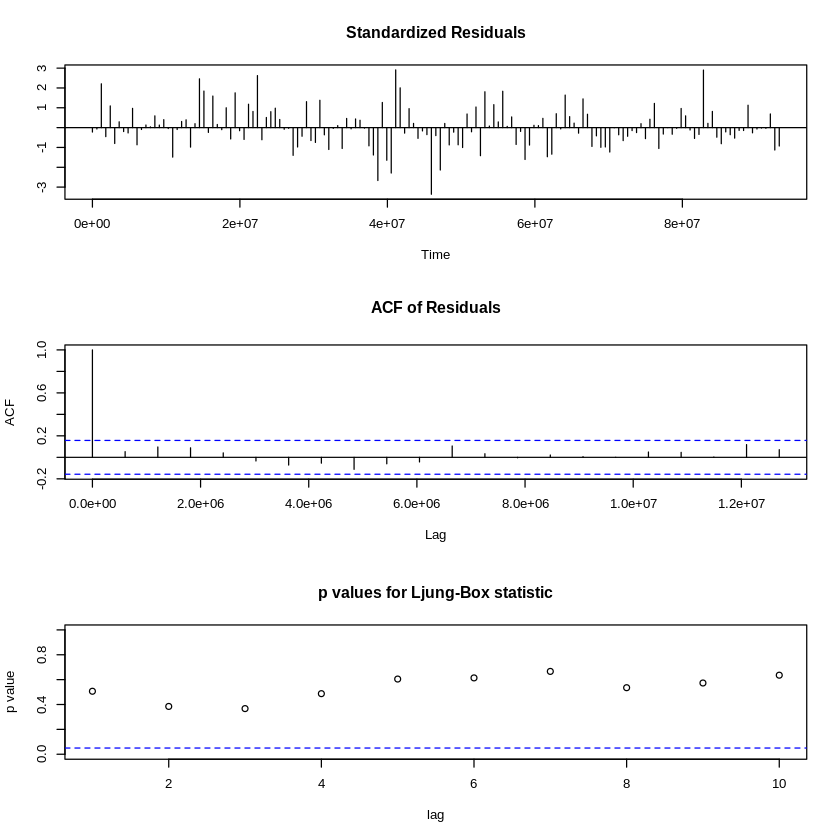

In [ ]:
arima_final <- arima(Returns_UTIAMC$Returns, order = c(0,0,0))
arima_final

predicted <- predict(arima_final, n.ahead = 10)
predicted

tsdiag(arima_final)

### GARCH and EGARCH Model

In [ ]:
library(quantmod)

UTIAMC <- getSymbols.yahoo("UTIAMC.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "weekly")
head(UTIAMC)

rUTIAMC <- dailyReturn(UTIAMC)
head(rUTIAMC)

           UTIAMC.NS.Open UTIAMC.NS.High UTIAMC.NS.Low UTIAMC.NS.Close
2020-11-01         498.00         507.00        487.00          495.80
2020-11-08         496.00         501.55        486.05          492.20
2020-11-15         487.05         495.00        483.10          492.45
2020-11-22         493.90         561.05        493.05          548.55
2020-11-29         548.55         555.00        533.10          538.25
2020-12-06         539.00         574.20        505.00          569.65
           UTIAMC.NS.Volume UTIAMC.NS.Adjusted
2020-11-01           786647           451.4510
2020-11-08          2594482           448.1730
2020-11-15          1311024           448.4007
2020-11-22          5472850           506.7957
2020-11-29          1425049           497.2797
2020-12-06          4228247           526.2896

           daily.returns
2020-11-01 -0.0044176952
2020-11-08 -0.0072609433
2020-11-15  0.0005079236
2020-11-22  0.1139201425
2020-11-29 -0.0187767533
2020-12-06  0.0583372493

In [ ]:
library(rugarch)

ug_spec = ugarchspec()
ug_spec

eg_spec = ugarchspec(variance.model = list(model="eGARCH"))
eg_spec

ugfit = ugarchfit(spec = ug_spec, data = rUTIAMC)
ugfit

ugforecast = ugarchforecast(ugfit, n.ahead=10)
ugforecast


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: eGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.004502    0.004731  0.95151 0.341348
ar1     0.632512    0.280914  2.25162 0.024346
ma1    -0.553040    0.296965 -1.86231 0.062559
omega   0.000340    0.000424  0.80197 0.422571
alpha1  0.050289    0.043179  1.16466 0.244156
beta1   0.810369    0.195138  4.15279 0.000033

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.004502    0.004575  0.98409 0.325071
ar1     0.632512    0.134938  4.68744 0.000003
ma1    -0.553040    0.134477 -4.11252 0.000039
omega   0.000340    0.000591  0.57503 0.565270
alpha1  0.050289    0.063741  0.78897 0.430128
beta1   0.810369    0.279987  2.89431 0.003800

LogLike


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 10
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2023-10-22]:
         Series   Sigma
T+1  -0.0009429 0.04651
T+2   0.0010580 0.04692
T+3   0.0023235 0.04727
T+4   0.0031240 0.04757
T+5   0.0036303 0.04782
T+6   0.0039506 0.04804
T+7   0.0041531 0.04823
T+8   0.0042813 0.04839
T+9   0.0043623 0.04853
T+10  0.0044135 0.04865



# Monthly Returns

### CAPM Model

In [ ]:
NSE <- getSymbols.yahoo ("^NSEI", from ="2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "monthly")
NSE

UTIAMC <- getSymbols.yahoo ("UTIAMC.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "monthly")
UTIAMC

head (NSE, 5)
tail (NSE, 5)

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-30  13062.20  14024.85 12962.80   13981.75    12077600      13981.75
2020-12-31  13996.10  14753.55 13596.75   13634.60    13119900      13634.60
2021-01-31  13758.60  15431.75 13661.75   14529.15    14313900      14529.15
2021-02-28  14702.50  15336.30 14264.40   14690.70     9886800      14690.70
2021-03-31  14798.40  15044.35 14151.40   14631.10     9344700      14631.10
2021-04-30  14481.05  15606.35 14416.25   15582.80     9859900      15582.80
2021-05-31  15629.65  15915.65 15450.90   15721.50     8079100      15721.50
2021-06-30  15755.05  15962.25 15513.45   15763.05     5756800      15763.05
2021-07-31  15874.90  17153.50 15834.65   17132.20     6349900      17132.20
2021-08-31  17185.60  17947.65 17055.05   17618.15     6955600      17618.15
2021-09-30  17531.90  18604.45 17452.90   17671.65     7651200      17671.65
2021-10-31  17783.15  18210.15 16782.40   16983.20     5853100      16983.20

           UTIAMC.NS.Open UTIAMC.NS.High UTIAMC.NS.Low UTIAMC.NS.Close
2020-11-30         549.95         579.80        505.00          555.80
2020-12-31         556.00         595.80        539.45          556.20
2021-01-31         559.85         602.65        550.35          589.95
2021-02-28         589.95         624.00        547.55          583.00
2021-03-31         579.10         649.00        538.00          639.15
2021-04-30         635.10         777.00        630.45          761.40
2021-05-31         761.00         919.45        752.80          853.65
2021-06-30         858.05        1054.10        819.10         1041.75
2021-07-31        1045.00        1214.55        937.15         1195.35
2021-08-31        1205.00        1216.20       1040.95         1066.95
2021-09-30        1065.00        1123.00       1005.10         1035.50
2021-10-31        1031.25        1165.85        980.25         1095.65
2021-11-30        1075.00        1090.50        957.60         1053.15
2021-1

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-30   13062.2  14024.85 12962.80   13981.75    12077600      13981.75
2020-12-31   13996.1  14753.55 13596.75   13634.60    13119900      13634.60
2021-01-31   13758.6  15431.75 13661.75   14529.15    14313900      14529.15
2021-02-28   14702.5  15336.30 14264.40   14690.70     9886800      14690.70
2021-03-31   14798.4  15044.35 14151.40   14631.10     9344700      14631.10

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2023-05-31  18579.40  19201.70 18464.55   19189.05     5144400      19189.05
2023-06-30  19246.50  19991.85 19234.40   19753.80     5802500      19753.80
2023-07-31  19784.00  19795.60 19223.65   19253.80     6027500      19253.80
2023-08-31  19258.15  20222.45 19255.70   19638.30     5666500      19638.30
2023-09-30  19622.40  19849.75 18837.85   19079.60     4248400      19079.60

In [ ]:
close <- cbind(NSE$NSEI.Close, UTIAMC$UTIAMC.NS.Close)
head(close, 5)

Returns <- as.xts(tail(data.frame(close),-1)/head(data.frame(close),-1)-1)
head(Returns, 5)

           NSEI.Close UTIAMC.NS.Close
2020-11-30   13981.75          555.80
2020-12-31   13634.60          556.20
2021-01-31   14529.15          589.95
2021-02-28   14690.70          583.00
2021-03-31   14631.10          639.15

             NSEI.Close UTIAMC.NS.Close
2020-12-31 -0.024828823    0.0007197273
2021-01-31  0.065608878    0.0606796103
2021-02-28  0.011119012   -0.0117806798
2021-03-31 -0.004057028    0.0963122203
2021-04-30  0.065046389    0.1912696477

In [ ]:
regression <- lm(UTIAMC.NS.Close ~ NSEI.Close, data.frame(Returns[]))
summary(regression)


Call:
lm(formula = UTIAMC.NS.Close ~ NSEI.Close, data = data.frame(Returns[]))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16930 -0.06523 -0.02007  0.05059  0.21705 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0009735  0.0169357  -0.057 0.954518    
NSEI.Close   1.6167403  0.4443350   3.639 0.000955 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0954 on 32 degrees of freedom
Multiple R-squared:  0.2926,	Adjusted R-squared:  0.2705 
F-statistic: 13.24 on 1 and 32 DF,  p-value: 0.0009552


#### Beta for UITAMC=1.6167 for monthly returns

### ARIMA Model

           UTIAMC.NS.Open UTIAMC.NS.High UTIAMC.NS.Low UTIAMC.NS.Close
2020-11-30         549.95         579.80        505.00          555.80
2020-12-31         556.00         595.80        539.45          556.20
2021-01-31         559.85         602.65        550.35          589.95
2021-02-28         589.95         624.00        547.55          583.00
2021-03-31         579.10         649.00        538.00          639.15
           UTIAMC.NS.Volume UTIAMC.NS.Adjusted
2020-11-30         11447287           513.4938
2020-12-31          7328582           513.8633
2021-01-31          5600095           545.0444
2021-02-28          4575033           538.6234
2021-03-31          6028412           590.4995

                 Returns
2020-12-31  0.0007197273
2021-01-31  0.0606796103
2021-02-28 -0.0117806798
2021-03-31  0.0963122203
2021-04-30  0.1912696477
2021-05-31  0.1211583886

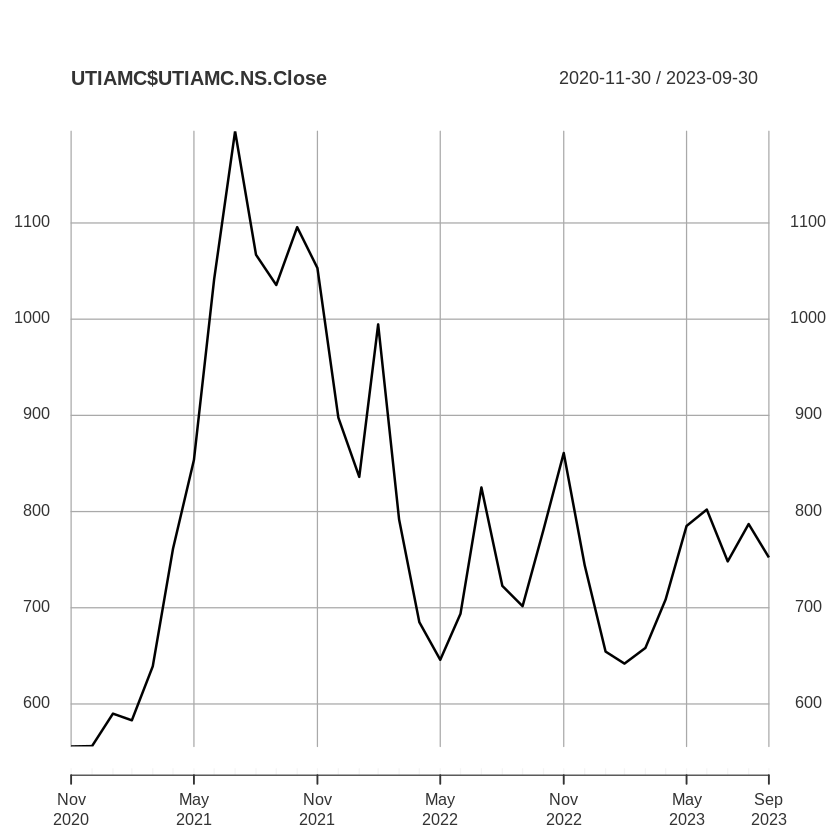

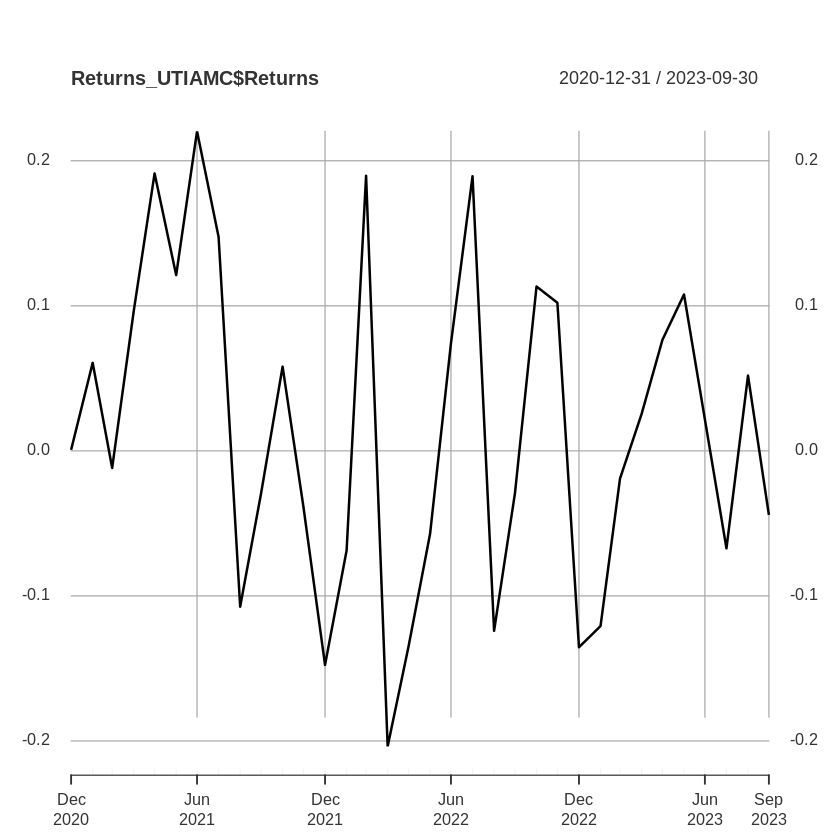

In [ ]:
library(tseries)
library(ggplot2)

UTIAMC <- getSymbols.yahoo ("UTIAMC.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "monthly")
head(UTIAMC,5)

Returns_UTIAMC <- as.xts(tail(data.frame(UTIAMC$UTIAMC.NS.Close), -1)/head(data.frame(UTIAMC$UTIAMC.NS.Close), -1) -1, frequency = 365)
colnames(Returns_UTIAMC) <- "Returns"
head(Returns_UTIAMC)

plot(UTIAMC$UTIAMC.NS.Close)
plot(Returns_UTIAMC$Returns)


	Augmented Dickey-Fuller Test

data:  Returns_UTIAMC$Returns
Dickey-Fuller = -2.3127, Lag order = 3, p-value = 0.4519
alternative hypothesis: stationary


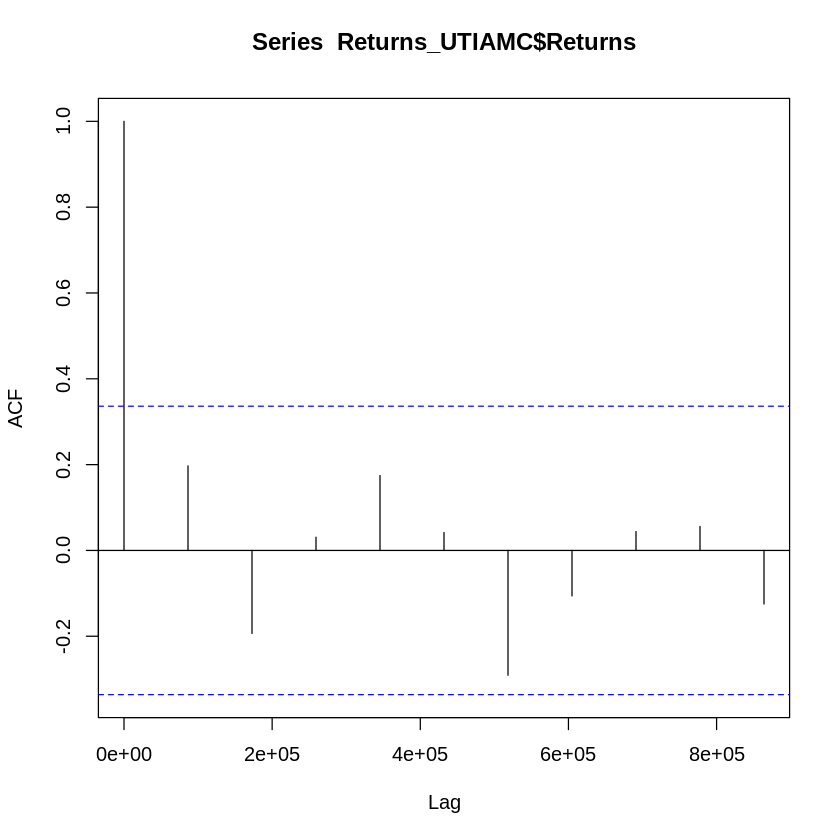

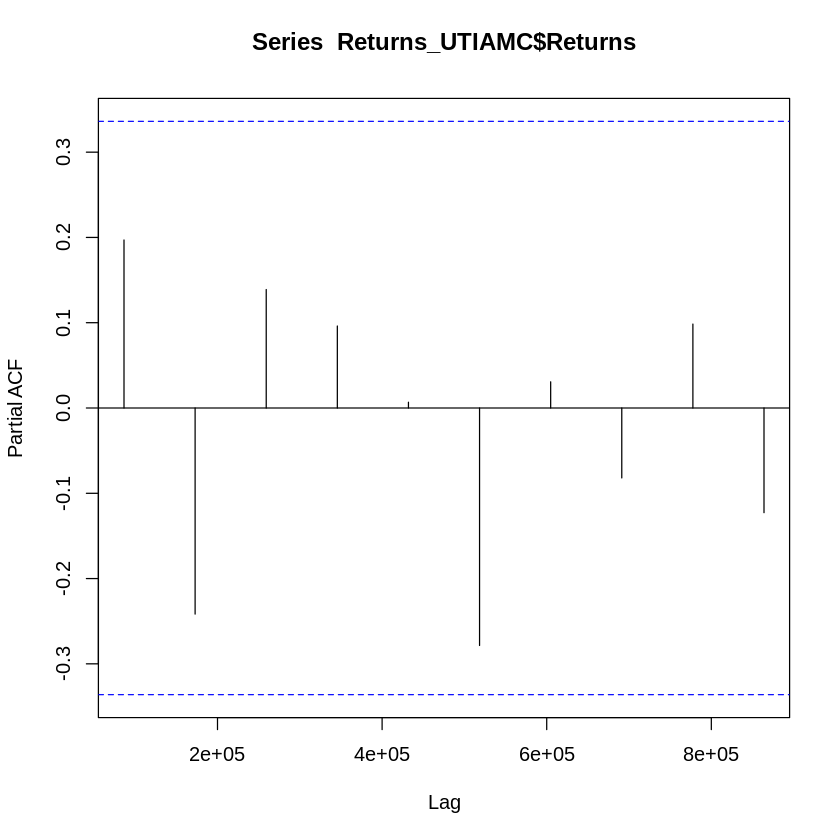

In [ ]:
adf.test(Returns_UTIAMC$Returns, alternative = "stationary")

plot(acf(Returns_UTIAMC$Returns, lag.max = 10))
plot(pacf(Returns_UTIAMC$Returns, lag.max = 10))


Call:
arima(x = Returns_UTIAMC$Returns, order = c(0, 0, 0))

Coefficients:
      intercept
         0.0150
s.e.     0.0189

sigma^2 estimated as 0.01211:  log likelihood = 26.79,  aic = -49.58

$pred
Time Series:
Start = 2937601 
End = 3715201 
Frequency = 1.15740740740741e-05 
 [1] 0.01495341 0.01495341 0.01495341 0.01495341 0.01495341 0.01495341
 [7] 0.01495341 0.01495341 0.01495341 0.01495341

$se
Time Series:
Start = 2937601 
End = 3715201 
Frequency = 1.15740740740741e-05 
 [1] 0.1100388 0.1100388 0.1100388 0.1100388 0.1100388 0.1100388 0.1100388
 [8] 0.1100388 0.1100388 0.1100388

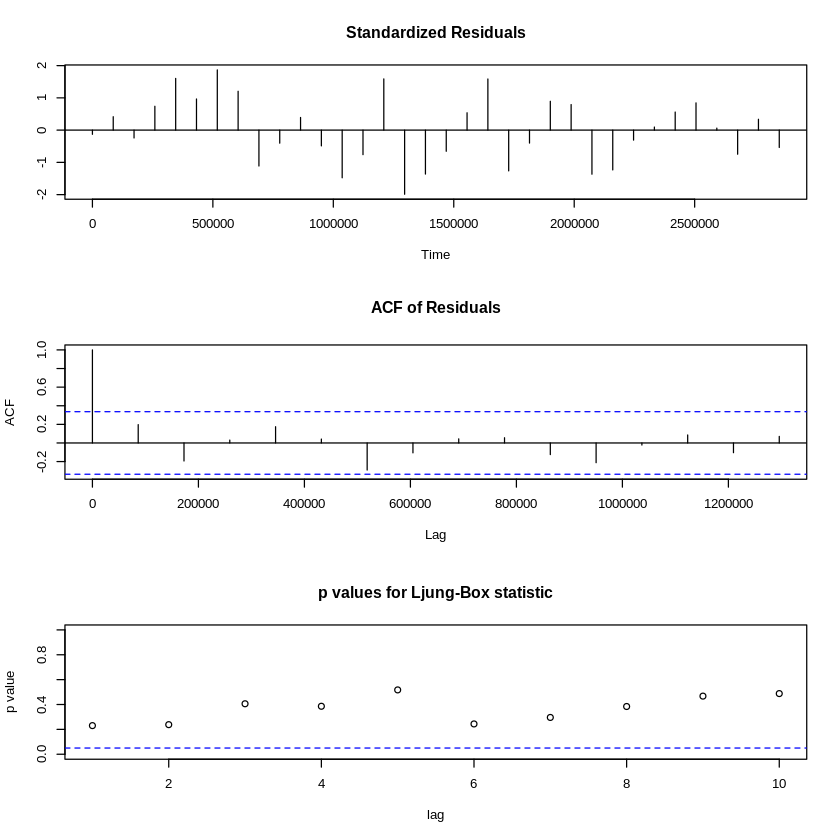

In [ ]:
arima_final <- arima(Returns_UTIAMC$Returns, order = c(0,0,0))
arima_final

predicted <- predict(arima_final, n.ahead = 10)
predicted

tsdiag(arima_final)

### GARCH and EGARCH Model

In [ ]:
library(quantmod)

UTIAMC <- getSymbols.yahoo("UTIAMC.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "monthly")
head(UTIAMC)

rUTIAMC <- dailyReturn(UTIAMC)
head(rUTIAMC)

           UTIAMC.NS.Open UTIAMC.NS.High UTIAMC.NS.Low UTIAMC.NS.Close
2020-11-30         549.95         579.80        505.00          555.80
2020-12-31         556.00         595.80        539.45          556.20
2021-01-31         559.85         602.65        550.35          589.95
2021-02-28         589.95         624.00        547.55          583.00
2021-03-31         579.10         649.00        538.00          639.15
2021-04-30         635.10         777.00        630.45          761.40
           UTIAMC.NS.Volume UTIAMC.NS.Adjusted
2020-11-30         11447287           513.4938
2020-12-31          7328582           513.8633
2021-01-31          5600095           545.0444
2021-02-28          4575033           538.6234
2021-03-31          6028412           590.4994
2021-04-30          7216402           703.4440

           daily.returns
2020-11-30  0.0106372860
2020-12-31  0.0007197273
2021-01-31  0.0606796103
2021-02-28 -0.0117806798
2021-03-31  0.0963122203
2021-04-30  0.1912696477

In [ ]:
library(rugarch)

ug_spec = ugarchspec()
ug_spec

eg_spec = ugarchspec(variance.model = list(model="eGARCH"))
eg_spec

ugfit = ugarchfit(spec = ug_spec, data = rUTIAMC)
ugfit

ugforecast = ugarchforecast(ugfit, n.ahead=10)
ugforecast


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: eGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 


Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
“
ugarchfit-->waring: using less than 100 data
 points for estimation
”
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
“
ugarchfit-->warning: solver failer to converge.”



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Convergence Problem:
Solver Message: 



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 ma1 omega alpha1 beta1


ERROR: ignored

# WHEELS

## Daily Returns

### CAPM Model

In [ ]:
require (quantmod) #includes necessary packages for analysis

#Getting the data of Nifty 50 and SBI Equity

NSE <- getSymbols.yahoo ("^NSEI", from ="2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE)
NSE

WHEELS <- getSymbols.yahoo ("WHEELS.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE)
WHEELS

head (NSE, 5)
tail (NSE, 5)

Warning message:
“^NSEI contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-02  11697.35  11725.65 11557.40   11669.15      568400      11669.15
2020-11-03  11734.45  11836.20 11723.30   11813.50      674300      11813.50
2020-11-04  11783.35  11929.65 11756.40   11908.50      667300      11908.50
2020-11-05  12062.40  12131.10 12027.60   12120.30      632500      12120.30
2020-11-06  12156.65  12280.40 12131.85   12263.55      576800      12263.55
2020-11-09  12399.40  12474.05 12367.35   12461.05      553400      12461.05
2020-11-10  12556.40  12643.90 12475.25   12631.10      847500      12631.10
2020-11-11  12680.60  12769.75 12571.10   12749.15      880500      12749.15
2020-11-12  12702.15  12741.15 12624.85   12690.80      622000      12690.80
2020-11-13  12659.70  12735.95 12607.70   12719.95      513900      12719.95
       ...                                                                  
2023-10-11  19767.00  19839.20 19756.95   19811.35      213700      19811.35

           WHEELS.NS.Open WHEELS.NS.High WHEELS.NS.Low WHEELS.NS.Close
2020-11-02         402.80         402.80        391.00          395.15
2020-11-03         396.80         397.15        391.45          393.45
2020-11-04         395.40         397.00        392.05          394.45
2020-11-05         396.45         403.35        395.00          398.35
2020-11-06         399.95         403.40        396.50          400.15
2020-11-09         402.20         407.85        398.00          400.35
2020-11-10         402.40         403.00        391.50          393.65
2020-11-11         395.65         403.20        390.70          400.30
2020-11-12         403.00         405.05        395.05          398.95
2020-11-13         400.55         404.90        400.00          401.60
       ...                                                            
2023-10-11         779.80         784.95        767.00          771.15
2023-10-12         767.00         778.90        765.10          768.25
2023-1

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-02  11697.35  11725.65 11557.40   11669.15      568400      11669.15
2020-11-03  11734.45  11836.20 11723.30   11813.50      674300      11813.50
2020-11-04  11783.35  11929.65 11756.40   11908.50      667300      11908.50
2020-11-05  12062.40  12131.10 12027.60   12120.30      632500      12120.30
2020-11-06  12156.65  12280.40 12131.85   12263.55      576800      12263.55

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2023-10-18  19820.45  19840.95 19659.95   19671.10      198900      19671.10
2023-10-19  19545.20  19681.80 19512.35   19624.70      230300      19624.70
2023-10-20  19542.15  19593.80 19518.70   19542.65      198300      19542.65
2023-10-23  19521.60  19556.85 19257.85   19281.75      176000      19281.75
2023-10-25  19286.45  19347.30 19074.15   19122.15      225300      19122.15

In [ ]:
close <- cbind(NSE$NSEI.Close, WHEELS$WHEELS.NS.Close)
head(close, 5)

Returns <- as.xts(tail(data.frame(close),-1)/head(data.frame(close),-1)-1)
head(Returns, 5)

           NSEI.Close WHEELS.NS.Close
2020-11-02   11669.15          395.15
2020-11-03   11813.50          393.45
2020-11-04   11908.50          394.45
2020-11-05   12120.30          398.35
2020-11-06   12263.55          400.15

            NSEI.Close WHEELS.NS.Close
2020-11-03 0.012370190   -0.0043021175
2020-11-04 0.008041647    0.0025416189
2020-11-05 0.017785599    0.0098871689
2020-11-06 0.011819015    0.0045186087
2020-11-09 0.016104636    0.0004998431

In [ ]:
regression <- lm(WHEELS.NS.Close ~ NSEI.Close, data.frame(Returns[]))
summary(regression)


Call:
lm(formula = WHEELS.NS.Close ~ NSEI.Close, data = data.frame(Returns[]))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.092049 -0.012016 -0.003047  0.010061  0.183059 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0003137  0.0008293   0.378    0.705    
NSEI.Close  0.9160618  0.0883745  10.366   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02244 on 734 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1277,	Adjusted R-squared:  0.1265 
F-statistic: 107.4 on 1 and 734 DF,  p-value: < 2.2e-16


#### Beta for WHEELS=0.916 based on daily returns

### ARIMA Model

           WHEELS.NS.Open WHEELS.NS.High WHEELS.NS.Low WHEELS.NS.Close
2020-11-02         402.80         402.80        391.00          395.15
2020-11-03         396.80         397.15        391.45          393.45
2020-11-04         395.40         397.00        392.05          394.45
2020-11-05         396.45         403.35        395.00          398.35
2020-11-06         399.95         403.40        396.50          400.15
           WHEELS.NS.Volume WHEELS.NS.Adjusted
2020-11-02             4088           380.0782
2020-11-03             2902           378.4431
2020-11-04             1183           379.4050
2020-11-05             7302           383.1562
2020-11-06             2321           384.8876

                 Returns
2020-11-03 -0.0043021175
2020-11-04  0.0025416189
2020-11-05  0.0098871689
2020-11-06  0.0045186087
2020-11-09  0.0004998431
2020-11-10 -0.0167353868

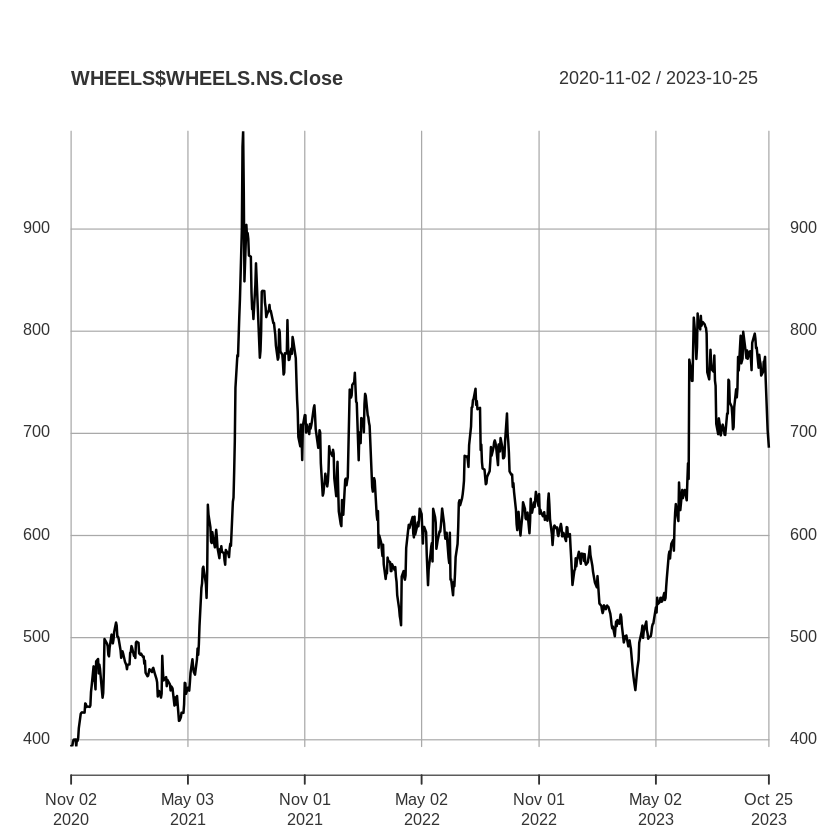

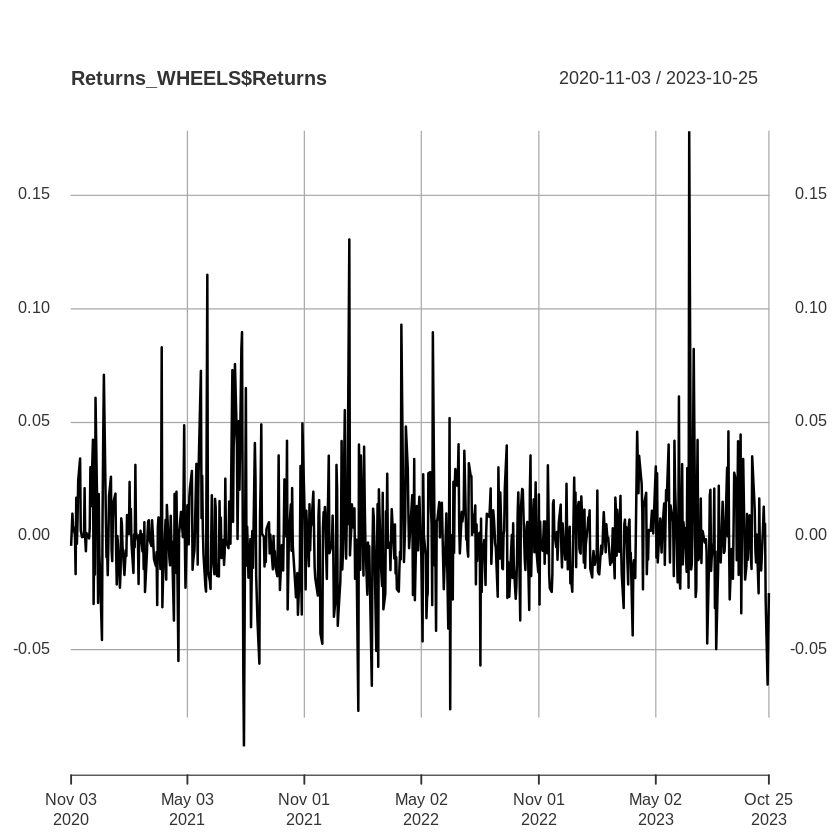

In [ ]:
library(tseries)
library(ggplot2)

WHEELS <- getSymbols.yahoo ("WHEELS.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE)
head(WHEELS,5)

Returns_WHEELS <- as.xts(tail(data.frame(WHEELS$WHEELS.NS.Close), -1)/head(data.frame(WHEELS$WHEELS.NS.Close), -1) -1, frequency = 365)
colnames(Returns_WHEELS) <- "Returns"
head(Returns_WHEELS)

plot(WHEELS$WHEELS.NS.Close)
plot(Returns_WHEELS$Returns)

Warning message in adf.test(Returns_WHEELS$Returns, alternative = "stationary"):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Returns_WHEELS$Returns
Dickey-Fuller = -7.3358, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


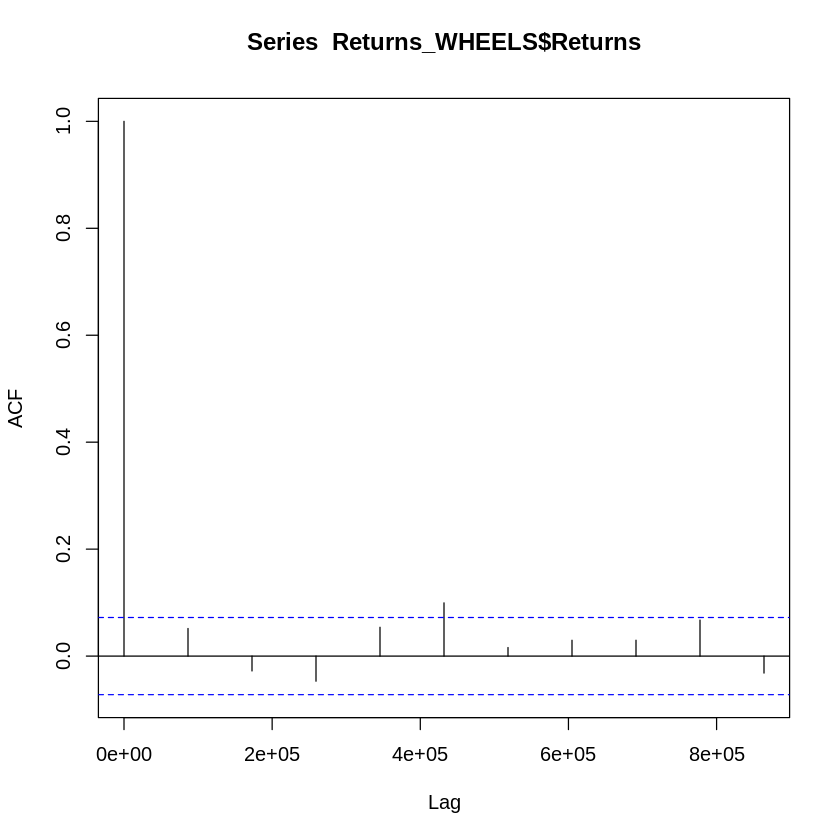

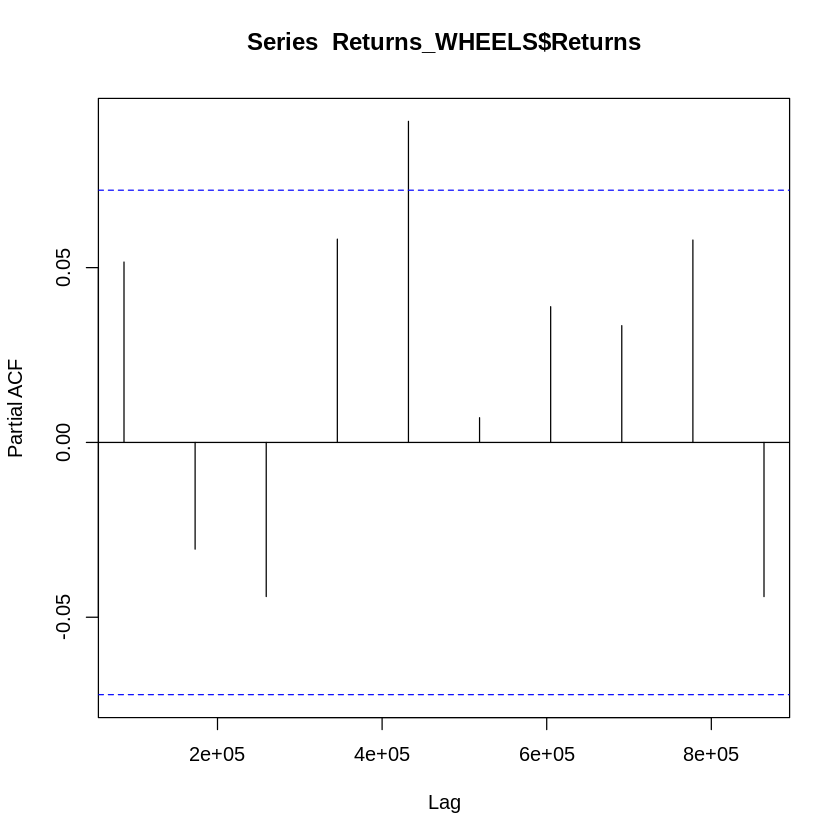

In [ ]:
adf.test(Returns_WHEELS$Returns, alternative = "stationary")

plot(acf(Returns_WHEELS$Returns, lag.max = 10))
plot(pacf(Returns_WHEELS$Returns, lag.max = 10))


Call:
arima(x = Returns_WHEELS$Returns, order = c(1, 0, 1))

Coefficients:
          ar1     ma1  intercept
      -0.1230  0.1771      1e-03
s.e.   0.3812  0.3772      9e-04

sigma^2 estimated as 0.0005745:  log likelihood = 1706.32,  aic = -3404.63

$pred
Time Series:
Start = 63763201 
End = 64540801 
Frequency = 1.15740740740741e-05 
 [1] 0.0002064347 0.0011368186 0.0010223526 0.0010364355 0.0010347028
 [6] 0.0010349160 0.0010348898 0.0010348930 0.0010348926 0.0010348927

$se
Time Series:
Start = 63763201 
End = 64540801 
Frequency = 1.15740740740741e-05 
 [1] 0.02396831 0.02400336 0.02400389 0.02400390 0.02400390 0.02400390
 [7] 0.02400390 0.02400390 0.02400390 0.02400390

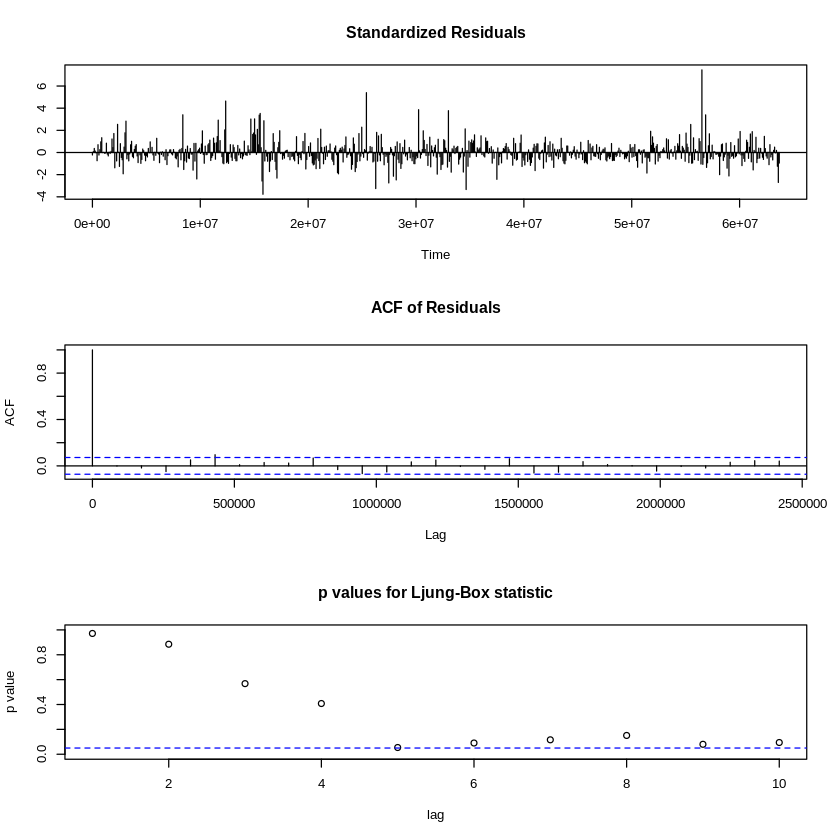

In [ ]:
arima_final <- arima(Returns_WHEELS$Returns, order = c(1,0,1))
arima_final

predicted <- predict(arima_final, n.ahead = 10)
predicted

tsdiag(arima_final)

### GARCH and EGARCH Model

In [ ]:
library(quantmod)

WHEELS <- getSymbols.yahoo("WHEELS.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE)
head(WHEELS)

rWHEELS <- dailyReturn(WHEELS)
head(rWHEELS)

           WHEELS.NS.Open WHEELS.NS.High WHEELS.NS.Low WHEELS.NS.Close
2020-11-02         402.80         402.80        391.00          395.15
2020-11-03         396.80         397.15        391.45          393.45
2020-11-04         395.40         397.00        392.05          394.45
2020-11-05         396.45         403.35        395.00          398.35
2020-11-06         399.95         403.40        396.50          400.15
2020-11-09         402.20         407.85        398.00          400.35
           WHEELS.NS.Volume WHEELS.NS.Adjusted
2020-11-02             4088           380.0782
2020-11-03             2902           378.4431
2020-11-04             1183           379.4050
2020-11-05             7302           383.1562
2020-11-06             2321           384.8876
2020-11-09             2496           385.0800

           daily.returns
2020-11-02 -0.0189920410
2020-11-03 -0.0043021175
2020-11-04  0.0025416189
2020-11-05  0.0098871689
2020-11-06  0.0045186087
2020-11-09  0.0004998431

In [ ]:
library(rugarch)

ug_spec = ugarchspec()
ug_spec

eg_spec = ugarchspec(variance.model = list(model="eGARCH"))
eg_spec

ugfit = ugarchfit(spec = ug_spec, data = rWHEELS)
ugfit

ugforecast = ugarchforecast(ugfit, n.ahead=10)
ugforecast


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: eGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.000648    0.000874  0.740963 0.458716
ar1     0.089598    0.344566  0.260031 0.794840
ma1    -0.026876    0.343770 -0.078181 0.937684
omega   0.000056    0.000030  1.845204 0.065008
alpha1  0.111382    0.041048  2.713457 0.006659
beta1   0.801755    0.079395 10.098304 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000648    0.000944  0.68630 0.492522
ar1     0.089598    0.229655  0.39014 0.696432
ma1    -0.026876    0.226906 -0.11845 0.905713
omega   0.000056    0.000076  0.74113 0.458611
alpha1  0.111382    0.086472  1.28807 0.197721
beta1   0.801755    0.198095  4.04732 0.000052




*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 10
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2023-10-25]:
         Series   Sigma
T+1  -0.0010789 0.02825
T+2   0.0004930 0.02802
T+3   0.0006338 0.02780
T+4   0.0006464 0.02760
T+5   0.0006476 0.02742
T+6   0.0006477 0.02725
T+7   0.0006477 0.02709
T+8   0.0006477 0.02695
T+9   0.0006477 0.02682
T+10  0.0006477 0.02670



## Weekly Returns

### CAPM Model

In [ ]:
require (quantmod) #includes necessary packages for analysis

#Getting the data of Nifty 50 and SBI Equity

NSE <- getSymbols.yahoo ("^NSEI", from ="2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "weekly")
NSE

WHEELS <- getSymbols.yahoo ("WHEELS.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "weekly")
WHEELS

head (NSE, 5)
tail (NSE, 5)

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-01  11697.35  12280.40 11557.40   12263.55     3119300      12263.55
2020-11-08  12399.40  12769.75 12367.35   12719.95     3417300      12719.95
2020-11-15  12932.50  12963.00 12730.25   12859.05     2871800      12859.05
2020-11-22  12960.30  13145.85 12790.40   12968.95     3596200      12968.95
2020-11-29  13062.20  13280.05 12962.80   13258.55     2655500      13258.55
2020-12-06  13264.85  13579.35 13241.95   13513.85     2978600      13513.85
2020-12-13  13571.45  13773.25 13447.05   13760.55     2453600      13760.55
2020-12-20  13741.90  13777.50 13131.45   13749.25     2313600      13749.25
2020-12-27  13815.15  14049.85 13811.55   14018.50     2034400      14018.50
2021-01-03  14104.35  14367.30 13953.75   14347.25     2792500      14347.25
       ...                                                                  
2023-08-20  19320.65  19584.45 19229.70   19265.80     1431300      19265.80

           WHEELS.NS.Open WHEELS.NS.High WHEELS.NS.Low WHEELS.NS.Close
2020-11-01         402.80         403.40        391.00          400.15
2020-11-08         402.20         416.50        390.70          411.40
2020-11-15         401.60         446.85        401.60          426.70
2020-11-22         427.70         445.00        421.55          432.65
2020-11-29         432.65         470.90        425.00          452.70
2020-12-06         455.10         480.50        442.40          476.75
2020-12-13         489.00         496.60        456.00          462.35
2020-12-20         464.70         511.90        430.00          498.65
2020-12-27         516.00         518.50        468.00          490.20
2021-01-03         500.00         516.70        493.40          505.35
       ...                                                            
2023-08-20         700.00         772.90        696.15          730.30
2023-08-27         733.00         742.55        697.95          725.65
2023-0

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-01  11697.35  12280.40 11557.40   12263.55     3119300      12263.55
2020-11-08  12399.40  12769.75 12367.35   12719.95     3417300      12719.95
2020-11-15  12932.50  12963.00 12730.25   12859.05     2871800      12859.05
2020-11-22  12960.30  13145.85 12790.40   12968.95     3596200      12968.95
2020-11-29  13062.20  13280.05 12962.80   13258.55     2655500      13258.55

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2023-09-24  19678.20  19766.65 19492.10   19638.30     1193200      19638.30
2023-10-01  19622.40  19675.75 19333.60   19653.50      892800      19653.50
2023-10-08  19539.45  19843.30 19480.50   19751.05     1068300      19751.05
2023-10-15  19737.25  19849.75 19512.35   19542.65      994300      19542.65
2023-10-22  19521.60  19556.85 18837.85   18857.25      701700      18857.25

In [ ]:
close <- cbind(NSE$NSEI.Close, WHEELS$WHEELS.NS.Close)
head(close, 5)

Returns <- as.xts(tail(data.frame(close),-1)/head(data.frame(close),-1)-1)
head(Returns, 5)

           NSEI.Close WHEELS.NS.Close
2020-11-01   12263.55          400.15
2020-11-08   12719.95          411.40
2020-11-15   12859.05          426.70
2020-11-22   12968.95          432.65
2020-11-29   13258.55          452.70

            NSEI.Close WHEELS.NS.Close
2020-11-08 0.037216010      0.02811446
2020-11-15 0.010935547      0.03719013
2020-11-22 0.008546541      0.01394418
2020-11-29 0.022330228      0.04634235
2020-12-06 0.019255485      0.05312566

In [ ]:
regression <- lm(WHEELS.NS.Close ~ NSEI.Close, data.frame(Returns[]))
summary(regression)


Call:
lm(formula = WHEELS.NS.Close ~ NSEI.Close, data = data.frame(Returns[]))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.109762 -0.023735 -0.003272  0.021150  0.245282 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.001813   0.003762   0.482    0.631    
NSEI.Close  1.016254   0.181316   5.605 9.46e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04635 on 153 degrees of freedom
Multiple R-squared:  0.1703,	Adjusted R-squared:  0.1649 
F-statistic: 31.41 on 1 and 153 DF,  p-value: 9.464e-08


#### Beta for WHEELS=1.0162 based on weekly returns

### ARIMA Model

           WHEELS.NS.Open WHEELS.NS.High WHEELS.NS.Low WHEELS.NS.Close
2020-11-01         402.80         403.40        391.00          400.15
2020-11-08         402.20         416.50        390.70          411.40
2020-11-15         401.60         446.85        401.60          426.70
2020-11-22         427.70         445.00        421.55          432.65
2020-11-29         432.65         470.90        425.00          452.70
           WHEELS.NS.Volume WHEELS.NS.Adjusted
2020-11-01            17796           384.8876
2020-11-08            36041           395.7085
2020-11-15            77902           410.4249
2020-11-22            54050           416.1479
2020-11-29           115891           435.4332

               Returns
2020-11-08  0.02811446
2020-11-15  0.03719013
2020-11-22  0.01394418
2020-11-29  0.04634235
2020-12-06  0.05312566
2020-12-13 -0.03020450

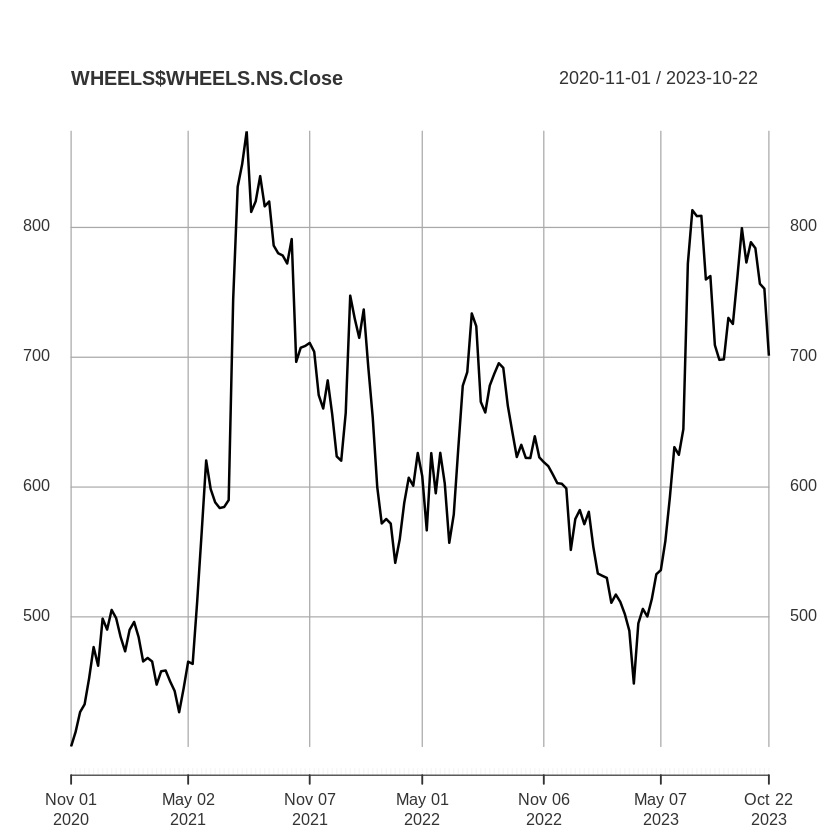

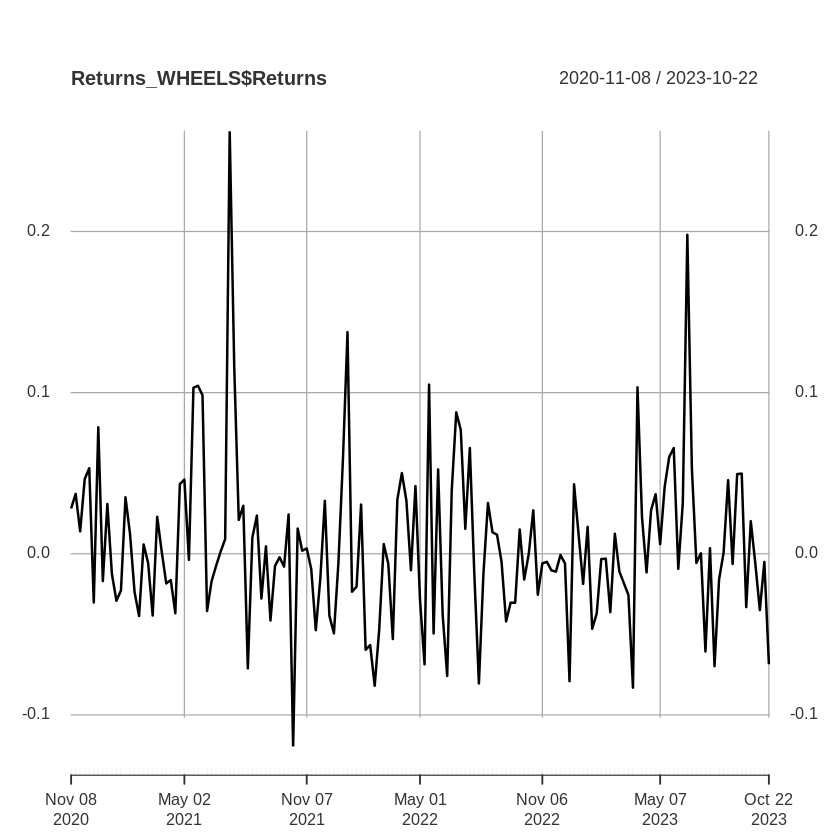

In [ ]:
library(tseries)
library(ggplot2)

WHEELS <- getSymbols.yahoo ("WHEELS.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "weekly")
head(WHEELS,5)

Returns_WHEELS <- as.xts(tail(data.frame(WHEELS$WHEELS.NS.Close), -1)/head(data.frame(WHEELS$WHEELS.NS.Close), -1) -1, frequency = 365)
colnames(Returns_WHEELS) <- "Returns"
head(Returns_WHEELS)

plot(WHEELS$WHEELS.NS.Close)
plot(Returns_WHEELS$Returns)

Warning message in adf.test(Returns_WHEELS$Returns, alternative = "stationary"):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Returns_WHEELS$Returns
Dickey-Fuller = -4.9766, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


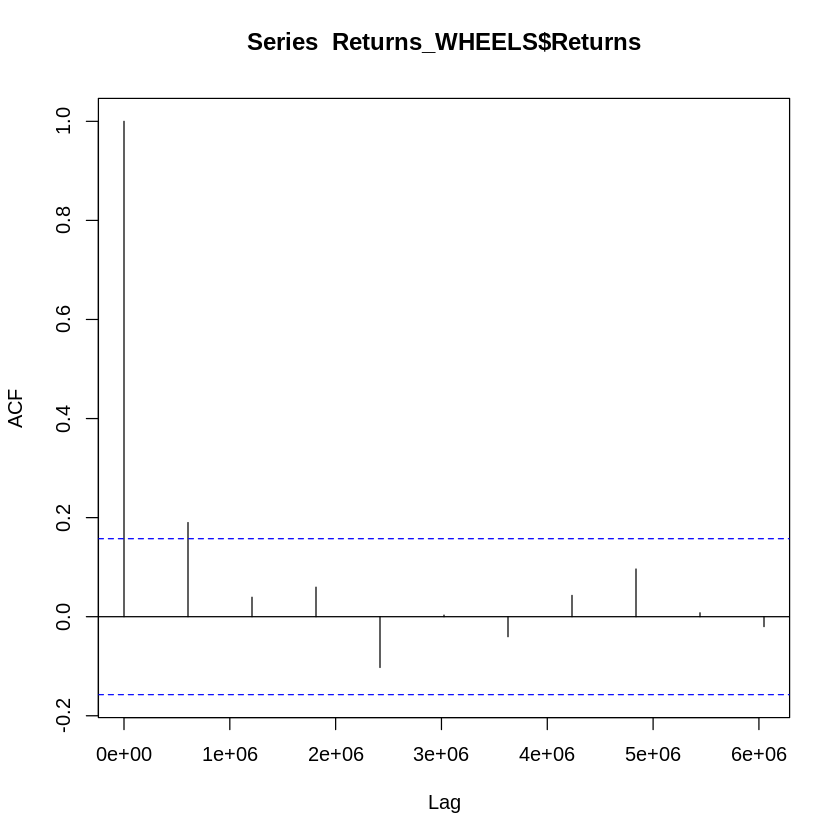

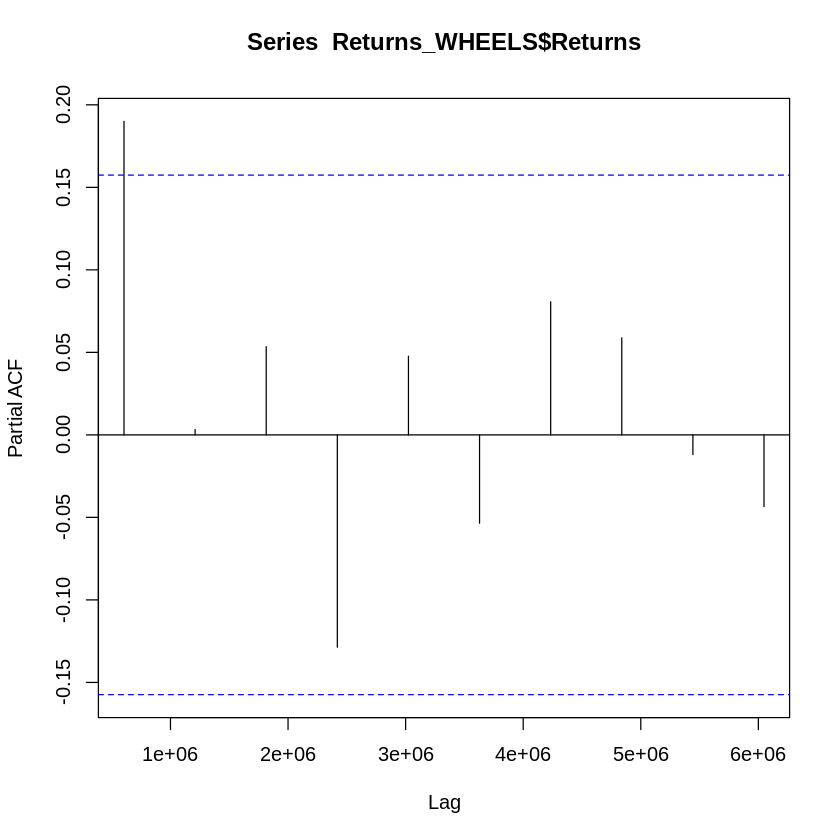

In [ ]:
adf.test(Returns_WHEELS$Returns, alternative = "stationary")

plot(acf(Returns_WHEELS$Returns, lag.max = 10))
plot(pacf(Returns_WHEELS$Returns, lag.max = 10))


Call:
arima(x = Returns_WHEELS$Returns, order = c(0, 0, 1))

Coefficients:
         ma1  intercept
      0.1930     0.0048
s.e.  0.0808     0.0048

sigma^2 estimated as 0.002463:  log likelihood = 245.53,  aic = -485.06

$pred
Time Series:
Start = c(93744001, 1) 
End = c(99187201, 1) 
Frequency = 1.65343915343915e-06 
 [1] -0.009272266  0.004781936  0.004781936  0.004781936  0.004781936
 [6]  0.004781936  0.004781936  0.004781936  0.004781936  0.004781936

$se
Time Series:
Start = c(93744001, 1) 
End = c(99187201, 1) 
Frequency = 1.65343915343915e-06 
 [1] 0.04963152 0.05054783 0.05054783 0.05054783 0.05054783 0.05054783
 [7] 0.05054783 0.05054783 0.05054783 0.05054783

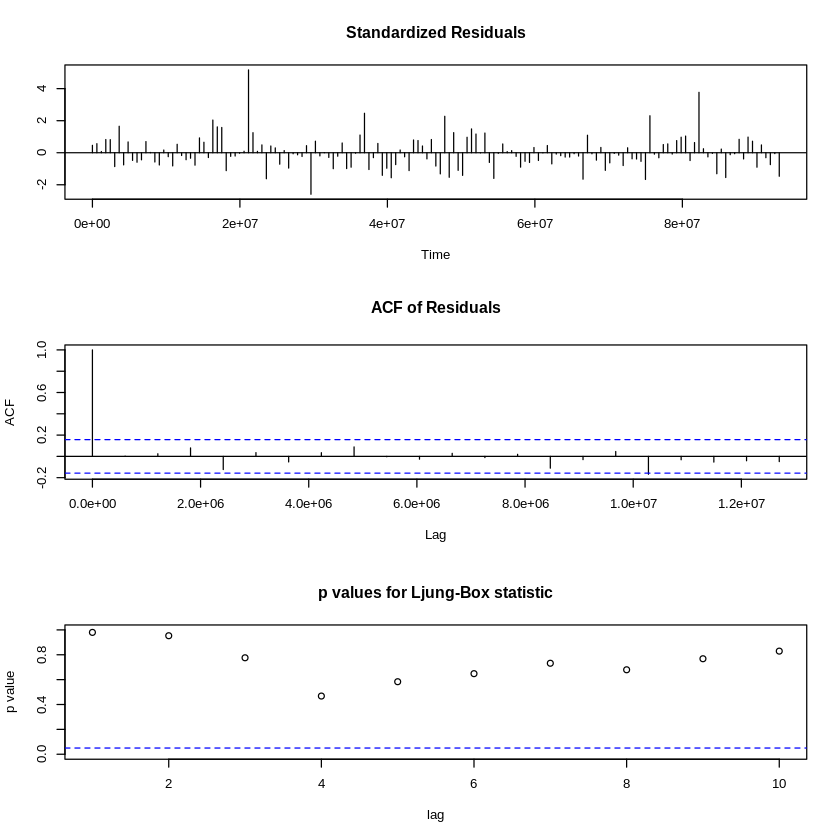

In [ ]:
arima_final <- arima(Returns_WHEELS$Returns, order = c(0,0,1))
arima_final

predicted <- predict(arima_final, n.ahead = 10)
predicted

tsdiag(arima_final)

### GARCH and EGARCH Model

In [ ]:
library(quantmod)

WHEELS <- getSymbols.yahoo("WHEELS.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "weekly")
head(WHEELS)

rWHEELS <- dailyReturn(WHEELS)
head(rWHEELS)

           WHEELS.NS.Open WHEELS.NS.High WHEELS.NS.Low WHEELS.NS.Close
2020-11-01         402.80         403.40        391.00          400.15
2020-11-08         402.20         416.50        390.70          411.40
2020-11-15         401.60         446.85        401.60          426.70
2020-11-22         427.70         445.00        421.55          432.65
2020-11-29         432.65         470.90        425.00          452.70
2020-12-06         455.10         480.50        442.40          476.75
           WHEELS.NS.Volume WHEELS.NS.Adjusted
2020-11-01            17796           384.8876
2020-11-08            36041           395.7085
2020-11-15            77902           410.4249
2020-11-22            54050           416.1479
2020-11-29           115891           435.4333
2020-12-06           129932           458.5659

           daily.returns
2020-11-01  -0.006578932
2020-11-08   0.028114458
2020-11-15   0.037190128
2020-11-22   0.013944180
2020-11-29   0.046342352
2020-12-06   0.053125662

In [ ]:
library(rugarch)

ug_spec = ugarchspec()
ug_spec

eg_spec = ugarchspec(variance.model = list(model="eGARCH"))
eg_spec

ugfit = ugarchfit(spec = ug_spec, data = rWHEELS)
ugfit

ugforecast = ugarchforecast(ugfit, n.ahead=10)
ugforecast


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: eGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.004587    0.004931   0.930263  0.35224
ar1     0.217701    0.566388   0.384367  0.70071
ma1    -0.027329    0.585031  -0.046713  0.96274
omega   0.000001    0.000007   0.200255  0.84128
alpha1  0.000000    0.001708   0.000000  1.00000
beta1   0.998999    0.001437 695.401924  0.00000

Robust Standard Errors:
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.004587    0.005320   0.862138  0.38861
ar1     0.217701    0.492919   0.441657  0.65874
ma1    -0.027329    0.548033  -0.049867  0.96023
omega   0.000001    0.000013   0.111095  0.91154
alpha1  0.000000    0.000544   0.000000  1.00000
beta1   0.998999    0.001290 


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 10
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2023-10-22]:
        Series   Sigma
T+1  -0.009391 0.04806
T+2   0.001544 0.04805
T+3   0.003924 0.04804
T+4   0.004443 0.04804
T+5   0.004555 0.04803
T+6   0.004580 0.04802
T+7   0.004585 0.04801
T+8   0.004587 0.04800
T+9   0.004587 0.04799
T+10  0.004587 0.04799



## Monthly Returns

### CAPM Model

In [ ]:
require (quantmod) #includes necessary packages for analysis

#Getting the data of Nifty 50 and SBI Equity

NSE <- getSymbols.yahoo ("^NSEI", from ="2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "monthly")
NSE

WHEELS <- getSymbols.yahoo ("WHEELS.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "monthly")
WHEELS

head (NSE, 5)
tail (NSE, 5)

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-30  13062.20  14024.85 12962.80   13981.75    12077600      13981.75
2020-12-31  13996.10  14753.55 13596.75   13634.60    13119900      13634.60
2021-01-31  13758.60  15431.75 13661.75   14529.15    14313900      14529.15
2021-02-28  14702.50  15336.30 14264.40   14690.70     9886800      14690.70
2021-03-31  14798.40  15044.35 14151.40   14631.10     9344700      14631.10
2021-04-30  14481.05  15606.35 14416.25   15582.80     9859900      15582.80
2021-05-31  15629.65  15915.65 15450.90   15721.50     8079100      15721.50
2021-06-30  15755.05  15962.25 15513.45   15763.05     5756800      15763.05
2021-07-31  15874.90  17153.50 15834.65   17132.20     6349900      17132.20
2021-08-31  17185.60  17947.65 17055.05   17618.15     6955600      17618.15
2021-09-30  17531.90  18604.45 17452.90   17671.65     7651200      17671.65
2021-10-31  17783.15  18210.15 16782.40   16983.20     5853100      16983.20

           WHEELS.NS.Open WHEELS.NS.High WHEELS.NS.Low WHEELS.NS.Close
2020-11-30         435.00         518.50        425.00          481.70
2020-12-31         484.15         527.50        465.40          473.45
2021-01-31         475.85         505.35        464.00          465.65
2021-02-28         470.00         518.45        427.00          452.50
2021-03-31         453.65         464.75        404.90          445.00
2021-04-30         445.00         586.00        439.85          552.40
2021-05-31         554.90         645.00        534.55          571.40
2021-06-30         574.30        1037.00        570.10          848.80
2021-07-31         865.00         919.40        761.15          828.10
2021-08-31         828.00         850.00        752.00          759.45
2021-09-30         760.00         823.40        665.00          707.35
2021-10-31         728.00         756.00        620.85          641.35
2021-11-30         647.65         700.05        603.70          620.30
2021-1

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-11-30   13062.2  14024.85 12962.80   13981.75    12077600      13981.75
2020-12-31   13996.1  14753.55 13596.75   13634.60    13119900      13634.60
2021-01-31   13758.6  15431.75 13661.75   14529.15    14313900      14529.15
2021-02-28   14702.5  15336.30 14264.40   14690.70     9886800      14690.70
2021-03-31   14798.4  15044.35 14151.40   14631.10     9344700      14631.10

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2023-05-31  18579.40  19201.70 18464.55   19189.05     5144400      19189.05
2023-06-30  19246.50  19991.85 19234.40   19753.80     5802500      19753.80
2023-07-31  19784.00  19795.60 19223.65   19253.80     6027500      19253.80
2023-08-31  19258.15  20222.45 19255.70   19638.30     5666500      19638.30
2023-09-30  19622.40  19849.75 18837.85   19079.60     4248400      19079.60

In [ ]:
close <- cbind(NSE$NSEI.Close, WHEELS$WHEELS.NS.Close)
head(close, 5)

Returns <- as.xts(tail(data.frame(close),-1)/head(data.frame(close),-1)-1)
head(Returns, 5)

           NSEI.Close WHEELS.NS.Close
2020-11-30   13981.75          481.70
2020-12-31   13634.60          473.45
2021-01-31   14529.15          465.65
2021-02-28   14690.70          452.50
2021-03-31   14631.10          445.00

             NSEI.Close WHEELS.NS.Close
2020-12-31 -0.024828823     -0.01712684
2021-01-31  0.065608878     -0.01647485
2021-02-28  0.011119012     -0.02824008
2021-03-31 -0.004057028     -0.01657459
2021-04-30  0.065046389      0.24134837

In [ ]:
regression <- lm(WHEELS.NS.Close ~ NSEI.Close, data.frame(Returns[]))
summary(regression)


Call:
lm(formula = WHEELS.NS.Close ~ NSEI.Close, data = data.frame(Returns[]))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18649 -0.09238 -0.05204  0.07607  0.47261 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.01022    0.02517   0.406    0.687
NSEI.Close   0.99958    0.66042   1.514    0.140

Residual standard error: 0.1418 on 32 degrees of freedom
Multiple R-squared:  0.06681,	Adjusted R-squared:  0.03764 
F-statistic: 2.291 on 1 and 32 DF,  p-value: 0.14


#### Beta for WHEELS=0.999 based on monthly returns

### ARIMA Model

           WHEELS.NS.Open WHEELS.NS.High WHEELS.NS.Low WHEELS.NS.Close
2020-11-30         435.00         518.50         425.0          481.70
2020-12-31         484.15         527.50         465.4          473.45
2021-01-31         475.85         505.35         464.0          465.65
2021-02-28         470.00         518.45         427.0          452.50
2021-03-31         453.65         464.75         404.9          445.00
           WHEELS.NS.Volume WHEELS.NS.Adjusted
2020-11-30           779125           463.3271
2020-12-31           561170           455.3918
2021-01-31           246008           447.8893
2021-02-28           858156           435.2408
2021-03-31           718764           428.0269

               Returns
2020-12-31 -0.01712684
2021-01-31 -0.01647485
2021-02-28 -0.02824008
2021-03-31 -0.01657459
2021-04-30  0.24134837
2021-05-31  0.03439536

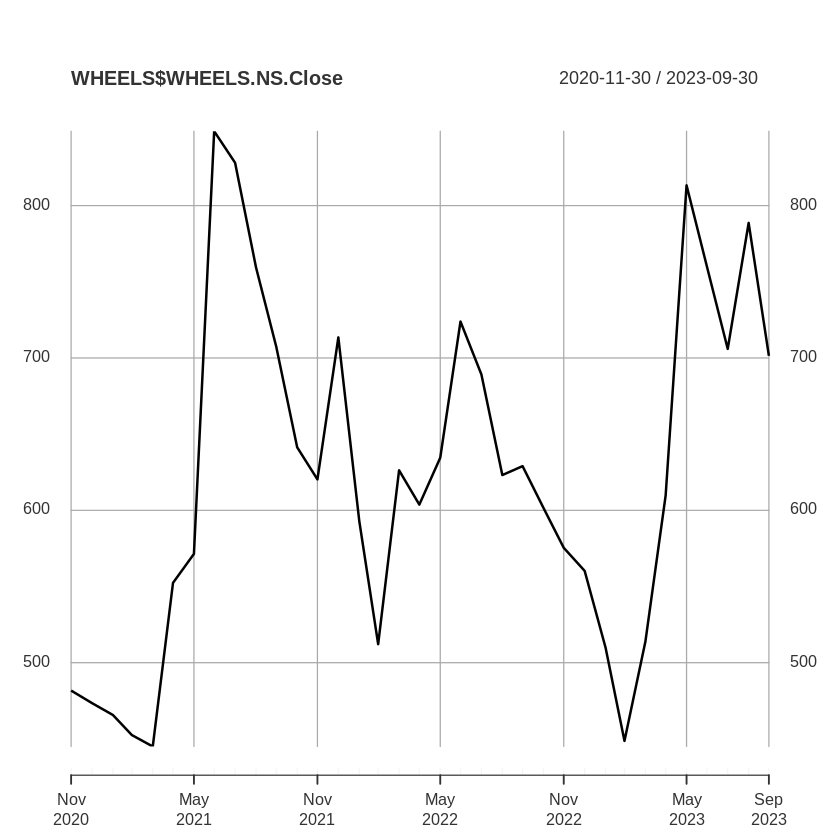

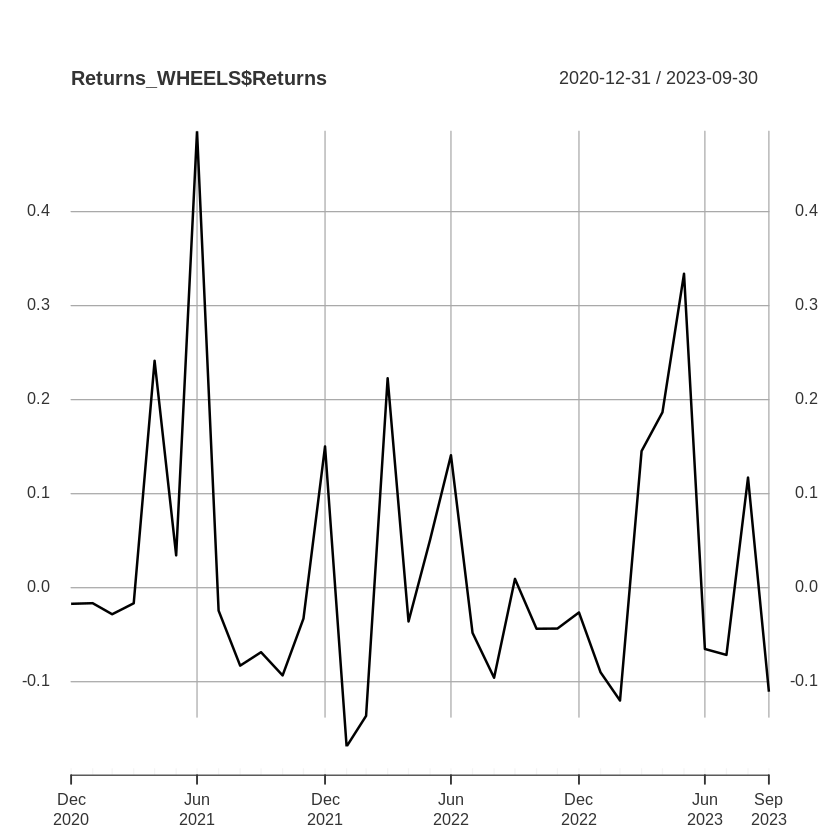

In [ ]:
library(tseries)
library(ggplot2)

WHEELS <- getSymbols.yahoo ("WHEELS.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "monthly")
head(WHEELS,5)

Returns_WHEELS <- as.xts(tail(data.frame(WHEELS$WHEELS.NS.Close), -1)/head(data.frame(WHEELS$WHEELS.NS.Close), -1) -1, frequency = 365)
colnames(Returns_WHEELS) <- "Returns"
head(Returns_WHEELS)

plot(WHEELS$WHEELS.NS.Close)
plot(Returns_WHEELS$Returns)


	Augmented Dickey-Fuller Test

data:  Returns_WHEELS$Returns
Dickey-Fuller = -3.4661, Lag order = 3, p-value = 0.06468
alternative hypothesis: stationary


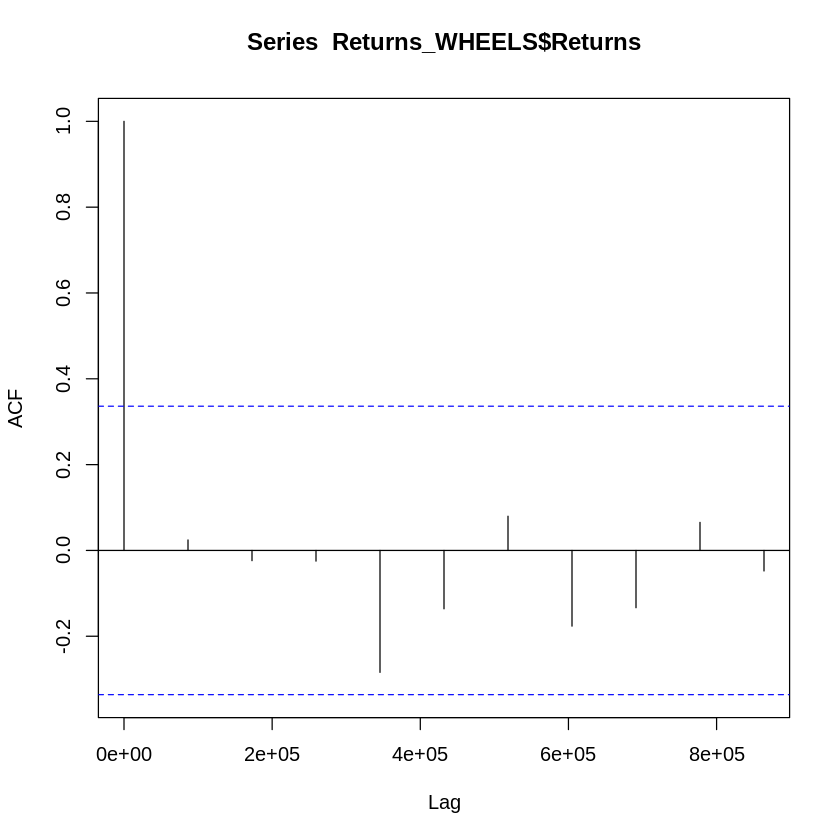

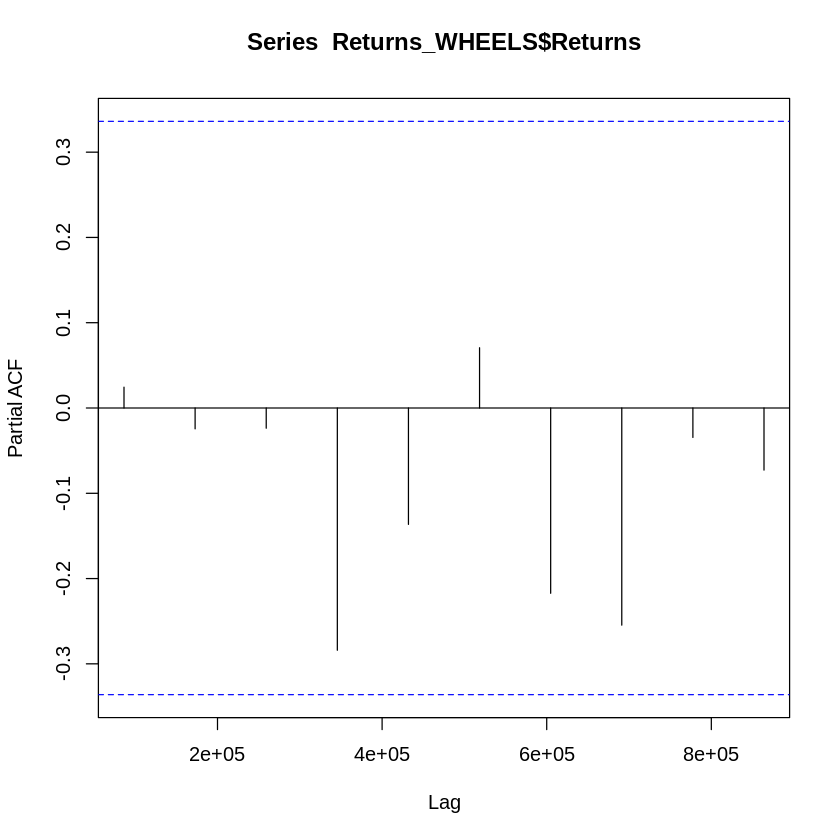

In [ ]:
adf.test(Returns_WHEELS$Returns, alternative = "stationary")

plot(acf(Returns_WHEELS$Returns, lag.max = 10))
plot(pacf(Returns_WHEELS$Returns, lag.max = 10))


Call:
arima(x = Returns_WHEELS$Returns, order = c(0, 0, 0))

Coefficients:
      intercept
         0.0201
s.e.     0.0244

sigma^2 estimated as 0.02028:  log likelihood = 18.03,  aic = -32.06

$pred
Time Series:
Start = 2937601 
End = 3715201 
Frequency = 1.15740740740741e-05 
 [1] 0.0200685 0.0200685 0.0200685 0.0200685 0.0200685 0.0200685 0.0200685
 [8] 0.0200685 0.0200685 0.0200685

$se
Time Series:
Start = 2937601 
End = 3715201 
Frequency = 1.15740740740741e-05 
 [1] 0.1423928 0.1423928 0.1423928 0.1423928 0.1423928 0.1423928 0.1423928
 [8] 0.1423928 0.1423928 0.1423928

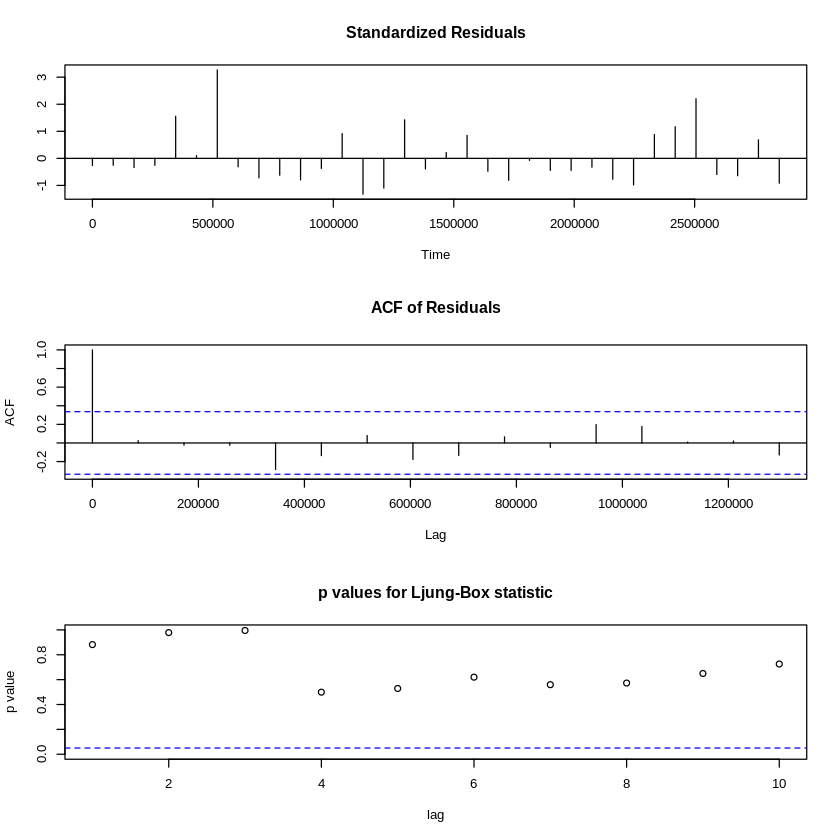

In [ ]:
arima_final <- arima(Returns_WHEELS$Returns, order = c(0,0,0))
arima_final

predicted <- predict(arima_final, n.ahead = 10)
predicted

tsdiag(arima_final)

### GARCH and EGARCH Model

In [ ]:
library(quantmod)

WHEELS <- getSymbols.yahoo("WHEELS.NS", from = "2020-11-02", to = "2023-10-26", verbose = FALSE, auto.assign = FALSE, periodicity = "monthly")
head(WHEELS)

rWHEELS <- dailyReturn(WHEELS)
head(rWHEELS)

           WHEELS.NS.Open WHEELS.NS.High WHEELS.NS.Low WHEELS.NS.Close
2020-11-30         435.00         518.50        425.00          481.70
2020-12-31         484.15         527.50        465.40          473.45
2021-01-31         475.85         505.35        464.00          465.65
2021-02-28         470.00         518.45        427.00          452.50
2021-03-31         453.65         464.75        404.90          445.00
2021-04-30         445.00         586.00        439.85          552.40
           WHEELS.NS.Volume WHEELS.NS.Adjusted
2020-11-30           779125           463.3271
2020-12-31           561170           455.3918
2021-01-31           246008           447.8893
2021-02-28           858156           435.2409
2021-03-31           718764           428.0269
2021-04-30          1380427           531.3305

           daily.returns
2020-11-30    0.10735635
2020-12-31   -0.01712684
2021-01-31   -0.01647485
2021-02-28   -0.02824008
2021-03-31   -0.01657459
2021-04-30    0.24134837

In [ ]:
library(rugarch)

ug_spec = ugarchspec()
ug_spec

eg_spec = ugarchspec(variance.model = list(model="eGARCH"))
eg_spec

ugfit = ugarchfit(spec = ug_spec, data = rWHEELS)
ugfit

ugforecast = ugarchforecast(ugfit, n.ahead=10)
ugforecast


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: eGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 


Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
“
ugarchfit-->waring: using less than 100 data
 points for estimation
”



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.021584    0.020171  1.070051  0.28460
ar1    -0.919683    0.162232 -5.668941  0.00000
ma1     0.973274    0.108806  8.945064  0.00000
omega   0.000000    0.000263  0.000115  0.99991
alpha1  0.000000    0.063697  0.000000  1.00000
beta1   0.996876    0.053222 18.730475  0.00000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.021584    0.034677  0.622416  0.53367
ar1    -0.919683    0.157817 -5.827514  0.00000
ma1     0.973274    0.093851 10.370394  0.00000
omega   0.000000    0.000402  0.000075  0.99994
alpha1  0.000000    0.076879  0.000000  1.00000
beta1   0.996876    0.064847 15.372719  0.


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 10
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2023-09-30]:
      Series  Sigma
T+1  0.01322 0.1325
T+2  0.02927 0.1322
T+3  0.01451 0.1320
T+4  0.02809 0.1318
T+5  0.01560 0.1316
T+6  0.02709 0.1314
T+7  0.01652 0.1312
T+8  0.02624 0.1310
T+9  0.01730 0.1308
T+10 0.02552 0.1306

